Team 2
D22002
D22006
D22039

In [1]:
import pandas as pd

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
import nltk

In [5]:
import seaborn as sns

## Reading the Data
### Read the data in a Data Frame with two columns named SMS and Labels.

In [6]:
# Courtesy https://stackoverflow.com/questions/64603727/python-create-pandas-dataframe-from-txt-file

In [7]:
df = pd.read_csv("C:\\Users\\Andrew\\Downloads\\smsspamcollection\\SMSSpamCollection.tsv",sep='\t',names=['Labels', 'SMS'])

In [8]:
df

Labels                                                SMS
0       ham  Go until jurong point, crazy.. Available only ...
1       ham                      Ok lar... Joking wif u oni...
2      spam  Free entry in 2 a wkly comp to win FA Cup fina...
3       ham  U dun say so early hor... U c already then say...
4       ham  Nah I don't think he goes to usf, he lives aro...
...     ...                                                ...
5567   spam  This is the 2nd time we have tried 2 contact u...
5568    ham               Will ü b going to esplanade fr home?
5569    ham  Pity, * was in mood for that. So...any other s...
5570    ham  The guy did some bitching but I acted like i'd...
5571    ham                         Rofl. Its true to its name

[5572 rows x 2 columns]

In [9]:
# As spam messgaes usually start with first word capitalized, changing the corpus to lower case may hamper performance


In [10]:
df.Labels.value_counts()

ham     4825
spam     747
Name: Labels, dtype: int64

## Text Pre-processing
### Use appropriate text pre-processing techniques to clean the texts.
#### Be creative with your approaches here; each step needs to be justified.

In [11]:
corpus=pd.read_csv("C:\\Users\\Andrew\\Downloads\\smsspamcollection\\SMSSpamCollection.tsv",sep='\t',names=['Labels', 'SMS'])
corpus

Labels                                                SMS
0       ham  Go until jurong point, crazy.. Available only ...
1       ham                      Ok lar... Joking wif u oni...
2      spam  Free entry in 2 a wkly comp to win FA Cup fina...
3       ham  U dun say so early hor... U c already then say...
4       ham  Nah I don't think he goes to usf, he lives aro...
...     ...                                                ...
5567   spam  This is the 2nd time we have tried 2 contact u...
5568    ham               Will ü b going to esplanade fr home?
5569    ham  Pity, * was in mood for that. So...any other s...
5570    ham  The guy did some bitching but I acted like i'd...
5571    ham                         Rofl. Its true to its name

[5572 rows x 2 columns]

#### 1. Converting the text into lower cases

In [12]:
#normalizing all the tweets
for i in range(len(corpus.SMS)):
    corpus.SMS[i] = corpus.SMS[i].lower()

In [13]:
corpus.head()

Labels                                                SMS
0    ham  go until jurong point, crazy.. available only ...
1    ham                      ok lar... joking wif u oni...
2   spam  free entry in 2 a wkly comp to win fa cup fina...
3    ham  u dun say so early hor... u c already then say...
4    ham  nah i don't think he goes to usf, he lives aro...

#### 2. Remove stopwords

In [14]:
#NLTK stopword list
from nltk.corpus import stopwords
stop_words = stopwords.words("english")
len(stop_words)

179

In [15]:
#Removing stopwords from all the SMS
for i in range(len(corpus.SMS)):
    corpus.SMS[i] = " ".join([word for word in corpus.SMS[i].split() if word not in stop_words])

In [16]:
corpus.head()

Labels                                                SMS
0    ham  go jurong point, crazy.. available bugis n gre...
1    ham                      ok lar... joking wif u oni...
2   spam  free entry 2 wkly comp win fa cup final tkts 2...
3    ham          u dun say early hor... u c already say...
4    ham            nah think goes usf, lives around though

#### 3. Remove Punctuations/special symbols and 

In [17]:
import string
p = string.punctuation
remv_punc = str.maketrans("", "", p)

In [18]:
#Removing punctuation from all the SMS
for i in range(len(corpus.SMS)):
    corpus.SMS[i] = corpus.SMS[i].translate(remv_punc)

In [19]:
corpus.head()

Labels                                                SMS
0    ham  go jurong point crazy available bugis n great ...
1    ham                            ok lar joking wif u oni
2   spam  free entry 2 wkly comp win fa cup final tkts 2...
3    ham                u dun say early hor u c already say
4    ham             nah think goes usf lives around though

#### 4. Remove white spaces

In [20]:
for i in range(len(corpus.SMS)):
    corpus.SMS[i] = corpus.SMS[i].replace("  ", " ").strip()

In [21]:
corpus.head()

Labels                                                SMS
0    ham  go jurong point crazy available bugis n great ...
1    ham                            ok lar joking wif u oni
2   spam  free entry 2 wkly comp win fa cup final tkts 2...
3    ham                u dun say early hor u c already say
4    ham             nah think goes usf lives around though

In [22]:
# corpus for lemmatization
corpus_lemm=corpus.copy()

#### 5. Stemming

In [23]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [24]:
#Stemming all SMS
for i in range(len(corpus.SMS)):
    corpus.SMS[i] = " ".join([ps.stem(w) for w in corpus.SMS[i].split()])

In [25]:
corpus.head()

Labels                                                SMS
0    ham  go jurong point crazi avail bugi n great world...
1    ham                              ok lar joke wif u oni
2   spam  free entri 2 wkli comp win fa cup final tkt 21...
3    ham                u dun say earli hor u c alreadi say
4    ham               nah think goe usf live around though

In [26]:
from nltk.stem import WordNetLemmatizer

In [27]:
 
lemmatizer = WordNetLemmatizer()

for i in range(len(corpus_lemm.SMS)):
    corpus_lemm.SMS[i] = " ".join([lemmatizer.lemmatize(w) for w in corpus_lemm.SMS[i].split()])

## Data Exploration
### Explore the word frequencies of the SMS in each category. Use word clouds for this. Explain your observations.

In [28]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [29]:
#Spam and Ham SMS on stemmed data
corpus
spam=""
for i in range(len(corpus)):
    if(corpus.Labels[i]=='spam'):
        spam=spam+corpus.SMS[i]

ham=""
for i in range(len(corpus)):
    if(corpus.Labels[i]=='ham'):
        ham=ham+corpus.SMS[i]
  


In [30]:
#Spam and Ham SMS on Lemmatized data
corpus_lemm
spam_lemm=""
for i in range(len(corpus_lemm)):
    if(corpus_lemm.Labels[i]=='spam'):
        spam_lemm=spam_lemm+corpus_lemm.SMS[i]

ham_lemm=""
for i in range(len(corpus_lemm)):
    if(corpus_lemm.Labels[i]=='ham'):
        ham_lemm=ham_lemm+corpus_lemm.SMS[i]
  

In [31]:
#Spam and Ham SMS on original data
df
spam_orig=""
for i in range(len(df)):
    if(df.Labels[i]=='spam'):
        spam_orig=spam_orig+df.SMS[i]

ham_orig=""
for i in range(len(df)):
    if(df.Labels[i]=='ham'):
        ham_orig=ham_orig+df.SMS[i]
  

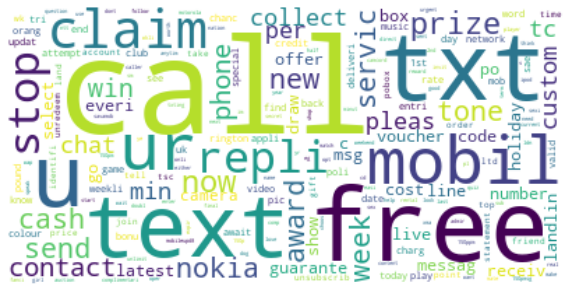

In [32]:
#Wordcloud for SPAM SMS on stemmed data
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(spam)
plt.figure(figsize=(10,12))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

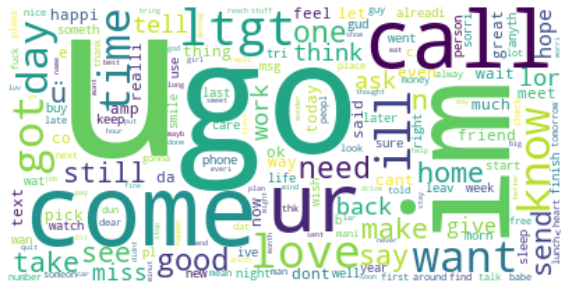

In [33]:
#Wordcloud for HAM SMS on Stemed data
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(ham)
plt.figure(figsize=(10,12))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

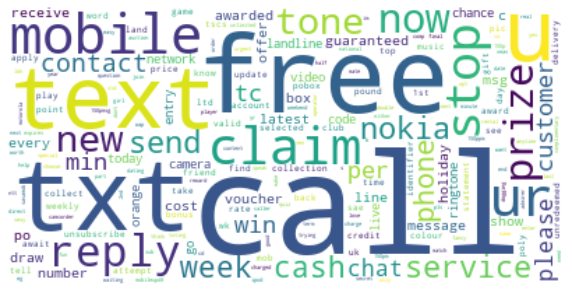

In [34]:
#Wordcloud for SPAM SMS on lemmatized data
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(spam_lemm)
plt.figure(figsize=(10,12))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

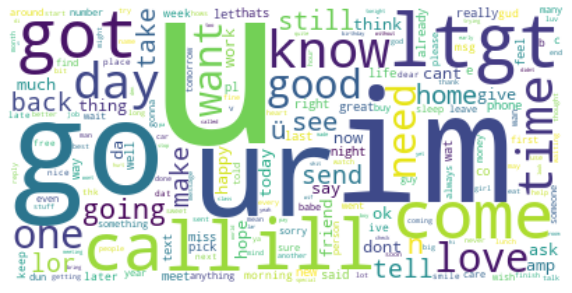

In [35]:
#Wordcloud for HAM SMS on lemmatized data
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(ham_lemm)
plt.figure(figsize=(10,12))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

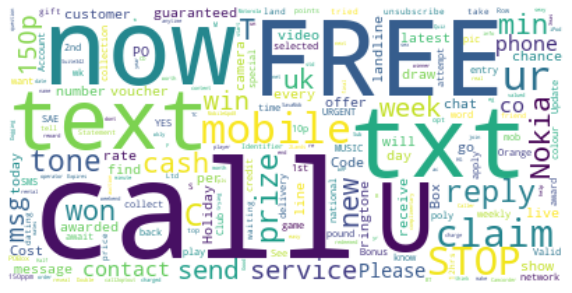

In [36]:
#Wordcloud for SPAM SMS on original data
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(spam_orig)
plt.figure(figsize=(10,12))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

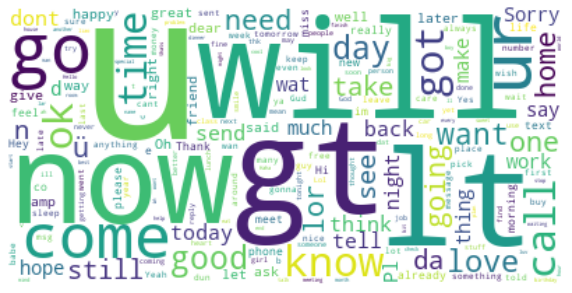

In [37]:
#Wordcloud for HAM SMS on original data
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(ham_orig)
plt.figure(figsize=(10,12))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [38]:
# The above word cloud can be used as inspiration for creating suspiscious words feature

## Vectorization

### Document-Term Matrix

#### 1. Get the Bag-Of-Words (BOW) Dataframe using stemmed corpus

In [39]:
from sklearn.feature_extraction.text import CountVectorizer

In [40]:
#using count vectoroizer to create a document-term matrix
#The word list
#Converting the document-term matrix to a dataframe
vectorizer=CountVectorizer()
X=vectorizer.fit_transform(corpus.SMS)
vectorizer.get_feature_names_out()
DTM=pd.DataFrame(X.toarray(),columns=[vectorizer.get_feature_names_out()])
DTM

008704050406 0089mi 0121 01223585236 01223585334 0125698789 02 020603  \
0               0      0    0           0           0          0  0      0   
1               0      0    0           0           0          0  0      0   
2               0      0    0           0           0          0  0      0   
3               0      0    0           0           0          0  0      0   
4               0      0    0           0           0          0  0      0   
...           ...    ...  ...         ...         ...        ... ..    ...   
5567            0      0    0           0           0          0  0      0   
5568            0      0    0           0           0          0  0      0   
5569            0      0    0           0           0          0  0      0   
5570            0      0    0           0           0          0  0      0   
5571            0      0    0           0           0          0  0      0   

     0207 02070836089  ... zero zhong zindgi zoe zogtoriu zoom zouk zyada üll  \
0       0           0  ...    0     0      0   0        0    0    0     0   0   
1       0           0  ...    0     0      0   0        0    0    0     0   0   
2       0           0  ...    0     0      0   0        0    0    0     0   0   
3       0           0  ...    0     0      0   0        0    0    0     0   0   
4       0           0  ...    0     0      0   0        0    0    0     0   0   
...   ...         ...  ...  ...   ...    ...  ..      ...  ...  ...   ...  ..   
5567    0           0  ...    0     0      0   0        0    0    0     0   0   
5568    0           0  ...    0     0      0   0        0    0    0     0   0   
5569    0           0  ...    0     0      0   0        0    0    0     0   0   
5570    0           0  ...    0     0      0   0        0    0    0     0   0   
5571    0           0  ...    0     0      0   0        0    0    0     0   0   

     〨ud  
0      0  
1      0  
2      0  
3      0  
4      0  
...   ..  
5567   0  
5568   0  
5569   0  
5570   0  
5571   0  

[5572 rows x 8147 columns]

#### 2. Get the Bag-Of-Words (BOW) Dataframe using lemmatized corpus

In [41]:
vectorizer=CountVectorizer()
X=vectorizer.fit_transform(corpus_lemm.SMS)
vectorizer.get_feature_names_out()
DTM_lemm=pd.DataFrame(X.toarray(),columns=[vectorizer.get_feature_names_out()])
DTM_lemm

008704050406 0089my 0121 01223585236 01223585334 0125698789 02 020603  \
0               0      0    0           0           0          0  0      0   
1               0      0    0           0           0          0  0      0   
2               0      0    0           0           0          0  0      0   
3               0      0    0           0           0          0  0      0   
4               0      0    0           0           0          0  0      0   
...           ...    ...  ...         ...         ...        ... ..    ...   
5567            0      0    0           0           0          0  0      0   
5568            0      0    0           0           0          0  0      0   
5569            0      0    0           0           0          0  0      0   
5570            0      0    0           0           0          0  0      0   
5571            0      0    0           0           0          0  0      0   

     0207 02070836089  ... zero zhong zindgi zoe zogtorius zoom zouk zyada  \
0       0           0  ...    0     0      0   0         0    0    0     0   
1       0           0  ...    0     0      0   0         0    0    0     0   
2       0           0  ...    0     0      0   0         0    0    0     0   
3       0           0  ...    0     0      0   0         0    0    0     0   
4       0           0  ...    0     0      0   0         0    0    0     0   
...   ...         ...  ...  ...   ...    ...  ..       ...  ...  ...   ...   
5567    0           0  ...    0     0      0   0         0    0    0     0   
5568    0           0  ...    0     0      0   0         0    0    0     0   
5569    0           0  ...    0     0      0   0         0    0    0     0   
5570    0           0  ...    0     0      0   0         0    0    0     0   
5571    0           0  ...    0     0      0   0         0    0    0     0   

     üll 〨ud  
0      0   0  
1      0   0  
2      0   0  
3      0   0  
4      0   0  
...   ..  ..  
5567   0   0  
5568   0   0  
5569   0   0  
5570   0   0  
5571   0   0  

[5572 rows x 8970 columns]

#### 3. Get the Bag-Of-Words (BOW) Dataframe using original corpus

In [42]:
data = pd.read_csv("C:\\Users\\Andrew\\Downloads\\smsspamcollection\\SMSSpamCollection.tsv",sep='\t',names=['Labels', 'SMS'])

In [43]:
vectorizer=CountVectorizer()
X=vectorizer.fit_transform(data.SMS)
vectorizer.get_feature_names_out()
DTM_orig=pd.DataFrame(X.toarray(),columns=[vectorizer.get_feature_names_out()])
DTM_orig

00 000 000pes 008704050406 0089 0121 01223585236 01223585334 0125698789  \
0     0   0      0            0    0    0           0           0          0   
1     0   0      0            0    0    0           0           0          0   
2     0   0      0            0    0    0           0           0          0   
3     0   0      0            0    0    0           0           0          0   
4     0   0      0            0    0    0           0           0          0   
...  ..  ..    ...          ...  ...  ...         ...         ...        ...   
5567  0   0      0            0    0    0           0           0          0   
5568  0   0      0            0    0    0           0           0          0   
5569  0   0      0            0    0    0           0           0          0   
5570  0   0      0            0    0    0           0           0          0   
5571  0   0      0            0    0    0           0           0          0   

     02  ... zhong zindgi zoe zogtorius zoom zouk zyada èn ú1 〨ud  
0     0  ...     0      0   0         0    0    0     0  0  0   0  
1     0  ...     0      0   0         0    0    0     0  0  0   0  
2     0  ...     0      0   0         0    0    0     0  0  0   0  
3     0  ...     0      0   0         0    0    0     0  0  0   0  
4     0  ...     0      0   0         0    0    0     0  0  0   0  
...  ..  ...   ...    ...  ..       ...  ...  ...   ... .. ..  ..  
5567  0  ...     0      0   0         0    0    0     0  0  0   0  
5568  0  ...     0      0   0         0    0    0     0  0  0   0  
5569  0  ...     0      0   0         0    0    0     0  0  0   0  
5570  0  ...     0      0   0         0    0    0     0  0  0   0  
5571  0  ...     0      0   0         0    0    0     0  0  0   0  

[5572 rows x 8713 columns]

In [44]:
DTM.to_csv("DTM_stemmed.csv",index=False)
DTM_lemm.to_csv("DTM_lemm.csv",index=False)
DTM_orig.to_csv("DTM_orig.csv",index=False)

## TFIDF Vectors 

#### TFIDF on stemmed data

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [33]:

tfidf_v=TfidfVectorizer()
tfidf_vectors=tfidf_v.fit_transform(corpus.SMS)


In [34]:
#Converting the above compressed objects into numpy array
names=tfidf_v.get_feature_names()
tfidf_vectors=tfidf_vectors.toarray()
tfidf_vectors=pd.DataFrame(tfidf_vectors,columns=names)

In [35]:
tfidf_vectors

008704050406  0089mi  0121  01223585236  01223585334  0125698789   02  \
0              0.0     0.0   0.0          0.0          0.0         0.0  0.0   
1              0.0     0.0   0.0          0.0          0.0         0.0  0.0   
2              0.0     0.0   0.0          0.0          0.0         0.0  0.0   
3              0.0     0.0   0.0          0.0          0.0         0.0  0.0   
4              0.0     0.0   0.0          0.0          0.0         0.0  0.0   
...            ...     ...   ...          ...          ...         ...  ...   
5567           0.0     0.0   0.0          0.0          0.0         0.0  0.0   
5568           0.0     0.0   0.0          0.0          0.0         0.0  0.0   
5569           0.0     0.0   0.0          0.0          0.0         0.0  0.0   
5570           0.0     0.0   0.0          0.0          0.0         0.0  0.0   
5571           0.0     0.0   0.0          0.0          0.0         0.0  0.0   

      020603  0207  02070836089  ...  zero  zhong  zindgi  zoe  zogtoriu  \
0        0.0   0.0          0.0  ...   0.0    0.0     0.0  0.0       0.0   
1        0.0   0.0          0.0  ...   0.0    0.0     0.0  0.0       0.0   
2        0.0   0.0          0.0  ...   0.0    0.0     0.0  0.0       0.0   
3        0.0   0.0          0.0  ...   0.0    0.0     0.0  0.0       0.0   
4        0.0   0.0          0.0  ...   0.0    0.0     0.0  0.0       0.0   
...      ...   ...          ...  ...   ...    ...     ...  ...       ...   
5567     0.0   0.0          0.0  ...   0.0    0.0     0.0  0.0       0.0   
5568     0.0   0.0          0.0  ...   0.0    0.0     0.0  0.0       0.0   
5569     0.0   0.0          0.0  ...   0.0    0.0     0.0  0.0       0.0   
5570     0.0   0.0          0.0  ...   0.0    0.0     0.0  0.0       0.0   
5571     0.0   0.0          0.0  ...   0.0    0.0     0.0  0.0       0.0   

      zoom  zouk  zyada  üll  〨ud  
0      0.0   0.0    0.0  0.0  0.0  
1      0.0   0.0    0.0  0.0  0.0  
2      0.0   0.0    0.0  0.0  0.0  
3      0.0   0.0    0.0  0.0  0.0  
4      0.0   0.0    0.0  0.0  0.0  
...    ...   ...    ...  ...  ...  
5567   0.0   0.0    0.0  0.0  0.0  
5568   0.0   0.0    0.0  0.0  0.0  
5569   0.0   0.0    0.0  0.0  0.0  
5570   0.0   0.0    0.0  0.0  0.0  
5571   0.0   0.0    0.0  0.0  0.0  

[5572 rows x 8147 columns]

### TFIDF on lemmatized data

In [36]:

tfidf_v=TfidfVectorizer()
tfidf_vectors_lemm=tfidf_v.fit_transform(corpus_lemm.SMS)


In [37]:
#Converting the above compressed objects into numpy array
names=tfidf_v.get_feature_names()
tfidf_vectors_lemm=tfidf_vectors_lemm.toarray()
tfidf_vectors_lemm=pd.DataFrame(tfidf_vectors_lemm,columns=names)

In [38]:
tfidf_vectors_lemm

008704050406  0089my  0121  01223585236  01223585334  0125698789   02  \
0              0.0     0.0   0.0          0.0          0.0         0.0  0.0   
1              0.0     0.0   0.0          0.0          0.0         0.0  0.0   
2              0.0     0.0   0.0          0.0          0.0         0.0  0.0   
3              0.0     0.0   0.0          0.0          0.0         0.0  0.0   
4              0.0     0.0   0.0          0.0          0.0         0.0  0.0   
...            ...     ...   ...          ...          ...         ...  ...   
5567           0.0     0.0   0.0          0.0          0.0         0.0  0.0   
5568           0.0     0.0   0.0          0.0          0.0         0.0  0.0   
5569           0.0     0.0   0.0          0.0          0.0         0.0  0.0   
5570           0.0     0.0   0.0          0.0          0.0         0.0  0.0   
5571           0.0     0.0   0.0          0.0          0.0         0.0  0.0   

      020603  0207  02070836089  ...  zero  zhong  zindgi  zoe  zogtorius  \
0        0.0   0.0          0.0  ...   0.0    0.0     0.0  0.0        0.0   
1        0.0   0.0          0.0  ...   0.0    0.0     0.0  0.0        0.0   
2        0.0   0.0          0.0  ...   0.0    0.0     0.0  0.0        0.0   
3        0.0   0.0          0.0  ...   0.0    0.0     0.0  0.0        0.0   
4        0.0   0.0          0.0  ...   0.0    0.0     0.0  0.0        0.0   
...      ...   ...          ...  ...   ...    ...     ...  ...        ...   
5567     0.0   0.0          0.0  ...   0.0    0.0     0.0  0.0        0.0   
5568     0.0   0.0          0.0  ...   0.0    0.0     0.0  0.0        0.0   
5569     0.0   0.0          0.0  ...   0.0    0.0     0.0  0.0        0.0   
5570     0.0   0.0          0.0  ...   0.0    0.0     0.0  0.0        0.0   
5571     0.0   0.0          0.0  ...   0.0    0.0     0.0  0.0        0.0   

      zoom  zouk  zyada  üll  〨ud  
0      0.0   0.0    0.0  0.0  0.0  
1      0.0   0.0    0.0  0.0  0.0  
2      0.0   0.0    0.0  0.0  0.0  
3      0.0   0.0    0.0  0.0  0.0  
4      0.0   0.0    0.0  0.0  0.0  
...    ...   ...    ...  ...  ...  
5567   0.0   0.0    0.0  0.0  0.0  
5568   0.0   0.0    0.0  0.0  0.0  
5569   0.0   0.0    0.0  0.0  0.0  
5570   0.0   0.0    0.0  0.0  0.0  
5571   0.0   0.0    0.0  0.0  0.0  

[5572 rows x 8970 columns]

### TFIDF on Original data

In [39]:

tfidf_v=TfidfVectorizer()
tfidf_vectors_orig=tfidf_v.fit_transform(df.SMS)


In [40]:
#Converting the above compressed objects into numpy array
names=tfidf_v.get_feature_names()
tfidf_vectors_orig=tfidf_vectors_orig.toarray()
tfidf_vectors_orig=pd.DataFrame(tfidf_vectors_orig,columns=names)

In [80]:
tfidf_vectors_orig

00  000  000pes  008704050406  0089  0121  01223585236  01223585334  \
0     0.0  0.0     0.0           0.0   0.0   0.0          0.0          0.0   
1     0.0  0.0     0.0           0.0   0.0   0.0          0.0          0.0   
2     0.0  0.0     0.0           0.0   0.0   0.0          0.0          0.0   
3     0.0  0.0     0.0           0.0   0.0   0.0          0.0          0.0   
4     0.0  0.0     0.0           0.0   0.0   0.0          0.0          0.0   
...   ...  ...     ...           ...   ...   ...          ...          ...   
5567  0.0  0.0     0.0           0.0   0.0   0.0          0.0          0.0   
5568  0.0  0.0     0.0           0.0   0.0   0.0          0.0          0.0   
5569  0.0  0.0     0.0           0.0   0.0   0.0          0.0          0.0   
5570  0.0  0.0     0.0           0.0   0.0   0.0          0.0          0.0   
5571  0.0  0.0     0.0           0.0   0.0   0.0          0.0          0.0   

      0125698789   02  ...  zhong  zindgi  zoe  zogtorius  zoom  zouk  zyada  \
0            0.0  0.0  ...    0.0     0.0  0.0        0.0   0.0   0.0    0.0   
1            0.0  0.0  ...    0.0     0.0  0.0        0.0   0.0   0.0    0.0   
2            0.0  0.0  ...    0.0     0.0  0.0        0.0   0.0   0.0    0.0   
3            0.0  0.0  ...    0.0     0.0  0.0        0.0   0.0   0.0    0.0   
4            0.0  0.0  ...    0.0     0.0  0.0        0.0   0.0   0.0    0.0   
...          ...  ...  ...    ...     ...  ...        ...   ...   ...    ...   
5567         0.0  0.0  ...    0.0     0.0  0.0        0.0   0.0   0.0    0.0   
5568         0.0  0.0  ...    0.0     0.0  0.0        0.0   0.0   0.0    0.0   
5569         0.0  0.0  ...    0.0     0.0  0.0        0.0   0.0   0.0    0.0   
5570         0.0  0.0  ...    0.0     0.0  0.0        0.0   0.0   0.0    0.0   
5571         0.0  0.0  ...    0.0     0.0  0.0        0.0   0.0   0.0    0.0   

       èn   ú1  〨ud  
0     0.0  0.0  0.0  
1     0.0  0.0  0.0  
2     0.0  0.0  0.0  
3     0.0  0.0  0.0  
4     0.0  0.0  0.0  
...   ...  ...  ...  
5567  0.0  0.0  0.0  
5568  0.0  0.0  0.0  
5569  0.0  0.0  0.0  
5570  0.0  0.0  0.0  
5571  0.0  0.0  0.0  

[5572 rows x 8713 columns]

## Doc2Vec model

In [154]:
import nltk
from gensim.models import KeyedVectors

In [155]:
embeddings = KeyedVectors.load_word2vec_format('./GoogleNews-vectors-negative300.bin', binary = True)

### On stemmed data

In [156]:
review_embeddings={}
success=0
fail=0
for i in range(len(corpus.SMS)):
    review_emb=[0]*300
    for word in corpus.SMS[i].split():
        try:
            review_emb+=embeddings[word]
            success+=1
        except:
            fail+=1
            pass
    review_embeddings[i]=review_emb

In [157]:
# 22% of the words did not have emeddings

In [158]:
fail/success

0.22898807093935683

In [159]:
embedding_df=pd.DataFrame(review_embeddings).transpose()
embedding_df

0         1         2         3         4         5         6    \
0    -0.377563  0.955933  0.465576  2.866211 -0.044769  0.549438  0.950256   
1    -0.514664  0.346069  0.268005  0.666748 -0.655273  0.381836 -0.224609   
2    -0.208252  0.305054 -0.397583  1.139404  0.037354  0.228249 -0.069580   
3    -0.773438  0.148438  0.967163  0.687988 -1.075195 -0.001228 -0.109009   
4     0.011353  0.053619  0.423462  1.212891 -0.265747  0.121094  0.175415   
...        ...       ...       ...       ...       ...       ...       ...   
5567 -0.784912 -0.181335  0.357285  0.773743  0.110474  0.491653  0.026947   
5568 -0.247803  0.491211  0.443054  0.571259 -0.384766  0.247772 -0.317749   
5569  0.128784  0.145020 -0.060303  0.023926 -0.470215 -0.065918  0.102966   
5570  1.500244  0.155151  0.328960  1.441162 -0.811233  0.406189  0.289856   
5571  0.335938  0.203827  0.261719  0.227295 -0.516602  0.152832  0.186035   

           7         8         9    ...       290       291       292  \
0    -0.976349 -0.169617  1.026567  ... -0.142212  0.602966 -1.830811   
1    -0.383484  0.206787  0.648438  ...  0.585907  0.692627 -0.889587   
2    -1.159637  1.012451  2.087524  ...  0.820923  0.441162 -0.497986   
3    -0.783936 -0.087891  0.937500  ...  0.556396  0.789551 -0.409668   
4    -0.275795  0.509888  0.749207  ...  0.282410  0.661133 -0.735840   
...        ...       ...       ...  ...       ...       ...       ...   
5567 -1.004639  0.364258  0.966919  ...  0.271790  0.545898 -1.409088   
5568 -0.816126  0.046753 -0.116682  ... -0.343506  0.770264 -0.567764   
5569 -0.203125  0.347656  0.112305  ... -0.305237  0.070984  0.382080   
5570 -1.449860  0.287689  1.258911  ...  0.165516  1.069305 -1.667847   
5571 -0.004272  0.345215  0.237061  ... -0.082520  0.400879 -0.501587   

           293       294       295       296       297       298       299  
0     1.037018 -0.185989 -0.782593 -0.315918 -1.098389 -0.675537  0.533600  
1    -0.062134 -1.104492 -0.859497 -1.025391 -0.661713 -0.591064  0.751465  
2    -0.411133 -0.160339 -0.839844 -0.379242 -1.873047 -1.436638  0.621632  
3    -0.069092 -0.577637 -1.332520 -0.757149 -0.608398 -0.126465  1.132812  
4     0.540894 -0.695160 -0.288330 -0.136719 -0.638550  0.447323 -0.100464  
...        ...       ...       ...       ...       ...       ...       ...  
5567 -0.377258 -0.389282 -0.737793 -1.977783 -1.298752 -0.100220 -0.385498  
5568  0.450867 -0.242432 -0.816650 -0.513794 -0.348633  0.076172  0.650269  
5569 -0.160278  0.179443 -0.150391  0.293579  0.034210  0.474121 -0.128662  
5570  0.156769 -0.615967 -0.276978 -0.157623 -0.956403 -0.710579 -0.594551  
5571 -0.117920  0.074280 -0.351562  0.083008 -0.152832 -0.416946  0.057129  

[5572 rows x 300 columns]

### On lemmatized data

In [160]:
review_embeddings={}
success=0
fail=0
for i in range(len(corpus_lemm.SMS)):
    review_emb=[0]*300
    for word in corpus_lemm.SMS[i].split():
        try:
            review_emb+=embeddings[word]
            success+=1
        except:
            fail+=1
            pass
    review_embeddings[i]=review_emb

In [161]:
fail/success

0.13731950973807924

In [162]:
# 13% of the words did not have emeddings

In [163]:
embedding_lemm=pd.DataFrame(review_embeddings).transpose()
embedding_lemm

0         1         2         3         4         5         6    \
0    -0.277283  0.723389  0.379395  3.061523 -0.434479  0.545715  1.147522   
1    -0.379410  0.482300  0.365662  0.614990 -0.473145  0.211426 -0.318237   
2     0.013405 -0.507935 -1.219238  1.262939  1.145691  0.447624 -0.142944   
3    -0.591125  0.235931  0.973389  0.782776 -1.006348  0.004631 -0.400513   
4    -0.122314  0.207062  0.358887  1.405762  0.001587  0.078857  0.451782   
...        ...       ...       ...       ...       ...       ...       ...   
5567  0.369385  0.369507  0.555893  0.707397  0.026978  0.154495  0.753265   
5568  0.082275  0.609375  0.881897  0.534882 -0.372559 -0.103668 -0.495239   
5569  0.263550  0.259766  0.162476  0.424316 -0.591553  0.112061  0.355896   
5570  1.306641  0.221680 -0.038303  0.984558 -1.392730  0.322998  0.497070   
5571  0.335938  0.203827  0.261719  0.227295 -0.516602  0.152832  0.186035   

           7         8         9    ...       290       291       292  \
0    -1.344482  0.200500  1.083086  ...  0.024780  0.594177 -1.650635   
1    -0.440613  0.060303  0.483765  ...  0.469452  0.634033 -0.806580   
2    -1.488251  0.719482  2.141296  ...  0.339966  0.372314 -0.242859   
3    -0.938232 -0.049805  1.060059  ...  0.298096  0.553711 -0.416077   
4    -0.517372  0.700928  0.622942  ... -0.198792  0.841919 -0.882324   
...        ...       ...       ...  ...       ...       ...       ...   
5567 -0.879150  0.492676  0.767578  ... -0.133057  0.561523 -1.546539   
5568 -0.853235 -0.050903  0.235474  ... -0.602295  0.625732 -0.785538   
5569 -0.413086  0.507812  0.428223  ... -0.841370  0.269714  0.027588   
5570 -1.119659  0.117004  1.303467  ... -0.371105  1.104706 -1.399956   
5571 -0.004272  0.345215  0.237061  ... -0.082520  0.400879 -0.501587   

           293       294       295       296       297       298       299  
0     1.291077  0.080200 -0.458130  0.387207 -1.118958 -0.733032  0.424713  
1    -0.247925 -1.007812 -0.972656 -0.836426 -0.685150 -0.437256  0.655273  
2    -0.183105  0.231079  0.006836 -0.082611 -2.170883 -1.645866  0.184910  
3    -0.128418 -0.598145 -1.251221 -0.859444 -0.646484 -0.136230  0.998901  
4     0.304077 -0.887665  0.074951  0.125488 -0.386597  0.353329  0.043823  
...        ...       ...       ...       ...       ...       ...       ...  
5567 -0.365051 -0.767822 -0.651489 -1.248291 -1.118362 -0.477661 -0.068848  
5568  0.454285 -0.070435 -0.453125 -0.501099 -0.663574 -0.010742  0.536987  
5569 -0.438843 -0.055420  0.126099  0.341156 -0.218231 -0.064941 -0.151245  
5570  0.684998 -0.376984 -0.350220  0.276154 -1.164551 -0.465218 -0.255318  
5571 -0.117920  0.074280 -0.351562  0.083008 -0.152832 -0.416946  0.057129  

[5572 rows x 300 columns]

### On original data

In [164]:
review_embeddings={}
success=0
fail=0
for i in range(len(df.SMS)):
    review_emb=[0]*300
    for word in df.SMS[i].split():
        try:
            review_emb+=embeddings[word]
            success+=1
        except:
            fail+=1
            pass
    review_embeddings[i]=review_emb

In [165]:
fail/success

0.34511151351936975

In [166]:
# 34.5% of the words did not have emeddings

In [167]:
embedding_orig=pd.DataFrame(review_embeddings).transpose()
embedding_orig

0         1         2         3         4         5         6    \
0     0.510864  0.572266 -0.225586  1.908997  0.101364  0.378662  0.333160   
1    -0.444214  0.313721  0.196777  0.286301 -0.258301  0.088867 -0.367836   
2    -0.284691 -1.532684 -1.361450 -0.387939  1.413116 -0.733894 -0.552612   
3    -0.498108  0.425720  1.064545  0.930725 -0.728027 -0.539803 -0.943298   
4     1.154785  0.684418  0.543762  1.546021 -0.322754  0.082214  0.603638   
...        ...       ...       ...       ...       ...       ...       ...   
5567 -0.459656  0.297729  1.372604  1.121094 -1.007271  0.131302  0.168671   
5568  0.476929  0.672363  0.742981  0.905975 -0.544922 -0.082672 -0.613525   
5569  0.360077  0.146790  0.346924  0.127441 -0.286133 -0.265625 -0.404022   
5570  1.639954  1.032698  0.461021  1.690247 -1.105842  0.024048  0.836395   
5571  0.105347  0.552734  0.496582  0.179565 -0.572998  0.062500  0.335205   

           7         8         9    ...       290       291       292  \
0    -1.492432  0.634705  1.443115  ... -0.651611 -0.386169 -1.406860   
1    -0.137390 -0.182739  0.212158  ...  0.570312  0.510254 -0.703613   
2    -2.093262  0.968750  2.186707  ...  0.064819 -0.387451 -1.541443   
3    -1.378174  0.058838  0.680664  ... -0.079224  0.616455 -0.450256   
4    -1.288574  0.971375  0.882263  ... -0.741028  0.390869 -1.891846   
...        ...       ...       ...  ...       ...       ...       ...   
5567 -1.356201  1.019897  1.764893  ... -0.960785  0.531433 -1.132843   
5568 -0.712610 -0.293579  0.198853  ... -0.596436  0.672852 -0.836807   
5569 -0.448853  0.306641  0.214966  ... -0.783203 -0.170898 -0.179611   
5570 -1.232925  0.976935  2.206055  ... -1.208996  1.301880 -2.438408   
5571 -0.022339  0.281250  0.404297  ... -0.173119  0.559570 -0.883789   

           293       294       295       296       297       298       299  
0     1.003174  0.669434  0.215576  0.113770 -0.968018 -0.289555  0.270386  
1    -0.204834 -0.358643 -1.170898 -0.495361 -0.475586 -0.283447  0.078369  
2    -0.311035  0.067017 -0.118652 -0.572510 -1.266098 -2.019516 -0.437744  
3    -0.191040 -0.505249 -0.493164 -0.668884 -0.094604  0.218506  1.288094  
4     0.387085 -0.676346 -0.312012  0.619873 -1.146332  1.014404 -0.554321  
...        ...       ...       ...       ...       ...       ...       ...  
5567  1.004772 -0.486450 -0.600098 -0.544922 -1.074478  0.696526 -0.478760  
5568  0.490479 -0.290405 -0.630615 -0.530029 -0.583008 -0.336914  0.537415  
5569  0.168457  0.084106 -0.074230  0.042603  0.136108  0.259094 -0.012207  
5570  0.814514 -0.745007  0.090443  0.911499 -1.189880  0.590385 -1.565552  
5571 -0.052979 -0.064392 -0.554199  0.404785  0.190430 -0.094666 -0.035049  

[5572 rows x 300 columns]

## Heuristic Features

In [43]:
# Checking whether first word capitalized

In [44]:
df['FirstWord_upper']=""
for i in range(len(df)):
    if(df['SMS'][i].split()[0].isupper()):
        df['FirstWord_upper'][i]=1
    else:
        df['FirstWord_upper'][i]=0

# df[df['SMS'][0][0].isupper()=True]

In [45]:
df.Labels[df.FirstWord_upper==1].value_counts()

ham     684
spam    174
Name: Labels, dtype: int64

In [46]:
# Checking whether SMS contains phone numbers

In [47]:
import re

def contains_phone_number1(string):
    phone_number_regex = re.compile(r'\d{11}')
    phone_number_regex1 = re.compile(r'\d{10}')
    match = (phone_number_regex.search(string) or phone_number_regex1.search(string)) 
    
    return match is not None

In [48]:
df['Phone_num']=""
for i in range(len(df)):
    if(contains_phone_number1(df['SMS'][i])):
        df['Phone_num'][i]=1
    else:
        df['Phone_num'][i]=0


In [49]:
df

Labels                                                SMS  \
0       ham  Go until jurong point, crazy.. Available only ...   
1       ham                      Ok lar... Joking wif u oni...   
2      spam  Free entry in 2 a wkly comp to win FA Cup fina...   
3       ham  U dun say so early hor... U c already then say...   
4       ham  Nah I don't think he goes to usf, he lives aro...   
...     ...                                                ...   
5567   spam  This is the 2nd time we have tried 2 contact u...   
5568    ham               Will ü b going to esplanade fr home?   
5569    ham  Pity, * was in mood for that. So...any other s...   
5570    ham  The guy did some bitching but I acted like i'd...   
5571    ham                         Rofl. Its true to its name   

     FirstWord_upper Phone_num  
0                  0         0  
1                  0         0  
2                  0         1  
3                  1         0  
4                  0         0  
...              ...       ...  
5567               0         1  
5568               0         0  
5569               0         0  
5570               0         0  
5571               0         0  

[5572 rows x 4 columns]

In [50]:
# Creating a list of suspicious words and checking whether the SMS contains any of them

In [188]:
suspicious_words=['text','mobile','reply','stop','service','prize','CASH','URGENT','CONGRATULATIONS','CONGRATS','Private','Invite','FREE','FREE!''WINNER','WINNER!!','Won','won']

In [189]:
df['suspicious_words']=""
for i in range(len(df)):
    if(any(word in df['SMS'][i].split() for word in suspicious_words)):
        df['suspicious_words'][i]=1
    else:
        df['suspicious_words'][i]=0


In [204]:
hurestic_features=df.iloc[:,-5:]

In [205]:
hurestic_features.to_csv("hurestic_features.csv")

In [191]:
df.Labels[df.suspicious_words==1].value_counts()

1    330
0    108
Name: Labels, dtype: int64

ideas for heuristic features
prescence of phone number
CASH
URGENT
CONGRATULATIONS/CONGRATS
Private
Invite
FREE
WINNER/WINNER!/Won


In [55]:
# percentage of stop words in SMS

In [56]:
from nltk.corpus import stopwords
#NLTK stopword list
stop_words = stopwords.words("english")
len(stop_words)

179

In [57]:
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [58]:
df['percent_stopWords']=""
for i in range(len(df)):
    df['percent_stopWords'][i]=np.sum([word in stop_words for word in df['SMS'][i].split()])*100/len(df['SMS'][i].split())


In [59]:
df

Labels                                                SMS  \
0       ham  Go until jurong point, crazy.. Available only ...   
1       ham                      Ok lar... Joking wif u oni...   
2      spam  Free entry in 2 a wkly comp to win FA Cup fina...   
3       ham  U dun say so early hor... U c already then say...   
4       ham  Nah I don't think he goes to usf, he lives aro...   
...     ...                                                ...   
5567   spam  This is the 2nd time we have tried 2 contact u...   
5568    ham               Will ü b going to esplanade fr home?   
5569    ham  Pity, * was in mood for that. So...any other s...   
5570    ham  The guy did some bitching but I acted like i'd...   
5571    ham                         Rofl. Its true to its name   

     FirstWord_upper Phone_num suspicious_words percent_stopWords  
0                  0         0                0              20.0  
1                  0         0                0               0.0  
2                  0         1                0         17.857143  
3                  1         0                0         18.181818  
4                  0         0                0         38.461538  
...              ...       ...              ...               ...  
5567               0         1                1         26.666667  
5568               0         0                0              12.5  
5569               0         0                0              40.0  
5570               0         0                0         38.461538  
5571               0         0                0         33.333333  

[5572 rows x 6 columns]

In [60]:
df.groupby(by=df.Labels).median()

FirstWord_upper  Phone_num  suspicious_words  percent_stopWords
Labels                                                                 
ham                 0.0        0.0               0.0          30.000000
spam                0.0        1.0               0.0          22.222222

In [61]:
df.Labels[df.percent_stopWords<25].value_counts()

ham     1726
spam     444
Name: Labels, dtype: int64

In [62]:
# Adding length of SMS as feature

In [63]:
df['Length_of_SMS']=""
for i in range(len(df)):
    df['Length_of_SMS'][i]=len(df['SMS'][i].split())


In [64]:
df

Labels                                                SMS  \
0       ham  Go until jurong point, crazy.. Available only ...   
1       ham                      Ok lar... Joking wif u oni...   
2      spam  Free entry in 2 a wkly comp to win FA Cup fina...   
3       ham  U dun say so early hor... U c already then say...   
4       ham  Nah I don't think he goes to usf, he lives aro...   
...     ...                                                ...   
5567   spam  This is the 2nd time we have tried 2 contact u...   
5568    ham               Will ü b going to esplanade fr home?   
5569    ham  Pity, * was in mood for that. So...any other s...   
5570    ham  The guy did some bitching but I acted like i'd...   
5571    ham                         Rofl. Its true to its name   

     FirstWord_upper Phone_num suspicious_words percent_stopWords  \
0                  0         0                0              20.0   
1                  0         0                0               0.0   
2                  0         1                0         17.857143   
3                  1         0                0         18.181818   
4                  0         0                0         38.461538   
...              ...       ...              ...               ...   
5567               0         1                1         26.666667   
5568               0         0                0              12.5   
5569               0         0                0              40.0   
5570               0         0                0         38.461538   
5571               0         0                0         33.333333   

     Length_of_SMS  
0               20  
1                6  
2               28  
3               11  
4               13  
...            ...  
5567            30  
5568             8  
5569            10  
5570            26  
5571             6  

[5572 rows x 7 columns]

In [65]:
df.groupby(by=df.Labels).median()

FirstWord_upper  Phone_num  suspicious_words  percent_stopWords  \
Labels                                                                    
ham                 0.0        0.0               0.0          30.000000   
spam                0.0        1.0               0.0          22.222222   

        Length_of_SMS  
Labels                 
ham              11.0  
spam             25.0

In [103]:
df.to_csv("df with heuristic features.csv",index=False)

In [102]:
df["Labels"]=df["Labels"].replace({'ham':0,'spam':1})
df

Labels                                                SMS  \
0          0  Go until jurong point, crazy.. Available only ...   
1          0                      Ok lar... Joking wif u oni...   
2          1  Free entry in 2 a wkly comp to win FA Cup fina...   
3          0  U dun say so early hor... U c already then say...   
4          0  Nah I don't think he goes to usf, he lives aro...   
...      ...                                                ...   
5567       1  This is the 2nd time we have tried 2 contact u...   
5568       0               Will ü b going to esplanade fr home?   
5569       0  Pity, * was in mood for that. So...any other s...   
5570       0  The guy did some bitching but I acted like i'd...   
5571       0                         Rofl. Its true to its name   

     FirstWord_upper Phone_num suspicious_words percent_stopWords  \
0                  0         0                0              20.0   
1                  0         0                0               0.0   
2                  0         1                0         17.857143   
3                  1         0                0         18.181818   
4                  0         0                0         38.461538   
...              ...       ...              ...               ...   
5567               0         1                1         26.666667   
5568               0         0                0              12.5   
5569               0         0                0              40.0   
5570               0         0                0         38.461538   
5571               0         0                0         33.333333   

     Length_of_SMS  
0               20  
1                6  
2               28  
3               11  
4               13  
...            ...  
5567            30  
5568             8  
5569            10  
5570            26  
5571             6  

[5572 rows x 7 columns]

## 5. Dimension Reduction

#### PCA on TF-stemmed

In [67]:
from sklearn.decomposition import PCA,IncrementalPCA
# Make an instance of the Model
ipca=IncrementalPCA(n_components=5572)
DTM_ipca=ipca.fit_transform(DTM)
# pca = PCA(n_components=5572)
# pca.fit(DTM)

# pca_tf_stemmed=pca.transform(DTM)

# print("Length of dataset :",len(pca_tf_stemmed))

# print("Shape: ",np.shape(pca_tf_stemmed))



In [75]:
DTM

008704050406 0089mi 0121 01223585236 01223585334 0125698789 02 020603  \
0               0      0    0           0           0          0  0      0   
1               0      0    0           0           0          0  0      0   
2               0      0    0           0           0          0  0      0   
3               0      0    0           0           0          0  0      0   
4               0      0    0           0           0          0  0      0   
...           ...    ...  ...         ...         ...        ... ..    ...   
5567            0      0    0           0           0          0  0      0   
5568            0      0    0           0           0          0  0      0   
5569            0      0    0           0           0          0  0      0   
5570            0      0    0           0           0          0  0      0   
5571            0      0    0           0           0          0  0      0   

     0207 02070836089  ... zero zhong zindgi zoe zogtoriu zoom zouk zyada üll  \
0       0           0  ...    0     0      0   0        0    0    0     0   0   
1       0           0  ...    0     0      0   0        0    0    0     0   0   
2       0           0  ...    0     0      0   0        0    0    0     0   0   
3       0           0  ...    0     0      0   0        0    0    0     0   0   
4       0           0  ...    0     0      0   0        0    0    0     0   0   
...   ...         ...  ...  ...   ...    ...  ..      ...  ...  ...   ...  ..   
5567    0           0  ...    0     0      0   0        0    0    0     0   0   
5568    0           0  ...    0     0      0   0        0    0    0     0   0   
5569    0           0  ...    0     0      0   0        0    0    0     0   0   
5570    0           0  ...    0     0      0   0        0    0    0     0   0   
5571    0           0  ...    0     0      0   0        0    0    0     0   0   

     〨ud  
0      0  
1      0  
2      0  
3      0  
4      0  
...   ..  
5567   0  
5568   0  
5569   0  
5570   0  
5571   0  

[5572 rows x 8147 columns]

In [69]:
DTM_ipca.shape

(5572, 5572)

In [72]:
np.sum(pd.DataFrame(DTM_ipca).var())

10.13025821597152

In [76]:
pca_tf=pd.DataFrame(DTM_ipca)
pca_tf['Labels']=df.Labels
pca_tf

0         1         2         3         4         5         6  \
0    -0.246282 -0.178166 -0.083289  0.234032  0.123134  0.727995 -0.544906   
1    -0.166313 -0.165081 -0.056882 -0.155945 -0.177531  0.140198  0.053335   
2     0.524107  0.354531 -0.339886  0.412145 -0.810825 -0.273062 -0.229529   
3    -0.198204 -0.094859  0.013971 -0.108012 -0.111120  0.076728  0.052253   
4    -0.149793 -0.089255 -0.013227 -0.129464 -0.081090 -0.046705  0.022589   
...        ...       ...       ...       ...       ...       ...       ...   
5567  1.143245 -0.270863  0.293117 -0.328462  0.324634  0.185167  0.038849   
5568 -0.229963 -0.217395 -0.086797  0.264114  0.073693  0.667145 -0.438450   
5569 -0.135648 -0.126192 -0.006910 -0.155963 -0.142324 -0.012833  0.025401   
5570  0.141548  0.170613 -0.107701  0.296704 -0.375267 -0.126204 -0.127038   
5571 -0.118706 -0.081928 -0.014391 -0.171371 -0.194456 -0.005196  0.069073   

             7         8         9  ...          5563          5564  \
0    -0.072767  0.072210 -0.136057  ...  6.815227e-18  4.856548e-17   
1    -0.061379  0.096925  0.119067  ... -1.858475e-16 -3.749307e-17   
2    -0.716522 -0.355472 -0.081278  ...  6.904843e-17  8.941957e-17   
3    -0.003641 -0.031161  0.013331  ... -1.429131e-16  8.542835e-17   
4    -0.002285 -0.039200 -0.060667  ... -4.967171e-17  1.302872e-16   
...        ...       ...       ...  ...           ...           ...   
5567  0.251824  0.156972 -0.081281  ...  7.625838e-17  6.076276e-17   
5568 -0.089290  0.094533 -0.132401  ...  7.566207e-17 -1.545666e-17   
5569  0.001258 -0.046227 -0.036872  ...  2.378299e-17 -2.396764e-17   
5570 -0.173914 -0.348267  0.237857  ...  4.118444e-17 -1.059333e-16   
5571 -0.058573  0.021925 -0.059387  ...  2.730665e-17  3.414559e-17   

              5565          5566          5567          5568          5569  \
0     1.281222e-17  2.236167e-18 -6.437789e-17  3.943616e-17  1.057775e-17   
1    -8.969910e-17 -1.480071e-16 -3.608360e-18 -9.988382e-17  1.501146e-16   
2    -7.027832e-17  7.671408e-17 -1.019184e-16  6.662931e-17  7.571119e-17   
3     5.459686e-16 -1.245884e-16 -1.911245e-17  1.944771e-16  7.378673e-17   
4    -1.386779e-16  1.906841e-17 -4.778960e-17  7.099830e-18 -1.458997e-16   
...            ...           ...           ...           ...           ...   
5567 -8.058671e-18  5.902126e-17  7.369525e-17  2.558548e-17  9.141180e-18   
5568 -9.197084e-18  3.533144e-17 -3.147236e-17  1.309005e-17  3.313593e-18   
5569  3.059314e-17  1.992221e-18  4.550600e-17 -1.599368e-17 -2.167727e-17   
5570  3.151471e-17  9.419006e-18 -1.802825e-17  9.050208e-17  2.564816e-17   
5571 -4.931256e-17 -6.934828e-17 -1.026502e-16 -6.471501e-17 -3.062194e-17   

              5570          5571  Labels  
0     4.783364e-17 -2.846031e-19     ham  
1     1.433519e-16  4.964291e-17     ham  
2    -1.395843e-16  3.764892e-17    spam  
3     9.127627e-18  1.499316e-16     ham  
4     5.563990e-17  7.453890e-19     ham  
...            ...           ...     ...  
5567  4.501472e-17 -2.196865e-17    spam  
5568 -2.730157e-17 -1.212951e-17     ham  
5569  2.072859e-17 -1.703553e-17     ham  
5570  6.767454e-17 -2.822991e-17     ham  
5571 -1.002684e-16  5.793705e-17     ham  

[5572 rows x 5573 columns]

In [73]:
np.sum(DTM.var())

10.130258215971478

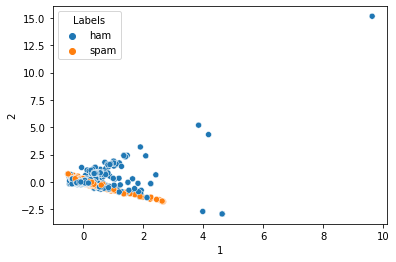

In [79]:
sns.scatterplot(pca_tf[1],pca_tf[2],hue=pca_tf['Labels'])
plt.show()

In [171]:
# Comparing Variance

In [106]:
var_data=np.sum(DTM.var())

In [105]:
np.sum(pd.DataFrame(pca_tf_stemmed).var())

30.526315789473717

#### PCA on TFIDF-stemmed

In [81]:

# Make an instance of the Model
ipca1=IncrementalPCA(n_components=5572)
tfidf_ipca=ipca1.fit_transform(tfidf_vectors)
# pca = PCA(n_components=5572)
# pca.fit(DTM)

# pca_tf_stemmed=pca.transform(DTM)

# print("Length of dataset :",len(pca_tf_stemmed))

# print("Shape: ",np.shape(pca_tf_stemmed))



In [82]:
tfidf_vectors

008704050406  0089mi  0121  01223585236  01223585334  0125698789   02  \
0              0.0     0.0   0.0          0.0          0.0         0.0  0.0   
1              0.0     0.0   0.0          0.0          0.0         0.0  0.0   
2              0.0     0.0   0.0          0.0          0.0         0.0  0.0   
3              0.0     0.0   0.0          0.0          0.0         0.0  0.0   
4              0.0     0.0   0.0          0.0          0.0         0.0  0.0   
...            ...     ...   ...          ...          ...         ...  ...   
5567           0.0     0.0   0.0          0.0          0.0         0.0  0.0   
5568           0.0     0.0   0.0          0.0          0.0         0.0  0.0   
5569           0.0     0.0   0.0          0.0          0.0         0.0  0.0   
5570           0.0     0.0   0.0          0.0          0.0         0.0  0.0   
5571           0.0     0.0   0.0          0.0          0.0         0.0  0.0   

      020603  0207  02070836089  ...  zero  zhong  zindgi  zoe  zogtoriu  \
0        0.0   0.0          0.0  ...   0.0    0.0     0.0  0.0       0.0   
1        0.0   0.0          0.0  ...   0.0    0.0     0.0  0.0       0.0   
2        0.0   0.0          0.0  ...   0.0    0.0     0.0  0.0       0.0   
3        0.0   0.0          0.0  ...   0.0    0.0     0.0  0.0       0.0   
4        0.0   0.0          0.0  ...   0.0    0.0     0.0  0.0       0.0   
...      ...   ...          ...  ...   ...    ...     ...  ...       ...   
5567     0.0   0.0          0.0  ...   0.0    0.0     0.0  0.0       0.0   
5568     0.0   0.0          0.0  ...   0.0    0.0     0.0  0.0       0.0   
5569     0.0   0.0          0.0  ...   0.0    0.0     0.0  0.0       0.0   
5570     0.0   0.0          0.0  ...   0.0    0.0     0.0  0.0       0.0   
5571     0.0   0.0          0.0  ...   0.0    0.0     0.0  0.0       0.0   

      zoom  zouk  zyada  üll  〨ud  
0      0.0   0.0    0.0  0.0  0.0  
1      0.0   0.0    0.0  0.0  0.0  
2      0.0   0.0    0.0  0.0  0.0  
3      0.0   0.0    0.0  0.0  0.0  
4      0.0   0.0    0.0  0.0  0.0  
...    ...   ...    ...  ...  ...  
5567   0.0   0.0    0.0  0.0  0.0  
5568   0.0   0.0    0.0  0.0  0.0  
5569   0.0   0.0    0.0  0.0  0.0  
5570   0.0   0.0    0.0  0.0  0.0  
5571   0.0   0.0    0.0  0.0  0.0  

[5572 rows x 8147 columns]

In [83]:
tfidf_ipca.shape

(5572, 5572)

In [86]:
np.sum(tfidf_vectors.var())

0.9912819867128928

In [84]:
np.sum(pd.DataFrame(tfidf_ipca).var())

0.9912819867128935

In [87]:
pca_tfidf=pd.DataFrame(tfidf_ipca)
pca_tfidf['Labels']=df.Labels
pca_tfidf

0         1         2         3         4         5         6  \
0    -0.034422 -0.009248  0.041609 -0.000981  0.002969  0.103522 -0.048007   
1    -0.028595  0.268865 -0.030661 -0.008885 -0.010312  0.011063  0.007144   
2    -0.014890 -0.026455 -0.079222  0.031239  0.031534  0.024132  0.050439   
3    -0.036678 -0.002103  0.022674 -0.025984  0.002461  0.068719 -0.018665   
4    -0.029904 -0.022918  0.007549 -0.045898 -0.016614 -0.009382  0.011709   
...        ...       ...       ...       ...       ...       ...       ...   
5567  0.061925 -0.031100 -0.146239  0.103650  0.078180 -0.011025 -0.072735   
5568 -0.033237  0.007120  0.175327  0.150985 -0.027222  0.089600 -0.058045   
5569 -0.024243 -0.013032 -0.011914 -0.038885 -0.000389  0.012257 -0.000577   
5570 -0.023558 -0.026683 -0.028917 -0.008128  0.019415  0.032791  0.046862   
5571 -0.025872 -0.018184 -0.019434 -0.020297  0.011886  0.017300  0.002774   

             7         8         9  ...          5563          5564  \
0    -0.012253  0.004852  0.012759  ... -5.493432e-18 -5.102526e-18   
1     0.003608 -0.001983  0.011647  ...  7.862372e-17  1.065059e-17   
2     0.000983  0.070215  0.043702  ...  3.163710e-17  5.388824e-18   
3     0.024237 -0.030687  0.000956  ... -3.182260e-17 -7.176233e-17   
4     0.016246 -0.003965 -0.013407  ...  3.291782e-17 -5.038999e-17   
...        ...       ...       ...  ...           ...           ...   
5567  0.080076  0.037247 -0.061572  ...  8.401296e-18  3.282930e-17   
5568  0.028819  0.035270  0.097099  ...  1.374099e-17 -3.466906e-17   
5569  0.022790 -0.017998 -0.020471  ... -3.800256e-17  1.734554e-17   
5570  0.043008  0.018095 -0.011032  ...  1.606525e-17 -7.038844e-18   
5571  0.005124  0.006960  0.030038  ... -1.360801e-17  1.161960e-17   

              5565          5566          5567          5568          5569  \
0    -5.686132e-18  8.087471e-18 -1.545496e-17 -2.495359e-18  1.746201e-17   
1    -1.337211e-17  3.556691e-17 -3.031192e-17 -4.072873e-17 -1.313621e-17   
2     1.664420e-17 -2.538558e-17 -8.211137e-18 -2.669848e-17 -2.697376e-18   
3    -1.409548e-17 -1.351356e-17  1.591914e-17 -4.390002e-17  7.538212e-17   
4    -2.982318e-17  7.682589e-18 -4.360356e-17 -1.705586e-17 -3.575538e-17   
...            ...           ...           ...           ...           ...   
5567  6.665302e-18  1.043375e-17 -5.117773e-18  1.595810e-17 -2.012254e-17   
5568 -3.130041e-17  2.087597e-17  4.015783e-17  2.479774e-17  3.675699e-18   
5569 -5.428634e-18  5.844358e-17 -7.181145e-18 -2.638677e-17  1.093985e-17   
5570 -1.177799e-17  1.037277e-17  1.937164e-17 -1.533468e-17 -2.673956e-17   
5571  6.097536e-17 -3.051013e-18  1.644938e-18 -7.335305e-18 -2.003233e-19   

              5570          5571  Labels  
0     4.916603e-18 -7.553840e-18     ham  
1    -2.998963e-17  5.365107e-18     ham  
2     2.407479e-17 -7.584333e-18    spam  
3     1.038721e-16  2.626310e-17     ham  
4     1.340896e-17  6.618715e-18     ham  
...            ...           ...     ...  
5567 -2.066210e-17  3.596502e-18    spam  
5568 -1.864277e-17  1.880413e-19     ham  
5569  2.209612e-17  4.249903e-17     ham  
5570 -1.209351e-17  7.025291e-18     ham  
5571 -3.997445e-17  4.260576e-18     ham  

[5572 rows x 5573 columns]

In [101]:
pca_tf.to_csv("pca_tf.csv",index=False)
pca_tfidf.to_csv("pca_tfidf.csv",index=False)

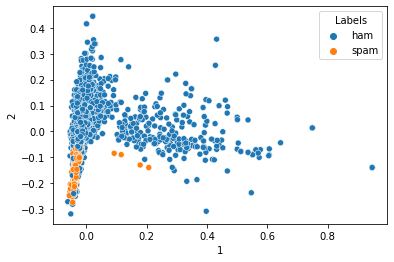

In [88]:
sns.scatterplot(pca_tfidf[1],pca_tfidf[2],hue=pca_tfidf['Labels'])
plt.show()

In [89]:
## Heuristic Dimension reduction
## Selecting words which have count greater than 1 percent of the documents

In [90]:
DTM1=DTM.copy()

In [91]:
for col in list(DTM1):
    prop = DTM1[col].sum()/DTM1.shape[0]
    if prop*100 < 1:
        DTM1 = DTM1.drop([col], axis=1)

print(DTM1.shape)

selected_variables = list(DTM1)

(5572, 162)


In [99]:
DTM1.to_csv("DTM_reduced with document count.csv",index=False)

In [95]:
## Selecting words which have count greater than 1 percent of the total words in the corpus

In [94]:
DTM2=DTM.copy()

for col in list(DTM2):
    prop=np.sum(DTM2[col])/np.sum(np.sum(DTM2))
    if prop*100 < 1:
        DTM2 = DTM2.drop([col], axis=1)

print(DTM2.shape)

selected_variables2 = list(DTM2)

(5572, 33)


In [98]:
DTM2.to_csv("DTM_reduced with total word count.csv",index=False)

## 6. Spam Filters

In [54]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix,f1_score,precision_score,recall_score,roc_curve,accuracy_score,roc_auc_score
from sklearn.model_selection import train_test_split

In [55]:
sns.set(font_scale=1)

def plot_matrix(cm, classes=['Default','No Default'], title='Confusion Matrix'):
    ax = sns.heatmap(cm, cmap="Blues", annot=True, xticklabels=classes, yticklabels=classes, cbar=False)
    ax.set(title=title, xlabel="predicted label", ylabel="true label")
    plt.show()

def accuracy_scores(true,pred):
    print("Accuracy: ",accuracy_score(true,pred))
    plot_matrix(confusion_matrix(true,pred))
    print("\nRecall Score\n",recall_score(true,pred))
    print("\nPrecision Score\n",precision_score(true,pred))
    print("\nF1 Score\n",f1_score(true,pred))

## Models on Stemmed TF Vectors

In [104]:
X=DTM
Y=df.Labels

In [118]:
results=pd.DataFrame(columns=["Dataset","Model","Accuracy","Precision","Recall","F1-Score"])


In [113]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
X_train,X_valid,y_train,y_valid=train_test_split(X_train,y_train,test_size=0.2)

Training Acuracy Scores :
Accuracy:  1.0


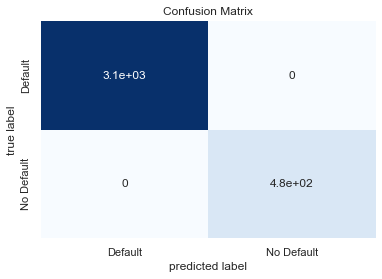


Recall Score
 1.0

Precision Score
 1.0

F1 Score
 1.0
Validation Acuracy Scores :
Accuracy:  0.9551569506726457


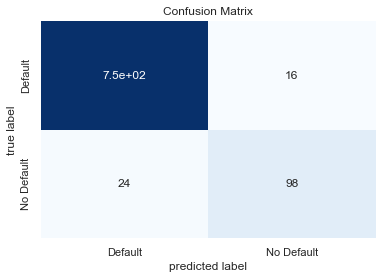


Recall Score
 0.8032786885245902

Precision Score
 0.8596491228070176

F1 Score
 0.8305084745762712


ValueError: could not broadcast input array from shape (6,) into shape (7,)

In [114]:
Dataset="Stemmed TF Vectors"
Model="DecisionTreeClassifier"
tree=DecisionTreeClassifier(criterion='entropy')
tree.fit(X_train,y_train)
y_pred_train=tree.predict(X_train)
y_pred_valid=tree.predict(X_valid)
print("Training Acuracy Scores :")
accuracy_scores(y_train,y_pred_train)
print("Validation Acuracy Scores :")
accuracy_scores(y_valid,y_pred_valid)
results.loc[len(results),]=[Dataset,Model,accuracy_score(y_valid,y_pred_valid),precision_score(y_valid,y_pred_valid),recall_score(y_valid,y_pred_valid),f1_score(y_valid,y_pred_valid)]

In [119]:
results.loc[len(results),:]=[Dataset,Model,accuracy_score(y_valid,y_pred_valid),precision_score(y_valid,y_pred_valid),recall_score(y_valid,y_pred_valid),f1_score(y_valid,y_pred_valid)]
results

Dataset                   Model  Accuracy Precision    Recall  \
0  Stemmed TF Vectors  DecisionTreeClassifier  0.955157  0.859649  0.803279   

   F1-Score  
0  0.830508

In [ ]:
# Logistic Regression

In [113]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
X_train,X_valid,y_train,y_valid=train_test_split(X_train,y_train,test_size=0.2)

Training Acuracy Scores :
Accuracy:  0.9966339410939692


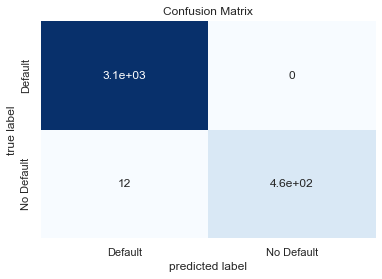


Recall Score
 0.9747899159663865

Precision Score
 1.0

F1 Score
 0.9872340425531915
Validation Acuracy Scores :
Accuracy:  0.9809417040358744


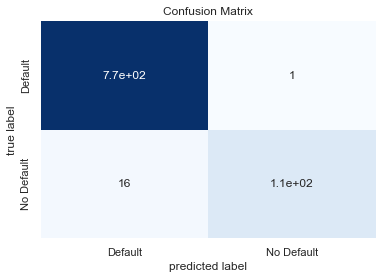


Recall Score
 0.8688524590163934

Precision Score
 0.9906542056074766

F1 Score
 0.9257641921397379


In [121]:
Dataset="Stemmed TF Vectors"
Model="Logistic Regression"
logit=LogisticRegression()
logit.fit(X_train,y_train)
y_pred_train=logit.predict(X_train)
y_pred_valid=logit.predict(X_valid)
print("Training Acuracy Scores :")
accuracy_scores(y_train,y_pred_train)
print("Validation Acuracy Scores :")
accuracy_scores(y_valid,y_pred_valid)
results.loc[len(results),]=[Dataset,Model,accuracy_score(y_valid,y_pred_valid),precision_score(y_valid,y_pred_valid),recall_score(y_valid,y_pred_valid),f1_score(y_valid,y_pred_valid)]

In [122]:
results

Dataset                   Model  Accuracy Precision    Recall  \
0  Stemmed TF Vectors  DecisionTreeClassifier  0.955157  0.859649  0.803279   
1  Stemmed TF Vectors     Logistic Regression  0.980942  0.990654  0.868852   

   F1-Score  
0  0.830508  
1  0.925764

In [123]:
# Random Forest

In [124]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
X_train,X_valid,y_train,y_valid=train_test_split(X_train,y_train,test_size=0.2)

Training Acuracy Scores :
Accuracy:  1.0


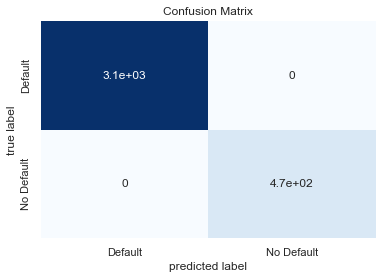


Recall Score
 1.0

Precision Score
 1.0

F1 Score
 1.0
Validation Acuracy Scores :
Accuracy:  0.9663677130044843


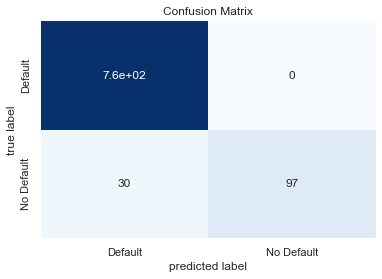


Recall Score
 0.7637795275590551

Precision Score
 1.0

F1 Score
 0.8660714285714286


In [125]:
Dataset="Stemmed TF Vectors"
Model="Random Forest"
model=RandomForestClassifier()
model.fit(X_train,y_train)
y_pred_train=model.predict(X_train)
y_pred_valid=model.predict(X_valid)
print("Training Acuracy Scores :")
accuracy_scores(y_train,y_pred_train)
print("Validation Acuracy Scores :")
accuracy_scores(y_valid,y_pred_valid)
results.loc[len(results),]=[Dataset,Model,accuracy_score(y_valid,y_pred_valid),precision_score(y_valid,y_pred_valid),recall_score(y_valid,y_pred_valid),f1_score(y_valid,y_pred_valid)]

In [ ]:
# Bagging with Random Forest

Training Acuracy Scores :
Accuracy:  0.988218793828892


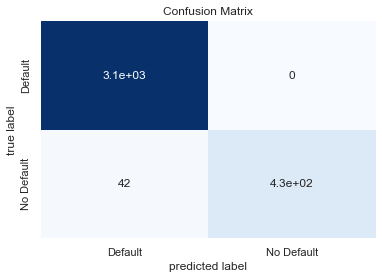


Recall Score
 0.910828025477707

Precision Score
 1.0

F1 Score
 0.9533333333333334
Validation Acuracy Scores :
Accuracy:  0.9562780269058296


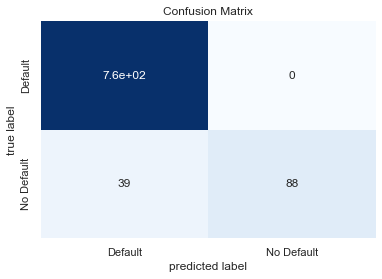


Recall Score
 0.6929133858267716

Precision Score
 1.0

F1 Score
 0.8186046511627907


In [126]:
Dataset="Stemmed TF Vectors"
Model="Bagging Random Forest"
model=BaggingClassifier(RandomForestClassifier())
model.fit(X_train,y_train)
y_pred_train=model.predict(X_train)
y_pred_valid=model.predict(X_valid)
print("Training Acuracy Scores :")
accuracy_scores(y_train,y_pred_train)
print("Validation Acuracy Scores :")
accuracy_scores(y_valid,y_pred_valid)
results.loc[len(results),]=[Dataset,Model,accuracy_score(y_valid,y_pred_valid),precision_score(y_valid,y_pred_valid),recall_score(y_valid,y_pred_valid),f1_score(y_valid,y_pred_valid)]

In [ ]:
# Adaboost Classifier

Training Acuracy Scores :
Accuracy:  1.0


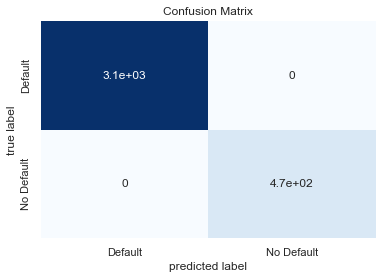


Recall Score
 1.0

Precision Score
 1.0

F1 Score
 1.0
Validation Acuracy Scores :
Accuracy:  0.9798206278026906


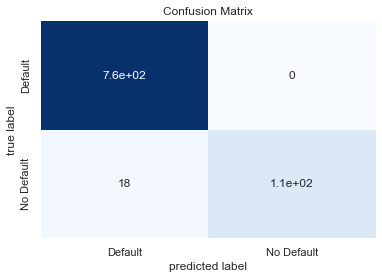


Recall Score
 0.8582677165354331

Precision Score
 1.0

F1 Score
 0.923728813559322


In [127]:
Dataset="Stemmed TF Vectors"
Model="Adaboost Classifier"
model=AdaBoostClassifier(n_estimators=500)
model.fit(X_train,y_train)
y_pred_train=model.predict(X_train)
y_pred_valid=model.predict(X_valid)
print("Training Acuracy Scores :")
accuracy_scores(y_train,y_pred_train)
print("Validation Acuracy Scores :")
accuracy_scores(y_valid,y_pred_valid)
results.loc[len(results),]=[Dataset,Model,accuracy_score(y_valid,y_pred_valid),precision_score(y_valid,y_pred_valid),recall_score(y_valid,y_pred_valid),f1_score(y_valid,y_pred_valid)]

In [128]:
results

Dataset                   Model  Accuracy Precision    Recall  \
0  Stemmed TF Vectors  DecisionTreeClassifier  0.955157  0.859649  0.803279   
1  Stemmed TF Vectors     Logistic Regression  0.980942  0.990654  0.868852   
2  Stemmed TF Vectors           Random Forest  0.966368       1.0   0.76378   
3  Stemmed TF Vectors   Bagging Random Forest  0.956278       1.0  0.692913   
4  Stemmed TF Vectors      Adaoost Classifier  0.979821       1.0  0.858268   

   F1-Score  
0  0.830508  
1  0.925764  
2  0.866071  
3  0.818605  
4  0.923729

In [ ]:
#Gradeient Boosting

Training Acuracy Scores :
Accuracy:  0.9741935483870968


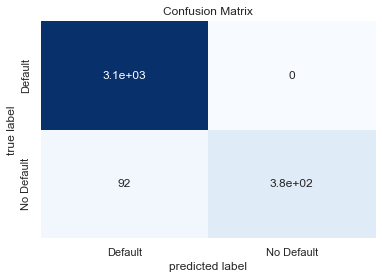


Recall Score
 0.8046709129511678

Precision Score
 1.0

F1 Score
 0.891764705882353
Validation Acuracy Scores :
Accuracy:  0.9517937219730942


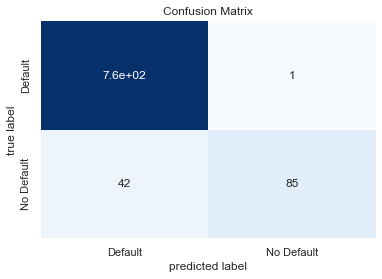


Recall Score
 0.6692913385826772

Precision Score
 0.9883720930232558

F1 Score
 0.7981220657276995


Dataset                          Model  Accuracy Precision  \
0  Stemmed TF Vectors         DecisionTreeClassifier  0.955157  0.859649   
1  Stemmed TF Vectors            Logistic Regression  0.980942  0.990654   
2  Stemmed TF Vectors                  Random Forest  0.966368       1.0   
3  Stemmed TF Vectors          Bagging Random Forest  0.956278       1.0   
4  Stemmed TF Vectors             Adaoost Classifier  0.979821       1.0   
5  Stemmed TF Vectors  Gradeient Boosting Classifier  0.951794  0.988372   

     Recall  F1-Score  
0  0.803279  0.830508  
1  0.868852  0.925764  
2   0.76378  0.866071  
3  0.692913  0.818605  
4  0.858268  0.923729  
5  0.669291  0.798122

In [129]:
Dataset="Stemmed TF Vectors"
Model="Gradeient Boosting Classifier"
model=GradientBoostingClassifier()
model.fit(X_train,y_train)
y_pred_train=model.predict(X_train)
y_pred_valid=model.predict(X_valid)
print("Training Acuracy Scores :")
accuracy_scores(y_train,y_pred_train)
print("Validation Acuracy Scores :")
accuracy_scores(y_valid,y_pred_valid)
results.loc[len(results),]=[Dataset,Model,accuracy_score(y_valid,y_pred_valid),precision_score(y_valid,y_pred_valid),recall_score(y_valid,y_pred_valid),f1_score(y_valid,y_pred_valid)]
results

Training Acuracy Scores :
Accuracy:  0.9245441795231416


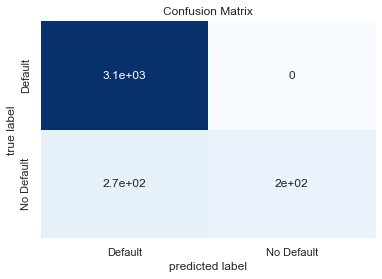


Recall Score
 0.4288747346072187

Precision Score
 1.0

F1 Score
 0.6002971768202081
Validation Acuracy Scores :
Accuracy:  0.8878923766816144


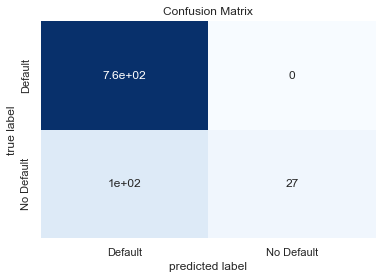


Recall Score
 0.2125984251968504

Precision Score
 1.0

F1 Score
 0.35064935064935066


Dataset                          Model  Accuracy Precision  \
0  Stemmed TF Vectors         DecisionTreeClassifier  0.955157  0.859649   
1  Stemmed TF Vectors            Logistic Regression  0.980942  0.990654   
2  Stemmed TF Vectors                  Random Forest  0.966368       1.0   
3  Stemmed TF Vectors          Bagging Random Forest  0.956278       1.0   
4  Stemmed TF Vectors             Adaoost Classifier  0.979821       1.0   
5  Stemmed TF Vectors  Gradeient Boosting Classifier  0.951794  0.988372   
6  Stemmed TF Vectors                 KNN Classifier  0.887892       1.0   

     Recall  F1-Score  
0  0.803279  0.830508  
1  0.868852  0.925764  
2   0.76378  0.866071  
3  0.692913  0.818605  
4  0.858268  0.923729  
5  0.669291  0.798122  
6  0.212598  0.350649

In [131]:
Dataset="Stemmed TF Vectors"
Model="KNN Classifier"
model=KNeighborsClassifier()
model.fit(X_train,y_train)
y_pred_train=model.predict(X_train)
y_pred_valid=model.predict(X_valid)
print("Training Acuracy Scores :")
accuracy_scores(y_train,y_pred_train)
print("Validation Acuracy Scores :")
accuracy_scores(y_valid,y_pred_valid)
results.loc[len(results),]=[Dataset,Model,accuracy_score(y_valid,y_pred_valid),precision_score(y_valid,y_pred_valid),recall_score(y_valid,y_pred_valid),f1_score(y_valid,y_pred_valid)]
results

Training Acuracy Scores :
Accuracy:  0.9952314165497896


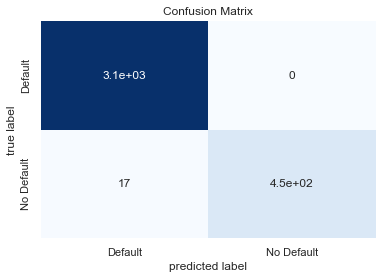


Recall Score
 0.9639065817409767

Precision Score
 1.0

F1 Score
 0.9816216216216216
Validation Acuracy Scores :
Accuracy:  0.9708520179372198


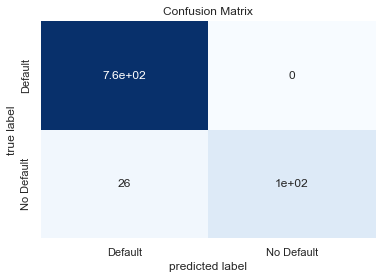


Recall Score
 0.7952755905511811

Precision Score
 1.0

F1 Score
 0.8859649122807018


Dataset                          Model  Accuracy Precision  \
0  Stemmed TF Vectors         DecisionTreeClassifier  0.955157  0.859649   
1  Stemmed TF Vectors            Logistic Regression  0.980942  0.990654   
2  Stemmed TF Vectors                  Random Forest  0.966368       1.0   
3  Stemmed TF Vectors          Bagging Random Forest  0.956278       1.0   
4  Stemmed TF Vectors             Adaoost Classifier  0.979821       1.0   
5  Stemmed TF Vectors  Gradeient Boosting Classifier  0.951794  0.988372   
6  Stemmed TF Vectors                 KNN Classifier  0.887892       1.0   
7  Stemmed TF Vectors                 SVM Classifier  0.970852       1.0   

     Recall  F1-Score  
0  0.803279  0.830508  
1  0.868852  0.925764  
2   0.76378  0.866071  
3  0.692913  0.818605  
4  0.858268  0.923729  
5  0.669291  0.798122  
6  0.212598  0.350649  
7  0.795276  0.885965

In [132]:
Dataset="Stemmed TF Vectors"
Model="SVM Classifier"
model=SVC()
model.fit(X_train,y_train)
y_pred_train=model.predict(X_train)
y_pred_valid=model.predict(X_valid)
print("Training Acuracy Scores :")
accuracy_scores(y_train,y_pred_train)
print("Validation Acuracy Scores :")
accuracy_scores(y_valid,y_pred_valid)
results.loc[len(results),]=[Dataset,Model,accuracy_score(y_valid,y_pred_valid),precision_score(y_valid,y_pred_valid),recall_score(y_valid,y_pred_valid),f1_score(y_valid,y_pred_valid)]
results

## Models on Stemmed TFIDF Vectors

In [133]:
X=tfidf_vectors
Y=df.Labels

In [134]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
X_train,X_valid,y_train,y_valid=train_test_split(X_train,y_train,test_size=0.2)

Training Acuracy Scores :
Accuracy:  1.0


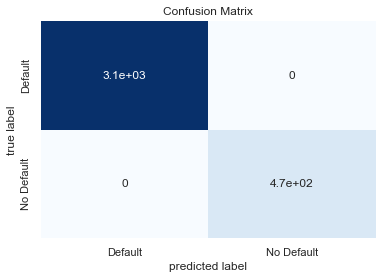


Recall Score
 1.0

Precision Score
 1.0

F1 Score
 1.0
Validation Acuracy Scores :
Accuracy:  0.9428251121076233


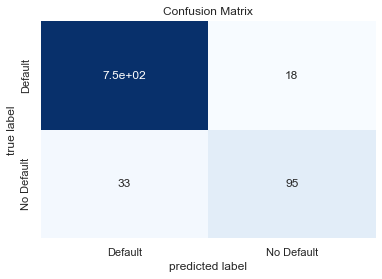


Recall Score
 0.7421875

Precision Score
 0.8407079646017699

F1 Score
 0.7883817427385892


In [135]:
Dataset="Stemmed TFIDF Vectors"
Model="DecisionTreeClassifier"
tree=DecisionTreeClassifier(criterion='entropy')
tree.fit(X_train,y_train)
y_pred_train=tree.predict(X_train)
y_pred_valid=tree.predict(X_valid)
print("Training Acuracy Scores :")
accuracy_scores(y_train,y_pred_train)
print("Validation Acuracy Scores :")
accuracy_scores(y_valid,y_pred_valid)
results.loc[len(results),]=[Dataset,Model,accuracy_score(y_valid,y_pred_valid),precision_score(y_valid,y_pred_valid),recall_score(y_valid,y_pred_valid),f1_score(y_valid,y_pred_valid)]

In [136]:
# results.loc[len(results),:]=[Dataset,Model,accuracy_score(y_valid,y_pred_valid),precision_score(y_valid,y_pred_valid),recall_score(y_valid,y_pred_valid),f1_score(y_valid,y_pred_valid)]
results

Dataset                          Model  Accuracy Precision  \
0     Stemmed TF Vectors         DecisionTreeClassifier  0.955157  0.859649   
1     Stemmed TF Vectors            Logistic Regression  0.980942  0.990654   
2     Stemmed TF Vectors                  Random Forest  0.966368       1.0   
3     Stemmed TF Vectors          Bagging Random Forest  0.956278       1.0   
4     Stemmed TF Vectors             Adaoost Classifier  0.979821       1.0   
5     Stemmed TF Vectors  Gradeient Boosting Classifier  0.951794  0.988372   
6     Stemmed TF Vectors                 KNN Classifier  0.887892       1.0   
7     Stemmed TF Vectors                 SVM Classifier  0.970852       1.0   
8  Stemmed TFIDF Vectors         DecisionTreeClassifier  0.942825  0.840708   

     Recall  F1-Score  
0  0.803279  0.830508  
1  0.868852  0.925764  
2   0.76378  0.866071  
3  0.692913  0.818605  
4  0.858268  0.923729  
5  0.669291  0.798122  
6  0.212598  0.350649  
7  0.795276  0.885965  
8  0.742188  0.788382

In [137]:
# Logistic Regression

In [138]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
X_train,X_valid,y_train,y_valid=train_test_split(X_train,y_train,test_size=0.2)

Training Acuracy Scores :
Accuracy:  0.9621318373071529


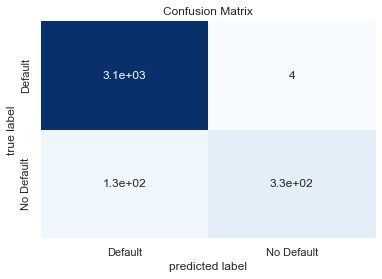


Recall Score
 0.7158351409978309

Precision Score
 0.9880239520958084

F1 Score
 0.8301886792452831
Validation Acuracy Scores :
Accuracy:  0.929372197309417


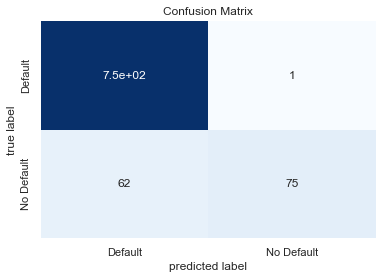


Recall Score
 0.5474452554744526

Precision Score
 0.9868421052631579

F1 Score
 0.704225352112676


In [139]:
Dataset="Stemmed TFIDF Vectors"
Model="Logistic Regression"
logit=LogisticRegression()
logit.fit(X_train,y_train)
y_pred_train=logit.predict(X_train)
y_pred_valid=logit.predict(X_valid)
print("Training Acuracy Scores :")
accuracy_scores(y_train,y_pred_train)
print("Validation Acuracy Scores :")
accuracy_scores(y_valid,y_pred_valid)
results.loc[len(results),]=[Dataset,Model,accuracy_score(y_valid,y_pred_valid),precision_score(y_valid,y_pred_valid),recall_score(y_valid,y_pred_valid),f1_score(y_valid,y_pred_valid)]

In [140]:
results

Dataset                          Model  Accuracy Precision  \
0     Stemmed TF Vectors         DecisionTreeClassifier  0.955157  0.859649   
1     Stemmed TF Vectors            Logistic Regression  0.980942  0.990654   
2     Stemmed TF Vectors                  Random Forest  0.966368       1.0   
3     Stemmed TF Vectors          Bagging Random Forest  0.956278       1.0   
4     Stemmed TF Vectors             Adaoost Classifier  0.979821       1.0   
5     Stemmed TF Vectors  Gradeient Boosting Classifier  0.951794  0.988372   
6     Stemmed TF Vectors                 KNN Classifier  0.887892       1.0   
7     Stemmed TF Vectors                 SVM Classifier  0.970852       1.0   
8  Stemmed TFIDF Vectors         DecisionTreeClassifier  0.942825  0.840708   
9  Stemmed TFIDF Vectors            Logistic Regression  0.929372  0.986842   

     Recall  F1-Score  
0  0.803279  0.830508  
1  0.868852  0.925764  
2   0.76378  0.866071  
3  0.692913  0.818605  
4  0.858268  0.923729  
5  0.669291  0.798122  
6  0.212598  0.350649  
7  0.795276  0.885965  
8  0.742188  0.788382  
9  0.547445  0.704225

In [141]:
# Random Forest

In [142]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
X_train,X_valid,y_train,y_valid=train_test_split(X_train,y_train,test_size=0.2)

Training Acuracy Scores :
Accuracy:  1.0


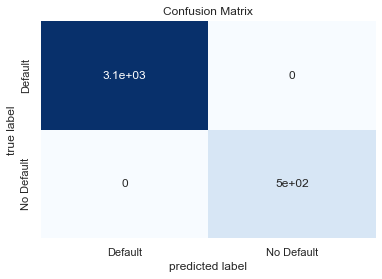


Recall Score
 1.0

Precision Score
 1.0

F1 Score
 1.0
Validation Acuracy Scores :
Accuracy:  0.9742152466367713


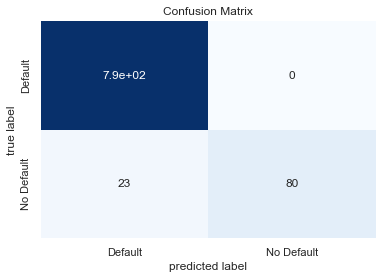


Recall Score
 0.7766990291262136

Precision Score
 1.0

F1 Score
 0.8743169398907104


In [143]:
Dataset="Stemmed TFIDF Vectors"
Model="Random Forest"
model=RandomForestClassifier()
model.fit(X_train,y_train)
y_pred_train=model.predict(X_train)
y_pred_valid=model.predict(X_valid)
print("Training Acuracy Scores :")
accuracy_scores(y_train,y_pred_train)
print("Validation Acuracy Scores :")
accuracy_scores(y_valid,y_pred_valid)
results.loc[len(results),]=[Dataset,Model,accuracy_score(y_valid,y_pred_valid),precision_score(y_valid,y_pred_valid),recall_score(y_valid,y_pred_valid),f1_score(y_valid,y_pred_valid)]

In [144]:
# Bagging with Random Forest

Training Acuracy Scores :
Accuracy:  0.991304347826087


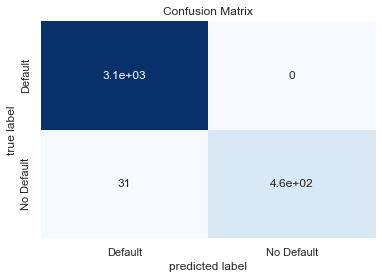


Recall Score
 0.9373737373737374

Precision Score
 1.0

F1 Score
 0.9676746611053181
Validation Acuracy Scores :
Accuracy:  0.9708520179372198


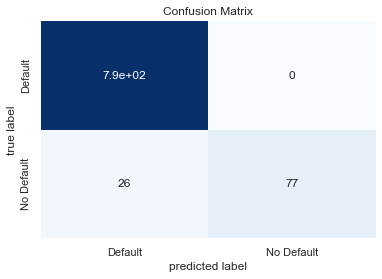


Recall Score
 0.7475728155339806

Precision Score
 1.0

F1 Score
 0.8555555555555555


In [145]:
Dataset="Stemmed TFIDF Vectors"
Model="Bagging Random Forest"
model=BaggingClassifier(RandomForestClassifier())
model.fit(X_train,y_train)
y_pred_train=model.predict(X_train)
y_pred_valid=model.predict(X_valid)
print("Training Acuracy Scores :")
accuracy_scores(y_train,y_pred_train)
print("Validation Acuracy Scores :")
accuracy_scores(y_valid,y_pred_valid)
results.loc[len(results),]=[Dataset,Model,accuracy_score(y_valid,y_pred_valid),precision_score(y_valid,y_pred_valid),recall_score(y_valid,y_pred_valid),f1_score(y_valid,y_pred_valid)]

In [146]:
# Adaboost Classifier

Training Acuracy Scores :
Accuracy:  0.9901823281907434


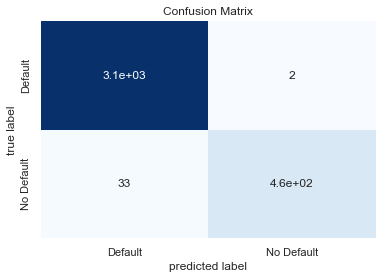


Recall Score
 0.9333333333333333

Precision Score
 0.9956896551724138

F1 Score
 0.9635036496350364
Validation Acuracy Scores :
Accuracy:  0.9697309417040358


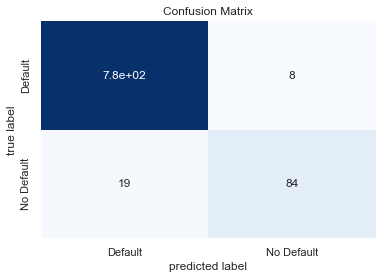


Recall Score
 0.8155339805825242

Precision Score
 0.9130434782608695

F1 Score
 0.8615384615384616


In [147]:
Dataset="Stemmed TFIDF Vectors"
Model="Adaboost Classifier"
model=AdaBoostClassifier(n_estimators=100)
model.fit(X_train,y_train)
y_pred_train=model.predict(X_train)
y_pred_valid=model.predict(X_valid)
print("Training Acuracy Scores :")
accuracy_scores(y_train,y_pred_train)
print("Validation Acuracy Scores :")
accuracy_scores(y_valid,y_pred_valid)
results.loc[len(results),]=[Dataset,Model,accuracy_score(y_valid,y_pred_valid),precision_score(y_valid,y_pred_valid),recall_score(y_valid,y_pred_valid),f1_score(y_valid,y_pred_valid)]

In [148]:
results

Dataset                          Model  Accuracy Precision  \
0      Stemmed TF Vectors         DecisionTreeClassifier  0.955157  0.859649   
1      Stemmed TF Vectors            Logistic Regression  0.980942  0.990654   
2      Stemmed TF Vectors                  Random Forest  0.966368       1.0   
3      Stemmed TF Vectors          Bagging Random Forest  0.956278       1.0   
4      Stemmed TF Vectors             Adaoost Classifier  0.979821       1.0   
5      Stemmed TF Vectors  Gradeient Boosting Classifier  0.951794  0.988372   
6      Stemmed TF Vectors                 KNN Classifier  0.887892       1.0   
7      Stemmed TF Vectors                 SVM Classifier  0.970852       1.0   
8   Stemmed TFIDF Vectors         DecisionTreeClassifier  0.942825  0.840708   
9   Stemmed TFIDF Vectors            Logistic Regression  0.929372  0.986842   
10  Stemmed TFIDF Vectors                  Random Forest  0.974215       1.0   
11  Stemmed TFIDF Vectors          Bagging Random Forest  0.970852       1.0   
12  Stemmed TFIDF Vectors            Adaboost Classifier  0.969731  0.913043   

      Recall  F1-Score  
0   0.803279  0.830508  
1   0.868852  0.925764  
2    0.76378  0.866071  
3   0.692913  0.818605  
4   0.858268  0.923729  
5   0.669291  0.798122  
6   0.212598  0.350649  
7   0.795276  0.885965  
8   0.742188  0.788382  
9   0.547445  0.704225  
10  0.776699  0.874317  
11  0.747573  0.855556  
12  0.815534  0.861538

In [149]:
#Gradeient Boosting

Training Acuracy Scores :
Accuracy:  0.9789621318373072


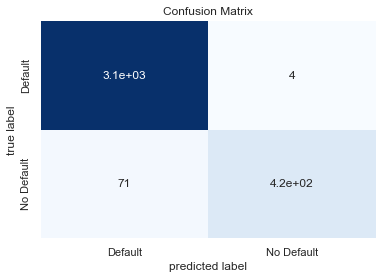


Recall Score
 0.8565656565656565

Precision Score
 0.9906542056074766

F1 Score
 0.9187432286023836
Validation Acuracy Scores :
Accuracy:  0.9562780269058296


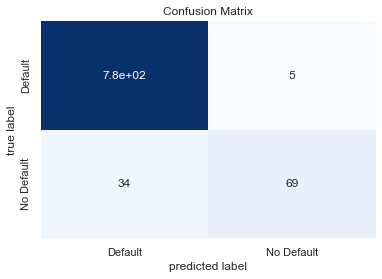


Recall Score
 0.6699029126213593

Precision Score
 0.9324324324324325

F1 Score
 0.7796610169491526


Dataset                          Model  Accuracy Precision  \
0      Stemmed TF Vectors         DecisionTreeClassifier  0.955157  0.859649   
1      Stemmed TF Vectors            Logistic Regression  0.980942  0.990654   
2      Stemmed TF Vectors                  Random Forest  0.966368       1.0   
3      Stemmed TF Vectors          Bagging Random Forest  0.956278       1.0   
4      Stemmed TF Vectors             Adaoost Classifier  0.979821       1.0   
5      Stemmed TF Vectors  Gradeient Boosting Classifier  0.951794  0.988372   
6      Stemmed TF Vectors                 KNN Classifier  0.887892       1.0   
7      Stemmed TF Vectors                 SVM Classifier  0.970852       1.0   
8   Stemmed TFIDF Vectors         DecisionTreeClassifier  0.942825  0.840708   
9   Stemmed TFIDF Vectors            Logistic Regression  0.929372  0.986842   
10  Stemmed TFIDF Vectors                  Random Forest  0.974215       1.0   
11  Stemmed TFIDF Vectors          Bagging Random Forest  0.970852       1.0   
12  Stemmed TFIDF Vectors            Adaboost Classifier  0.969731  0.913043   
13  Stemmed TFIDF Vectors  Gradeient Boosting Classifier  0.956278  0.932432   

      Recall  F1-Score  
0   0.803279  0.830508  
1   0.868852  0.925764  
2    0.76378  0.866071  
3   0.692913  0.818605  
4   0.858268  0.923729  
5   0.669291  0.798122  
6   0.212598  0.350649  
7   0.795276  0.885965  
8   0.742188  0.788382  
9   0.547445  0.704225  
10  0.776699  0.874317  
11  0.747573  0.855556  
12  0.815534  0.861538  
13  0.669903  0.779661

In [150]:
Dataset="Stemmed TFIDF Vectors"
Model="Gradeient Boosting Classifier"
model=GradientBoostingClassifier()
model.fit(X_train,y_train)
y_pred_train=model.predict(X_train)
y_pred_valid=model.predict(X_valid)
print("Training Acuracy Scores :")
accuracy_scores(y_train,y_pred_train)
print("Validation Acuracy Scores :")
accuracy_scores(y_valid,y_pred_valid)
results.loc[len(results),]=[Dataset,Model,accuracy_score(y_valid,y_pred_valid),precision_score(y_valid,y_pred_valid),recall_score(y_valid,y_pred_valid),f1_score(y_valid,y_pred_valid)]
results

Training Acuracy Scores :
Accuracy:  0.9018232819074333


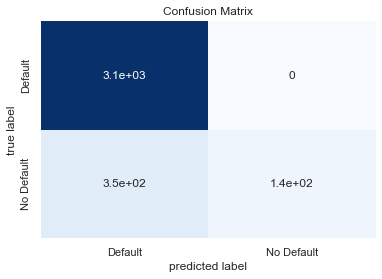


Recall Score
 0.29292929292929293

Precision Score
 1.0

F1 Score
 0.45312500000000006
Validation Acuracy Scores :
Accuracy:  0.9035874439461884


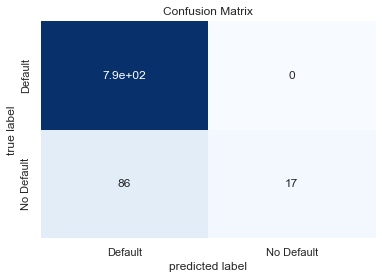


Recall Score
 0.1650485436893204

Precision Score
 1.0

F1 Score
 0.2833333333333334


Dataset                          Model  Accuracy Precision  \
0      Stemmed TF Vectors         DecisionTreeClassifier  0.955157  0.859649   
1      Stemmed TF Vectors            Logistic Regression  0.980942  0.990654   
2      Stemmed TF Vectors                  Random Forest  0.966368       1.0   
3      Stemmed TF Vectors          Bagging Random Forest  0.956278       1.0   
4      Stemmed TF Vectors             Adaoost Classifier  0.979821       1.0   
5      Stemmed TF Vectors  Gradeient Boosting Classifier  0.951794  0.988372   
6      Stemmed TF Vectors                 KNN Classifier  0.887892       1.0   
7      Stemmed TF Vectors                 SVM Classifier  0.970852       1.0   
8   Stemmed TFIDF Vectors         DecisionTreeClassifier  0.942825  0.840708   
9   Stemmed TFIDF Vectors            Logistic Regression  0.929372  0.986842   
10  Stemmed TFIDF Vectors                  Random Forest  0.974215       1.0   
11  Stemmed TFIDF Vectors          Bagging Random Forest  0.970852       1.0   
12  Stemmed TFIDF Vectors            Adaboost Classifier  0.969731  0.913043   
13  Stemmed TFIDF Vectors  Gradeient Boosting Classifier  0.956278  0.932432   
14  Stemmed TFIDF Vectors                 KNN Classifier  0.903587       1.0   

      Recall  F1-Score  
0   0.803279  0.830508  
1   0.868852  0.925764  
2    0.76378  0.866071  
3   0.692913  0.818605  
4   0.858268  0.923729  
5   0.669291  0.798122  
6   0.212598  0.350649  
7   0.795276  0.885965  
8   0.742188  0.788382  
9   0.547445  0.704225  
10  0.776699  0.874317  
11  0.747573  0.855556  
12  0.815534  0.861538  
13  0.669903  0.779661  
14  0.165049  0.283333

In [151]:
Dataset="Stemmed TFIDF Vectors"
Model="KNN Classifier"
model=KNeighborsClassifier()
model.fit(X_train,y_train)
y_pred_train=model.predict(X_train)
y_pred_valid=model.predict(X_valid)
print("Training Acuracy Scores :")
accuracy_scores(y_train,y_pred_train)
print("Validation Acuracy Scores :")
accuracy_scores(y_valid,y_pred_valid)
results.loc[len(results),]=[Dataset,Model,accuracy_score(y_valid,y_pred_valid),precision_score(y_valid,y_pred_valid),recall_score(y_valid,y_pred_valid),f1_score(y_valid,y_pred_valid)]
results

Training Acuracy Scores :
Accuracy:  0.9977559607293127


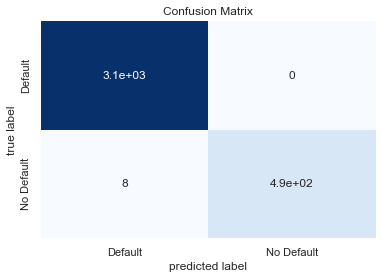


Recall Score
 0.9838383838383838

Precision Score
 1.0

F1 Score
 0.9918533604887985
Validation Acuracy Scores :
Accuracy:  0.9708520179372198


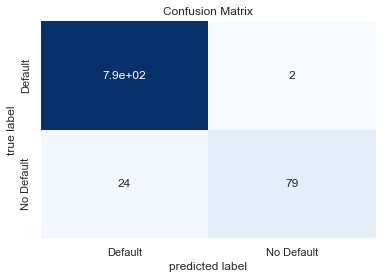


Recall Score
 0.7669902912621359

Precision Score
 0.9753086419753086

F1 Score
 0.8586956521739131


Dataset                          Model  Accuracy Precision  \
0      Stemmed TF Vectors         DecisionTreeClassifier  0.955157  0.859649   
1      Stemmed TF Vectors            Logistic Regression  0.980942  0.990654   
2      Stemmed TF Vectors                  Random Forest  0.966368       1.0   
3      Stemmed TF Vectors          Bagging Random Forest  0.956278       1.0   
4      Stemmed TF Vectors             Adaoost Classifier  0.979821       1.0   
5      Stemmed TF Vectors  Gradeient Boosting Classifier  0.951794  0.988372   
6      Stemmed TF Vectors                 KNN Classifier  0.887892       1.0   
7      Stemmed TF Vectors                 SVM Classifier  0.970852       1.0   
8   Stemmed TFIDF Vectors         DecisionTreeClassifier  0.942825  0.840708   
9   Stemmed TFIDF Vectors            Logistic Regression  0.929372  0.986842   
10  Stemmed TFIDF Vectors                  Random Forest  0.974215       1.0   
11  Stemmed TFIDF Vectors          Bagging Random Forest  0.970852       1.0   
12  Stemmed TFIDF Vectors            Adaboost Classifier  0.969731  0.913043   
13  Stemmed TFIDF Vectors  Gradeient Boosting Classifier  0.956278  0.932432   
14  Stemmed TFIDF Vectors                 KNN Classifier  0.903587       1.0   
15  Stemmed TFIDF Vectors                 SVM Classifier  0.970852  0.975309   

      Recall  F1-Score  
0   0.803279  0.830508  
1   0.868852  0.925764  
2    0.76378  0.866071  
3   0.692913  0.818605  
4   0.858268  0.923729  
5   0.669291  0.798122  
6   0.212598  0.350649  
7   0.795276  0.885965  
8   0.742188  0.788382  
9   0.547445  0.704225  
10  0.776699  0.874317  
11  0.747573  0.855556  
12  0.815534  0.861538  
13  0.669903  0.779661  
14  0.165049  0.283333  
15   0.76699  0.858696

In [152]:
Dataset="Stemmed TFIDF Vectors"
Model="SVM Classifier"
model=SVC()
model.fit(X_train,y_train)
y_pred_train=model.predict(X_train)
y_pred_valid=model.predict(X_valid)
print("Training Acuracy Scores :")
accuracy_scores(y_train,y_pred_train)
print("Validation Acuracy Scores :")
accuracy_scores(y_valid,y_pred_valid)
results.loc[len(results),]=[Dataset,Model,accuracy_score(y_valid,y_pred_valid),precision_score(y_valid,y_pred_valid),recall_score(y_valid,y_pred_valid),f1_score(y_valid,y_pred_valid)]
results

In [153]:
results.to_csv("results.csv",index=False)

## Models on Stemmed Doc2Vec embeddings

In [168]:
X=embedding_df
Y=df.Labels

In [169]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
X_train,X_valid,y_train,y_valid=train_test_split(X_train,y_train,test_size=0.2)

Training Acuracy Scores :
Accuracy:  0.9994389901823282


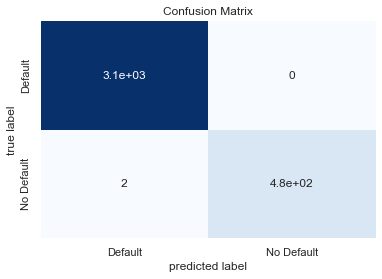


Recall Score
 0.9958246346555324

Precision Score
 1.0

F1 Score
 0.997907949790795
Validation Acuracy Scores :
Accuracy:  0.9405829596412556


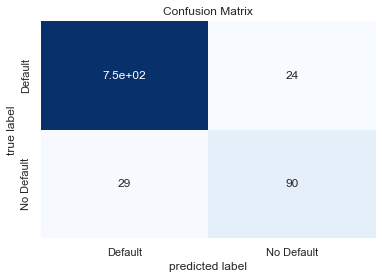


Recall Score
 0.7563025210084033

Precision Score
 0.7894736842105263

F1 Score
 0.7725321888412017


In [170]:
Dataset="Stemmed Doc2Vec embeddings"
Model="DecisionTreeClassifier"
tree=DecisionTreeClassifier(criterion='entropy')
tree.fit(X_train,y_train)
y_pred_train=tree.predict(X_train)
y_pred_valid=tree.predict(X_valid)
print("Training Acuracy Scores :")
accuracy_scores(y_train,y_pred_train)
print("Validation Acuracy Scores :")
accuracy_scores(y_valid,y_pred_valid)
results.loc[len(results),]=[Dataset,Model,accuracy_score(y_valid,y_pred_valid),precision_score(y_valid,y_pred_valid),recall_score(y_valid,y_pred_valid),f1_score(y_valid,y_pred_valid)]

In [171]:
# results.loc[len(results),:]=[Dataset,Model,accuracy_score(y_valid,y_pred_valid),precision_score(y_valid,y_pred_valid),recall_score(y_valid,y_pred_valid),f1_score(y_valid,y_pred_valid)]
results

Dataset                          Model  Accuracy  \
0           Stemmed TF Vectors         DecisionTreeClassifier  0.955157   
1           Stemmed TF Vectors            Logistic Regression  0.980942   
2           Stemmed TF Vectors                  Random Forest  0.966368   
3           Stemmed TF Vectors          Bagging Random Forest  0.956278   
4           Stemmed TF Vectors             Adaoost Classifier  0.979821   
5           Stemmed TF Vectors  Gradeient Boosting Classifier  0.951794   
6           Stemmed TF Vectors                 KNN Classifier  0.887892   
7           Stemmed TF Vectors                 SVM Classifier  0.970852   
8        Stemmed TFIDF Vectors         DecisionTreeClassifier  0.942825   
9        Stemmed TFIDF Vectors            Logistic Regression  0.929372   
10       Stemmed TFIDF Vectors                  Random Forest  0.974215   
11       Stemmed TFIDF Vectors          Bagging Random Forest  0.970852   
12       Stemmed TFIDF Vectors            Adaboost Classifier  0.969731   
13       Stemmed TFIDF Vectors  Gradeient Boosting Classifier  0.956278   
14       Stemmed TFIDF Vectors                 KNN Classifier  0.903587   
15       Stemmed TFIDF Vectors                 SVM Classifier  0.970852   
16  Stemmed Doc2Vec embeddings         DecisionTreeClassifier  0.940583   

   Precision    Recall  F1-Score  
0   0.859649  0.803279  0.830508  
1   0.990654  0.868852  0.925764  
2        1.0   0.76378  0.866071  
3        1.0  0.692913  0.818605  
4        1.0  0.858268  0.923729  
5   0.988372  0.669291  0.798122  
6        1.0  0.212598  0.350649  
7        1.0  0.795276  0.885965  
8   0.840708  0.742188  0.788382  
9   0.986842  0.547445  0.704225  
10       1.0  0.776699  0.874317  
11       1.0  0.747573  0.855556  
12  0.913043  0.815534  0.861538  
13  0.932432  0.669903  0.779661  
14       1.0  0.165049  0.283333  
15  0.975309   0.76699  0.858696  
16  0.789474  0.756303  0.772532

In [137]:
# Logistic Regression

In [172]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
X_train,X_valid,y_train,y_valid=train_test_split(X_train,y_train,test_size=0.2)

Training Acuracy Scores :
Accuracy:  0.9921458625525946


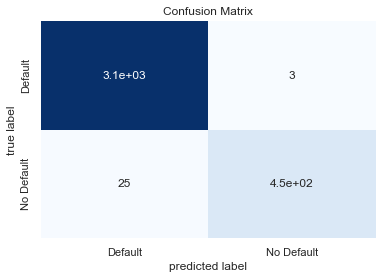


Recall Score
 0.9475890985324947

Precision Score
 0.9934065934065934

F1 Score
 0.9699570815450643
Validation Acuracy Scores :
Accuracy:  0.9742152466367713


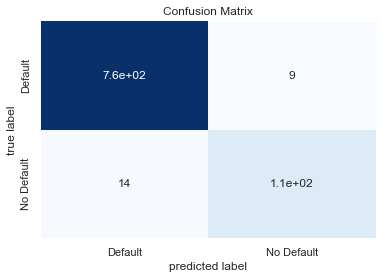


Recall Score
 0.8842975206611571

Precision Score
 0.9224137931034483

F1 Score
 0.9029535864978903


In [173]:
Dataset="Stemmed Doc2Vec embeddings"
Model="Logistic Regression"
logit=LogisticRegression()
logit.fit(X_train,y_train)
y_pred_train=logit.predict(X_train)
y_pred_valid=logit.predict(X_valid)
print("Training Acuracy Scores :")
accuracy_scores(y_train,y_pred_train)
print("Validation Acuracy Scores :")
accuracy_scores(y_valid,y_pred_valid)
results.loc[len(results),]=[Dataset,Model,accuracy_score(y_valid,y_pred_valid),precision_score(y_valid,y_pred_valid),recall_score(y_valid,y_pred_valid),f1_score(y_valid,y_pred_valid)]

In [174]:
results

Dataset                          Model  Accuracy  \
0           Stemmed TF Vectors         DecisionTreeClassifier  0.955157   
1           Stemmed TF Vectors            Logistic Regression  0.980942   
2           Stemmed TF Vectors                  Random Forest  0.966368   
3           Stemmed TF Vectors          Bagging Random Forest  0.956278   
4           Stemmed TF Vectors             Adaoost Classifier  0.979821   
5           Stemmed TF Vectors  Gradeient Boosting Classifier  0.951794   
6           Stemmed TF Vectors                 KNN Classifier  0.887892   
7           Stemmed TF Vectors                 SVM Classifier  0.970852   
8        Stemmed TFIDF Vectors         DecisionTreeClassifier  0.942825   
9        Stemmed TFIDF Vectors            Logistic Regression  0.929372   
10       Stemmed TFIDF Vectors                  Random Forest  0.974215   
11       Stemmed TFIDF Vectors          Bagging Random Forest  0.970852   
12       Stemmed TFIDF Vectors            Adaboost Classifier  0.969731   
13       Stemmed TFIDF Vectors  Gradeient Boosting Classifier  0.956278   
14       Stemmed TFIDF Vectors                 KNN Classifier  0.903587   
15       Stemmed TFIDF Vectors                 SVM Classifier  0.970852   
16  Stemmed Doc2Vec embeddings         DecisionTreeClassifier  0.940583   
17  Stemmed Doc2Vec embeddings            Logistic Regression  0.974215   

   Precision    Recall  F1-Score  
0   0.859649  0.803279  0.830508  
1   0.990654  0.868852  0.925764  
2        1.0   0.76378  0.866071  
3        1.0  0.692913  0.818605  
4        1.0  0.858268  0.923729  
5   0.988372  0.669291  0.798122  
6        1.0  0.212598  0.350649  
7        1.0  0.795276  0.885965  
8   0.840708  0.742188  0.788382  
9   0.986842  0.547445  0.704225  
10       1.0  0.776699  0.874317  
11       1.0  0.747573  0.855556  
12  0.913043  0.815534  0.861538  
13  0.932432  0.669903  0.779661  
14       1.0  0.165049  0.283333  
15  0.975309   0.76699  0.858696  
16  0.789474  0.756303  0.772532  
17  0.922414  0.884298  0.902954

In [175]:
# Random Forest

In [176]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
X_train,X_valid,y_train,y_valid=train_test_split(X_train,y_train,test_size=0.2)

Training Acuracy Scores :
Accuracy:  0.9994389901823282


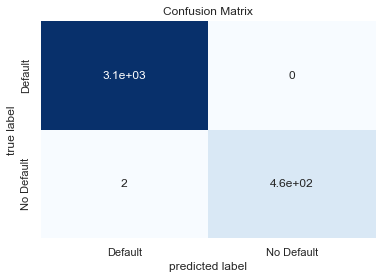


Recall Score
 0.9956989247311828

Precision Score
 1.0

F1 Score
 0.997844827586207
Validation Acuracy Scores :
Accuracy:  0.9540358744394619


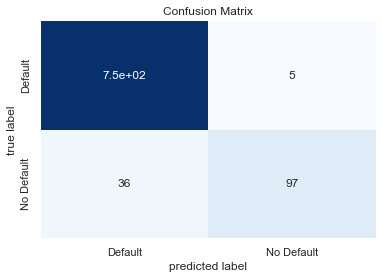


Recall Score
 0.7293233082706767

Precision Score
 0.9509803921568627

F1 Score
 0.8255319148936171


In [177]:
Dataset="Stemmed Doc2Vec embeddings"
Model="Random Forest"
model=RandomForestClassifier()
model.fit(X_train,y_train)
y_pred_train=model.predict(X_train)
y_pred_valid=model.predict(X_valid)
print("Training Acuracy Scores :")
accuracy_scores(y_train,y_pred_train)
print("Validation Acuracy Scores :")
accuracy_scores(y_valid,y_pred_valid)
results.loc[len(results),]=[Dataset,Model,accuracy_score(y_valid,y_pred_valid),precision_score(y_valid,y_pred_valid),recall_score(y_valid,y_pred_valid),f1_score(y_valid,y_pred_valid)]

In [178]:
# Bagging with Random Forest

Training Acuracy Scores :
Accuracy:  0.9938288920056101


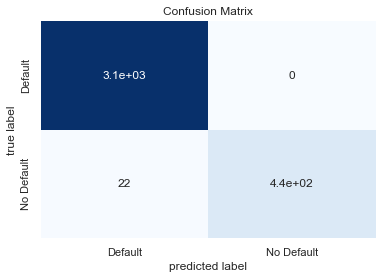


Recall Score
 0.9526881720430107

Precision Score
 1.0

F1 Score
 0.9757709251101321
Validation Acuracy Scores :
Accuracy:  0.9540358744394619


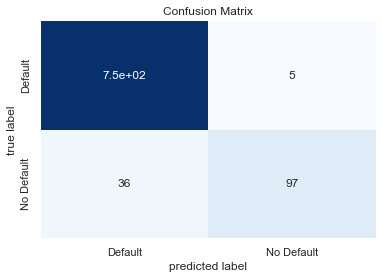


Recall Score
 0.7293233082706767

Precision Score
 0.9509803921568627

F1 Score
 0.8255319148936171


In [179]:
Dataset="Stemmed Doc2Vec embeddings"
Model="Bagging Random Forest"
model=BaggingClassifier(RandomForestClassifier())
model.fit(X_train,y_train)
y_pred_train=model.predict(X_train)
y_pred_valid=model.predict(X_valid)
print("Training Acuracy Scores :")
accuracy_scores(y_train,y_pred_train)
print("Validation Acuracy Scores :")
accuracy_scores(y_valid,y_pred_valid)
results.loc[len(results),]=[Dataset,Model,accuracy_score(y_valid,y_pred_valid),precision_score(y_valid,y_pred_valid),recall_score(y_valid,y_pred_valid),f1_score(y_valid,y_pred_valid)]

In [180]:
# Adaboost Classifier

Training Acuracy Scores :
Accuracy:  0.9974754558204768


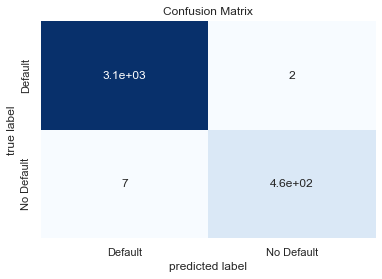


Recall Score
 0.9849462365591398

Precision Score
 0.9956521739130435

F1 Score
 0.9902702702702703
Validation Acuracy Scores :
Accuracy:  0.9618834080717489


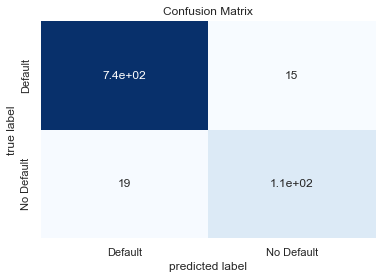


Recall Score
 0.8571428571428571

Precision Score
 0.8837209302325582

F1 Score
 0.8702290076335878


In [181]:
Dataset="Stemmed Doc2Vec embeddings"
Model="Adaboost Classifier"
model=AdaBoostClassifier(n_estimators=100)
model.fit(X_train,y_train)
y_pred_train=model.predict(X_train)
y_pred_valid=model.predict(X_valid)
print("Training Acuracy Scores :")
accuracy_scores(y_train,y_pred_train)
print("Validation Acuracy Scores :")
accuracy_scores(y_valid,y_pred_valid)
results.loc[len(results),]=[Dataset,Model,accuracy_score(y_valid,y_pred_valid),precision_score(y_valid,y_pred_valid),recall_score(y_valid,y_pred_valid),f1_score(y_valid,y_pred_valid)]

In [182]:
results

Dataset                          Model  Accuracy  \
0           Stemmed TF Vectors         DecisionTreeClassifier  0.955157   
1           Stemmed TF Vectors            Logistic Regression  0.980942   
2           Stemmed TF Vectors                  Random Forest  0.966368   
3           Stemmed TF Vectors          Bagging Random Forest  0.956278   
4           Stemmed TF Vectors             Adaoost Classifier  0.979821   
5           Stemmed TF Vectors  Gradeient Boosting Classifier  0.951794   
6           Stemmed TF Vectors                 KNN Classifier  0.887892   
7           Stemmed TF Vectors                 SVM Classifier  0.970852   
8        Stemmed TFIDF Vectors         DecisionTreeClassifier  0.942825   
9        Stemmed TFIDF Vectors            Logistic Regression  0.929372   
10       Stemmed TFIDF Vectors                  Random Forest  0.974215   
11       Stemmed TFIDF Vectors          Bagging Random Forest  0.970852   
12       Stemmed TFIDF Vectors            Adaboost Classifier  0.969731   
13       Stemmed TFIDF Vectors  Gradeient Boosting Classifier  0.956278   
14       Stemmed TFIDF Vectors                 KNN Classifier  0.903587   
15       Stemmed TFIDF Vectors                 SVM Classifier  0.970852   
16  Stemmed Doc2Vec embeddings         DecisionTreeClassifier  0.940583   
17  Stemmed Doc2Vec embeddings            Logistic Regression  0.974215   
18  Stemmed Doc2Vec embeddings                  Random Forest  0.954036   
19  Stemmed Doc2Vec embeddings          Bagging Random Forest  0.954036   
20  Stemmed Doc2Vec embeddings            Adaboost Classifier  0.961883   

   Precision    Recall  F1-Score  
0   0.859649  0.803279  0.830508  
1   0.990654  0.868852  0.925764  
2        1.0   0.76378  0.866071  
3        1.0  0.692913  0.818605  
4        1.0  0.858268  0.923729  
5   0.988372  0.669291  0.798122  
6        1.0  0.212598  0.350649  
7        1.0  0.795276  0.885965  
8   0.840708  0.742188  0.788382  
9   0.986842  0.547445  0.704225  
10       1.0  0.776699  0.874317  
11       1.0  0.747573  0.855556  
12  0.913043  0.815534  0.861538  
13  0.932432  0.669903  0.779661  
14       1.0  0.165049  0.283333  
15  0.975309   0.76699  0.858696  
16  0.789474  0.756303  0.772532  
17  0.922414  0.884298  0.902954  
18   0.95098  0.729323  0.825532  
19   0.95098  0.729323  0.825532  
20  0.883721  0.857143  0.870229

In [183]:
#Gradeient Boosting

Training Acuracy Scores :
Accuracy:  0.994109396914446


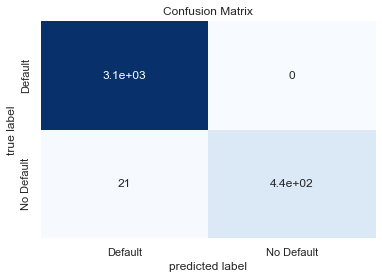


Recall Score
 0.9548387096774194

Precision Score
 1.0

F1 Score
 0.9768976897689768
Validation Acuracy Scores :
Accuracy:  0.9585201793721974


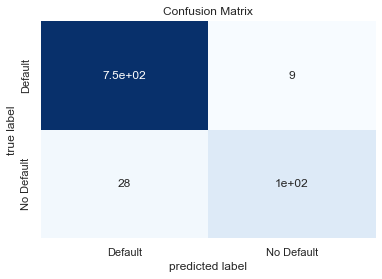


Recall Score
 0.7894736842105263

Precision Score
 0.9210526315789473

F1 Score
 0.8502024291497975


Dataset                          Model  Accuracy  \
0           Stemmed TF Vectors         DecisionTreeClassifier  0.955157   
1           Stemmed TF Vectors            Logistic Regression  0.980942   
2           Stemmed TF Vectors                  Random Forest  0.966368   
3           Stemmed TF Vectors          Bagging Random Forest  0.956278   
4           Stemmed TF Vectors             Adaoost Classifier  0.979821   
5           Stemmed TF Vectors  Gradeient Boosting Classifier  0.951794   
6           Stemmed TF Vectors                 KNN Classifier  0.887892   
7           Stemmed TF Vectors                 SVM Classifier  0.970852   
8        Stemmed TFIDF Vectors         DecisionTreeClassifier  0.942825   
9        Stemmed TFIDF Vectors            Logistic Regression  0.929372   
10       Stemmed TFIDF Vectors                  Random Forest  0.974215   
11       Stemmed TFIDF Vectors          Bagging Random Forest  0.970852   
12       Stemmed TFIDF Vectors            Adaboost Classifier  0.969731   
13       Stemmed TFIDF Vectors  Gradeient Boosting Classifier  0.956278   
14       Stemmed TFIDF Vectors                 KNN Classifier  0.903587   
15       Stemmed TFIDF Vectors                 SVM Classifier  0.970852   
16  Stemmed Doc2Vec embeddings         DecisionTreeClassifier  0.940583   
17  Stemmed Doc2Vec embeddings            Logistic Regression  0.974215   
18  Stemmed Doc2Vec embeddings                  Random Forest  0.954036   
19  Stemmed Doc2Vec embeddings          Bagging Random Forest  0.954036   
20  Stemmed Doc2Vec embeddings            Adaboost Classifier  0.961883   
21  Stemmed Doc2Vec embeddings  Gradeient Boosting Classifier   0.95852   

   Precision    Recall  F1-Score  
0   0.859649  0.803279  0.830508  
1   0.990654  0.868852  0.925764  
2        1.0   0.76378  0.866071  
3        1.0  0.692913  0.818605  
4        1.0  0.858268  0.923729  
5   0.988372  0.669291  0.798122  
6        1.0  0.212598  0.350649  
7        1.0  0.795276  0.885965  
8   0.840708  0.742188  0.788382  
9   0.986842  0.547445  0.704225  
10       1.0  0.776699  0.874317  
11       1.0  0.747573  0.855556  
12  0.913043  0.815534  0.861538  
13  0.932432  0.669903  0.779661  
14       1.0  0.165049  0.283333  
15  0.975309   0.76699  0.858696  
16  0.789474  0.756303  0.772532  
17  0.922414  0.884298  0.902954  
18   0.95098  0.729323  0.825532  
19   0.95098  0.729323  0.825532  
20  0.883721  0.857143  0.870229  
21  0.921053  0.789474  0.850202

In [184]:
Dataset="Stemmed Doc2Vec embeddings"
Model="Gradeient Boosting Classifier"
model=GradientBoostingClassifier()
model.fit(X_train,y_train)
y_pred_train=model.predict(X_train)
y_pred_valid=model.predict(X_valid)
print("Training Acuracy Scores :")
accuracy_scores(y_train,y_pred_train)
print("Validation Acuracy Scores :")
accuracy_scores(y_valid,y_pred_valid)
results.loc[len(results),]=[Dataset,Model,accuracy_score(y_valid,y_pred_valid),precision_score(y_valid,y_pred_valid),recall_score(y_valid,y_pred_valid),f1_score(y_valid,y_pred_valid)]
results

Training Acuracy Scores :
Accuracy:  0.9652173913043478


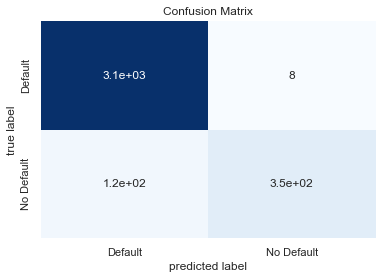


Recall Score
 0.7505376344086021

Precision Score
 0.9775910364145658

F1 Score
 0.849148418491484
Validation Acuracy Scores :
Accuracy:  0.9551569506726457


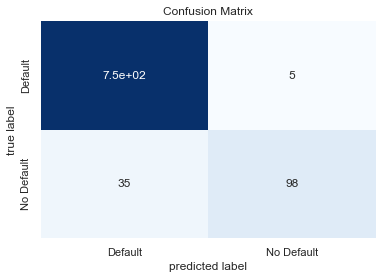


Recall Score
 0.7368421052631579

Precision Score
 0.9514563106796117

F1 Score
 0.8305084745762712


Dataset                          Model  Accuracy  \
0           Stemmed TF Vectors         DecisionTreeClassifier  0.955157   
1           Stemmed TF Vectors            Logistic Regression  0.980942   
2           Stemmed TF Vectors                  Random Forest  0.966368   
3           Stemmed TF Vectors          Bagging Random Forest  0.956278   
4           Stemmed TF Vectors             Adaoost Classifier  0.979821   
5           Stemmed TF Vectors  Gradeient Boosting Classifier  0.951794   
6           Stemmed TF Vectors                 KNN Classifier  0.887892   
7           Stemmed TF Vectors                 SVM Classifier  0.970852   
8        Stemmed TFIDF Vectors         DecisionTreeClassifier  0.942825   
9        Stemmed TFIDF Vectors            Logistic Regression  0.929372   
10       Stemmed TFIDF Vectors                  Random Forest  0.974215   
11       Stemmed TFIDF Vectors          Bagging Random Forest  0.970852   
12       Stemmed TFIDF Vectors            Adaboost Classifier  0.969731   
13       Stemmed TFIDF Vectors  Gradeient Boosting Classifier  0.956278   
14       Stemmed TFIDF Vectors                 KNN Classifier  0.903587   
15       Stemmed TFIDF Vectors                 SVM Classifier  0.970852   
16  Stemmed Doc2Vec embeddings         DecisionTreeClassifier  0.940583   
17  Stemmed Doc2Vec embeddings            Logistic Regression  0.974215   
18  Stemmed Doc2Vec embeddings                  Random Forest  0.954036   
19  Stemmed Doc2Vec embeddings          Bagging Random Forest  0.954036   
20  Stemmed Doc2Vec embeddings            Adaboost Classifier  0.961883   
21  Stemmed Doc2Vec embeddings  Gradeient Boosting Classifier   0.95852   
22  Stemmed Doc2Vec embeddings                 KNN Classifier  0.955157   

   Precision    Recall  F1-Score  
0   0.859649  0.803279  0.830508  
1   0.990654  0.868852  0.925764  
2        1.0   0.76378  0.866071  
3        1.0  0.692913  0.818605  
4        1.0  0.858268  0.923729  
5   0.988372  0.669291  0.798122  
6        1.0  0.212598  0.350649  
7        1.0  0.795276  0.885965  
8   0.840708  0.742188  0.788382  
9   0.986842  0.547445  0.704225  
10       1.0  0.776699  0.874317  
11       1.0  0.747573  0.855556  
12  0.913043  0.815534  0.861538  
13  0.932432  0.669903  0.779661  
14       1.0  0.165049  0.283333  
15  0.975309   0.76699  0.858696  
16  0.789474  0.756303  0.772532  
17  0.922414  0.884298  0.902954  
18   0.95098  0.729323  0.825532  
19   0.95098  0.729323  0.825532  
20  0.883721  0.857143  0.870229  
21  0.921053  0.789474  0.850202  
22  0.951456  0.736842  0.830508

In [185]:
Dataset="Stemmed Doc2Vec embeddings"
Model="KNN Classifier"
model=KNeighborsClassifier()
model.fit(X_train,y_train)
y_pred_train=model.predict(X_train)
y_pred_valid=model.predict(X_valid)
print("Training Acuracy Scores :")
accuracy_scores(y_train,y_pred_train)
print("Validation Acuracy Scores :")
accuracy_scores(y_valid,y_pred_valid)
results.loc[len(results),]=[Dataset,Model,accuracy_score(y_valid,y_pred_valid),precision_score(y_valid,y_pred_valid),recall_score(y_valid,y_pred_valid),f1_score(y_valid,y_pred_valid)]
results

Training Acuracy Scores :
Accuracy:  0.9848527349228612


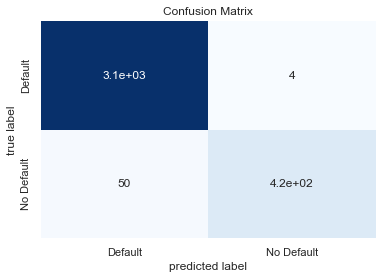


Recall Score
 0.8924731182795699

Precision Score
 0.9904534606205251

F1 Score
 0.9389140271493214
Validation Acuracy Scores :
Accuracy:  0.9562780269058296


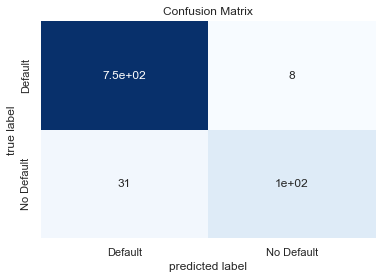


Recall Score
 0.7669172932330827

Precision Score
 0.9272727272727272

F1 Score
 0.8395061728395061


Dataset                          Model  Accuracy  \
0           Stemmed TF Vectors         DecisionTreeClassifier  0.955157   
1           Stemmed TF Vectors            Logistic Regression  0.980942   
2           Stemmed TF Vectors                  Random Forest  0.966368   
3           Stemmed TF Vectors          Bagging Random Forest  0.956278   
4           Stemmed TF Vectors             Adaoost Classifier  0.979821   
5           Stemmed TF Vectors  Gradeient Boosting Classifier  0.951794   
6           Stemmed TF Vectors                 KNN Classifier  0.887892   
7           Stemmed TF Vectors                 SVM Classifier  0.970852   
8        Stemmed TFIDF Vectors         DecisionTreeClassifier  0.942825   
9        Stemmed TFIDF Vectors            Logistic Regression  0.929372   
10       Stemmed TFIDF Vectors                  Random Forest  0.974215   
11       Stemmed TFIDF Vectors          Bagging Random Forest  0.970852   
12       Stemmed TFIDF Vectors            Adaboost Classifier  0.969731   
13       Stemmed TFIDF Vectors  Gradeient Boosting Classifier  0.956278   
14       Stemmed TFIDF Vectors                 KNN Classifier  0.903587   
15       Stemmed TFIDF Vectors                 SVM Classifier  0.970852   
16  Stemmed Doc2Vec embeddings         DecisionTreeClassifier  0.940583   
17  Stemmed Doc2Vec embeddings            Logistic Regression  0.974215   
18  Stemmed Doc2Vec embeddings                  Random Forest  0.954036   
19  Stemmed Doc2Vec embeddings          Bagging Random Forest  0.954036   
20  Stemmed Doc2Vec embeddings            Adaboost Classifier  0.961883   
21  Stemmed Doc2Vec embeddings  Gradeient Boosting Classifier   0.95852   
22  Stemmed Doc2Vec embeddings                 KNN Classifier  0.955157   
23  Stemmed Doc2Vec embeddings                 SVM Classifier  0.956278   

   Precision    Recall  F1-Score  
0   0.859649  0.803279  0.830508  
1   0.990654  0.868852  0.925764  
2        1.0   0.76378  0.866071  
3        1.0  0.692913  0.818605  
4        1.0  0.858268  0.923729  
5   0.988372  0.669291  0.798122  
6        1.0  0.212598  0.350649  
7        1.0  0.795276  0.885965  
8   0.840708  0.742188  0.788382  
9   0.986842  0.547445  0.704225  
10       1.0  0.776699  0.874317  
11       1.0  0.747573  0.855556  
12  0.913043  0.815534  0.861538  
13  0.932432  0.669903  0.779661  
14       1.0  0.165049  0.283333  
15  0.975309   0.76699  0.858696  
16  0.789474  0.756303  0.772532  
17  0.922414  0.884298  0.902954  
18   0.95098  0.729323  0.825532  
19   0.95098  0.729323  0.825532  
20  0.883721  0.857143  0.870229  
21  0.921053  0.789474  0.850202  
22  0.951456  0.736842  0.830508  
23  0.927273  0.766917  0.839506

In [186]:
Dataset="Stemmed Doc2Vec embeddings"
Model="SVM Classifier"
model=SVC()
model.fit(X_train,y_train)
y_pred_train=model.predict(X_train)
y_pred_valid=model.predict(X_valid)
print("Training Acuracy Scores :")
accuracy_scores(y_train,y_pred_train)
print("Validation Acuracy Scores :")
accuracy_scores(y_valid,y_pred_valid)
results.loc[len(results),]=[Dataset,Model,accuracy_score(y_valid,y_pred_valid),precision_score(y_valid,y_pred_valid),recall_score(y_valid,y_pred_valid),f1_score(y_valid,y_pred_valid)]
results

In [187]:
results.to_csv("results.csv",index=False)

In [206]:
pd.concat([embedding_df,hurestic_features],axis=1)

0         1         2         3         4         5         6  \
0    -0.377563  0.955933  0.465576  2.866211 -0.044769  0.549438  0.950256   
1    -0.514664  0.346069  0.268005  0.666748 -0.655273  0.381836 -0.224609   
2    -0.208252  0.305054 -0.397583  1.139404  0.037354  0.228249 -0.069580   
3    -0.773438  0.148438  0.967163  0.687988 -1.075195 -0.001228 -0.109009   
4     0.011353  0.053619  0.423462  1.212891 -0.265747  0.121094  0.175415   
...        ...       ...       ...       ...       ...       ...       ...   
5567 -0.784912 -0.181335  0.357285  0.773743  0.110474  0.491653  0.026947   
5568 -0.247803  0.491211  0.443054  0.571259 -0.384766  0.247772 -0.317749   
5569  0.128784  0.145020 -0.060303  0.023926 -0.470215 -0.065918  0.102966   
5570  1.500244  0.155151  0.328960  1.441162 -0.811233  0.406189  0.289856   
5571  0.335938  0.203827  0.261719  0.227295 -0.516602  0.152832  0.186035   

             7         8         9  ...       295       296       297  \
0    -0.976349 -0.169617  1.026567  ... -0.782593 -0.315918 -1.098389   
1    -0.383484  0.206787  0.648438  ... -0.859497 -1.025391 -0.661713   
2    -1.159637  1.012451  2.087524  ... -0.839844 -0.379242 -1.873047   
3    -0.783936 -0.087891  0.937500  ... -1.332520 -0.757149 -0.608398   
4    -0.275795  0.509888  0.749207  ... -0.288330 -0.136719 -0.638550   
...        ...       ...       ...  ...       ...       ...       ...   
5567 -1.004639  0.364258  0.966919  ... -0.737793 -1.977783 -1.298752   
5568 -0.816126  0.046753 -0.116682  ... -0.816650 -0.513794 -0.348633   
5569 -0.203125  0.347656  0.112305  ... -0.150391  0.293579  0.034210   
5570 -1.449860  0.287689  1.258911  ... -0.276978 -0.157623 -0.956403   
5571 -0.004272  0.345215  0.237061  ... -0.351562  0.083008 -0.152832   

           298       299  FirstWord_upper  Phone_num  suspicious_words  \
0    -0.675537  0.533600                0          0                 0   
1    -0.591064  0.751465                0          0                 0   
2    -1.436638  0.621632                0          1                 0   
3    -0.126465  1.132812                1          0                 0   
4     0.447323 -0.100464                0          0                 0   
...        ...       ...              ...        ...               ...   
5567 -0.100220 -0.385498                0          1                 1   
5568  0.076172  0.650269                0          0                 0   
5569  0.474121 -0.128662                0          0                 0   
5570 -0.710579 -0.594551                0          0                 0   
5571 -0.416946  0.057129                0          0                 0   

      percent_stopWords  Length_of_SMS  
0                  20.0             20  
1                   0.0              6  
2             17.857143             28  
3             18.181818             11  
4             38.461538             13  
...                 ...            ...  
5567          26.666667             30  
5568               12.5              8  
5569               40.0             10  
5570          38.461538             26  
5571          33.333333              6  

[5572 rows x 305 columns]

## Models on Stemmed Doc2Vec embeddings + Heuristic features

In [207]:
X=pd.concat([embedding_df,hurestic_features],axis=1)
Y=df.Labels

In [208]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
X_train,X_valid,y_train,y_valid=train_test_split(X_train,y_train,test_size=0.2)

Training Acuracy Scores :
Accuracy:  0.9994389901823282


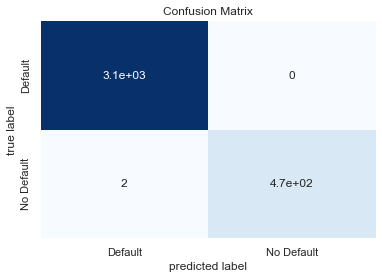


Recall Score
 0.9957446808510638

Precision Score
 1.0

F1 Score
 0.9978678038379531
Validation Acuracy Scores :
Accuracy:  0.9573991031390134


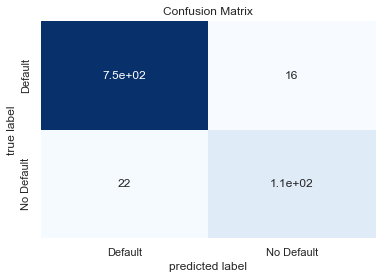


Recall Score
 0.828125

Precision Score
 0.8688524590163934

F1 Score
 0.8480000000000001


In [209]:
Dataset="Stemmed Doc2Vec embeddings + Heuristic features"
Model="DecisionTreeClassifier"
tree=DecisionTreeClassifier(criterion='entropy')
tree.fit(X_train,y_train)
y_pred_train=tree.predict(X_train)
y_pred_valid=tree.predict(X_valid)
print("Training Acuracy Scores :")
accuracy_scores(y_train,y_pred_train)
print("Validation Acuracy Scores :")
accuracy_scores(y_valid,y_pred_valid)
results.loc[len(results),]=[Dataset,Model,accuracy_score(y_valid,y_pred_valid),precision_score(y_valid,y_pred_valid),recall_score(y_valid,y_pred_valid),f1_score(y_valid,y_pred_valid)]

In [210]:
# results.loc[len(results),:]=[Dataset,Model,accuracy_score(y_valid,y_pred_valid),precision_score(y_valid,y_pred_valid),recall_score(y_valid,y_pred_valid),f1_score(y_valid,y_pred_valid)]
results

Dataset  \
0                                Stemmed TF Vectors   
1                                Stemmed TF Vectors   
2                                Stemmed TF Vectors   
3                                Stemmed TF Vectors   
4                                Stemmed TF Vectors   
5                                Stemmed TF Vectors   
6                                Stemmed TF Vectors   
7                                Stemmed TF Vectors   
8                             Stemmed TFIDF Vectors   
9                             Stemmed TFIDF Vectors   
10                            Stemmed TFIDF Vectors   
11                            Stemmed TFIDF Vectors   
12                            Stemmed TFIDF Vectors   
13                            Stemmed TFIDF Vectors   
14                            Stemmed TFIDF Vectors   
15                            Stemmed TFIDF Vectors   
16                       Stemmed Doc2Vec embeddings   
17                       Stemmed Doc2Vec embeddings   
18                       Stemmed Doc2Vec embeddings   
19                       Stemmed Doc2Vec embeddings   
20                       Stemmed Doc2Vec embeddings   
21                       Stemmed Doc2Vec embeddings   
22                       Stemmed Doc2Vec embeddings   
23                       Stemmed Doc2Vec embeddings   
24  Stemmed Doc2Vec embeddings + Heuristic features   

                            Model  Accuracy Precision    Recall  F1-Score  
0          DecisionTreeClassifier  0.955157  0.859649  0.803279  0.830508  
1             Logistic Regression  0.980942  0.990654  0.868852  0.925764  
2                   Random Forest  0.966368       1.0   0.76378  0.866071  
3           Bagging Random Forest  0.956278       1.0  0.692913  0.818605  
4              Adaoost Classifier  0.979821       1.0  0.858268  0.923729  
5   Gradeient Boosting Classifier  0.951794  0.988372  0.669291  0.798122  
6                  KNN Classifier  0.887892       1.0  0.212598  0.350649  
7                  SVM Classifier  0.970852       1.0  0.795276  0.885965  
8          DecisionTreeClassifier  0.942825  0.840708  0.742188  0.788382  
9             Logistic Regression  0.929372  0.986842  0.547445  0.704225  
10                  Random Forest  0.974215       1.0  0.776699  0.874317  
11          Bagging Random Forest  0.970852       1.0  0.747573  0.855556  
12            Adaboost Classifier  0.969731  0.913043  0.815534  0.861538  
13  Gradeient Boosting Classifier  0.956278  0.932432  0.669903  0.779661  
14                 KNN Classifier  0.903587       1.0  0.165049  0.283333  
15                 SVM Classifier  0.970852  0.975309   0.76699  0.858696  
16         DecisionTreeClassifier  0.940583  0.789474  0.756303  0.772532  
17            Logistic Regression  0.974215  0.922414  0.884298  0.902954  
18                  Random Forest  0.954036   0.95098  0.729323  0.825532  
19          Bagging Random Forest  0.954036   0.95098  0.729323  0.825532  
20            Adaboost Classifier  0.961883  0.883721  0.857143  0.870229  
21  Gradeient Boosting Classifier   0.95852  0.921053  0.789474  0.850202  
22                 KNN Classifier  0.955157  0.951456  0.736842  0.830508  
23                 SVM Classifier  0.956278  0.927273  0.766917  0.839506  
24         DecisionTreeClassifier  0.957399  0.868852  0.828125     0.848

In [211]:
# Logistic Regression

In [212]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
X_train,X_valid,y_train,y_valid=train_test_split(X_train,y_train,test_size=0.2)

Training Acuracy Scores :
Accuracy:  0.9932678821879383


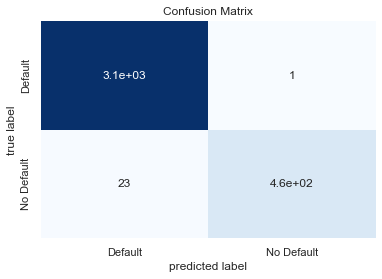


Recall Score
 0.9526748971193416

Precision Score
 0.9978448275862069

F1 Score
 0.9747368421052632
Validation Acuracy Scores :
Accuracy:  0.9697309417040358


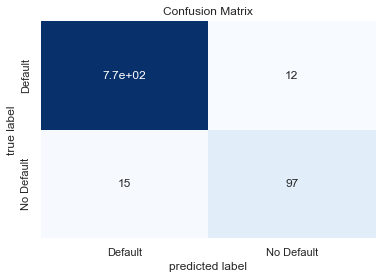


Recall Score
 0.8660714285714286

Precision Score
 0.8899082568807339

F1 Score
 0.8778280542986426


In [213]:
Dataset="Stemmed Doc2Vec embeddings + Heuristic features"
Model="Logistic Regression"
logit=LogisticRegression()
logit.fit(X_train,y_train)
y_pred_train=logit.predict(X_train)
y_pred_valid=logit.predict(X_valid)
print("Training Acuracy Scores :")
accuracy_scores(y_train,y_pred_train)
print("Validation Acuracy Scores :")
accuracy_scores(y_valid,y_pred_valid)
results.loc[len(results),]=[Dataset,Model,accuracy_score(y_valid,y_pred_valid),precision_score(y_valid,y_pred_valid),recall_score(y_valid,y_pred_valid),f1_score(y_valid,y_pred_valid)]

In [214]:
results

Dataset  \
0                                Stemmed TF Vectors   
1                                Stemmed TF Vectors   
2                                Stemmed TF Vectors   
3                                Stemmed TF Vectors   
4                                Stemmed TF Vectors   
5                                Stemmed TF Vectors   
6                                Stemmed TF Vectors   
7                                Stemmed TF Vectors   
8                             Stemmed TFIDF Vectors   
9                             Stemmed TFIDF Vectors   
10                            Stemmed TFIDF Vectors   
11                            Stemmed TFIDF Vectors   
12                            Stemmed TFIDF Vectors   
13                            Stemmed TFIDF Vectors   
14                            Stemmed TFIDF Vectors   
15                            Stemmed TFIDF Vectors   
16                       Stemmed Doc2Vec embeddings   
17                       Stemmed Doc2Vec embeddings   
18                       Stemmed Doc2Vec embeddings   
19                       Stemmed Doc2Vec embeddings   
20                       Stemmed Doc2Vec embeddings   
21                       Stemmed Doc2Vec embeddings   
22                       Stemmed Doc2Vec embeddings   
23                       Stemmed Doc2Vec embeddings   
24  Stemmed Doc2Vec embeddings + Heuristic features   
25  Stemmed Doc2Vec embeddings + Heuristic features   

                            Model  Accuracy Precision    Recall  F1-Score  
0          DecisionTreeClassifier  0.955157  0.859649  0.803279  0.830508  
1             Logistic Regression  0.980942  0.990654  0.868852  0.925764  
2                   Random Forest  0.966368       1.0   0.76378  0.866071  
3           Bagging Random Forest  0.956278       1.0  0.692913  0.818605  
4              Adaoost Classifier  0.979821       1.0  0.858268  0.923729  
5   Gradeient Boosting Classifier  0.951794  0.988372  0.669291  0.798122  
6                  KNN Classifier  0.887892       1.0  0.212598  0.350649  
7                  SVM Classifier  0.970852       1.0  0.795276  0.885965  
8          DecisionTreeClassifier  0.942825  0.840708  0.742188  0.788382  
9             Logistic Regression  0.929372  0.986842  0.547445  0.704225  
10                  Random Forest  0.974215       1.0  0.776699  0.874317  
11          Bagging Random Forest  0.970852       1.0  0.747573  0.855556  
12            Adaboost Classifier  0.969731  0.913043  0.815534  0.861538  
13  Gradeient Boosting Classifier  0.956278  0.932432  0.669903  0.779661  
14                 KNN Classifier  0.903587       1.0  0.165049  0.283333  
15                 SVM Classifier  0.970852  0.975309   0.76699  0.858696  
16         DecisionTreeClassifier  0.940583  0.789474  0.756303  0.772532  
17            Logistic Regression  0.974215  0.922414  0.884298  0.902954  
18                  Random Forest  0.954036   0.95098  0.729323  0.825532  
19          Bagging Random Forest  0.954036   0.95098  0.729323  0.825532  
20            Adaboost Classifier  0.961883  0.883721  0.857143  0.870229  
21  Gradeient Boosting Classifier   0.95852  0.921053  0.789474  0.850202  
22                 KNN Classifier  0.955157  0.951456  0.736842  0.830508  
23                 SVM Classifier  0.956278  0.927273  0.766917  0.839506  
24         DecisionTreeClassifier  0.957399  0.868852  0.828125     0.848  
25            Logistic Regression  0.969731  0.889908  0.866071  0.877828

In [215]:
# Random Forest

In [216]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
X_train,X_valid,y_train,y_valid=train_test_split(X_train,y_train,test_size=0.2)

Training Acuracy Scores :
Accuracy:  1.0


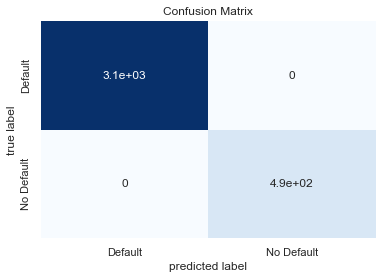


Recall Score
 1.0

Precision Score
 1.0

F1 Score
 1.0
Validation Acuracy Scores :
Accuracy:  0.9742152466367713


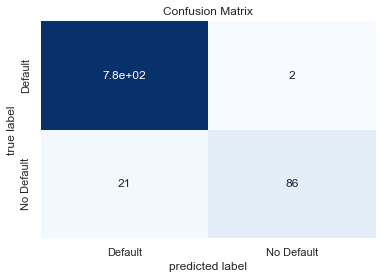


Recall Score
 0.8037383177570093

Precision Score
 0.9772727272727273

F1 Score
 0.882051282051282


In [217]:
Dataset="Stemmed Doc2Vec embeddings + Heuristic features"
Model="Random Forest"
model=RandomForestClassifier()
model.fit(X_train,y_train)
y_pred_train=model.predict(X_train)
y_pred_valid=model.predict(X_valid)
print("Training Acuracy Scores :")
accuracy_scores(y_train,y_pred_train)
print("Validation Acuracy Scores :")
accuracy_scores(y_valid,y_pred_valid)
results.loc[len(results),]=[Dataset,Model,accuracy_score(y_valid,y_pred_valid),precision_score(y_valid,y_pred_valid),recall_score(y_valid,y_pred_valid),f1_score(y_valid,y_pred_valid)]

In [218]:
# Bagging with Random Forest

Training Acuracy Scores :
Accuracy:  0.9946704067321178


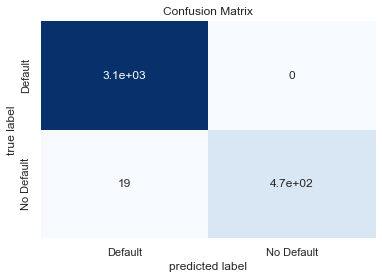


Recall Score
 0.9613034623217923

Precision Score
 1.0

F1 Score
 0.9802699896157839
Validation Acuracy Scores :
Accuracy:  0.9719730941704036


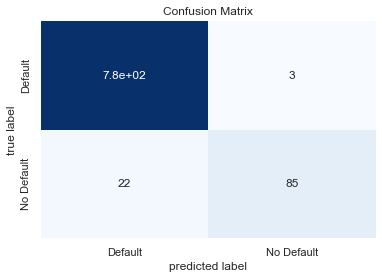


Recall Score
 0.794392523364486

Precision Score
 0.9659090909090909

F1 Score
 0.8717948717948717


In [219]:
Dataset="Stemmed Doc2Vec embeddings + Heuristic features"
Model="Bagging Random Forest"
model=BaggingClassifier(RandomForestClassifier())
model.fit(X_train,y_train)
y_pred_train=model.predict(X_train)
y_pred_valid=model.predict(X_valid)
print("Training Acuracy Scores :")
accuracy_scores(y_train,y_pred_train)
print("Validation Acuracy Scores :")
accuracy_scores(y_valid,y_pred_valid)
results.loc[len(results),]=[Dataset,Model,accuracy_score(y_valid,y_pred_valid),precision_score(y_valid,y_pred_valid),recall_score(y_valid,y_pred_valid),f1_score(y_valid,y_pred_valid)]

In [220]:
# Adaboost Classifier

Training Acuracy Scores :
Accuracy:  1.0


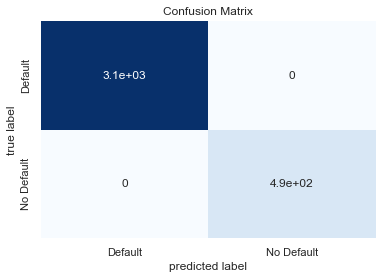


Recall Score
 1.0

Precision Score
 1.0

F1 Score
 1.0
Validation Acuracy Scores :
Accuracy:  0.9786995515695067


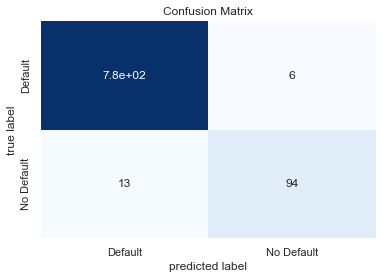


Recall Score
 0.8785046728971962

Precision Score
 0.94

F1 Score
 0.9082125603864735


In [221]:
Dataset="Stemmed Doc2Vec embeddings + Heuristic features"
Model="Adaboost Classifier"
model=AdaBoostClassifier(n_estimators=100)
model.fit(X_train,y_train)
y_pred_train=model.predict(X_train)
y_pred_valid=model.predict(X_valid)
print("Training Acuracy Scores :")
accuracy_scores(y_train,y_pred_train)
print("Validation Acuracy Scores :")
accuracy_scores(y_valid,y_pred_valid)
results.loc[len(results),]=[Dataset,Model,accuracy_score(y_valid,y_pred_valid),precision_score(y_valid,y_pred_valid),recall_score(y_valid,y_pred_valid),f1_score(y_valid,y_pred_valid)]

In [222]:
results

Dataset  \
0                                Stemmed TF Vectors   
1                                Stemmed TF Vectors   
2                                Stemmed TF Vectors   
3                                Stemmed TF Vectors   
4                                Stemmed TF Vectors   
5                                Stemmed TF Vectors   
6                                Stemmed TF Vectors   
7                                Stemmed TF Vectors   
8                             Stemmed TFIDF Vectors   
9                             Stemmed TFIDF Vectors   
10                            Stemmed TFIDF Vectors   
11                            Stemmed TFIDF Vectors   
12                            Stemmed TFIDF Vectors   
13                            Stemmed TFIDF Vectors   
14                            Stemmed TFIDF Vectors   
15                            Stemmed TFIDF Vectors   
16                       Stemmed Doc2Vec embeddings   
17                       Stemmed Doc2Vec embeddings   
18                       Stemmed Doc2Vec embeddings   
19                       Stemmed Doc2Vec embeddings   
20                       Stemmed Doc2Vec embeddings   
21                       Stemmed Doc2Vec embeddings   
22                       Stemmed Doc2Vec embeddings   
23                       Stemmed Doc2Vec embeddings   
24  Stemmed Doc2Vec embeddings + Heuristic features   
25  Stemmed Doc2Vec embeddings + Heuristic features   
26  Stemmed Doc2Vec embeddings + Heuristic features   
27  Stemmed Doc2Vec embeddings + Heuristic features   
28  Stemmed Doc2Vec embeddings + Heuristic features   

                            Model  Accuracy Precision    Recall  F1-Score  
0          DecisionTreeClassifier  0.955157  0.859649  0.803279  0.830508  
1             Logistic Regression  0.980942  0.990654  0.868852  0.925764  
2                   Random Forest  0.966368       1.0   0.76378  0.866071  
3           Bagging Random Forest  0.956278       1.0  0.692913  0.818605  
4              Adaoost Classifier  0.979821       1.0  0.858268  0.923729  
5   Gradeient Boosting Classifier  0.951794  0.988372  0.669291  0.798122  
6                  KNN Classifier  0.887892       1.0  0.212598  0.350649  
7                  SVM Classifier  0.970852       1.0  0.795276  0.885965  
8          DecisionTreeClassifier  0.942825  0.840708  0.742188  0.788382  
9             Logistic Regression  0.929372  0.986842  0.547445  0.704225  
10                  Random Forest  0.974215       1.0  0.776699  0.874317  
11          Bagging Random Forest  0.970852       1.0  0.747573  0.855556  
12            Adaboost Classifier  0.969731  0.913043  0.815534  0.861538  
13  Gradeient Boosting Classifier  0.956278  0.932432  0.669903  0.779661  
14                 KNN Classifier  0.903587       1.0  0.165049  0.283333  
15                 SVM Classifier  0.970852  0.975309   0.76699  0.858696  
16         DecisionTreeClassifier  0.940583  0.789474  0.756303  0.772532  
17            Logistic Regression  0.974215  0.922414  0.884298  0.902954  
18                  Random Forest  0.954036   0.95098  0.729323  0.825532  
19          Bagging Random Forest  0.954036   0.95098  0.729323  0.825532  
20            Adaboost Classifier  0.961883  0.883721  0.857143  0.870229  
21  Gradeient Boosting Classifier   0.95852  0.921053  0.789474  0.850202  
22                 KNN Classifier  0.955157  0.951456  0.736842  0.830508  
23                 SVM Classifier  0.956278  0.927273  0.766917  0.839506  
24         DecisionTreeClassifier  0.957399  0.868852  0.828125     0.848  
25            Logistic Regression  0.969731  0.889908  0.866071  0.877828  
26                  Random Forest  0.974215  0.977273  0.803738  0.882051  
27          Bagging Random Forest  0.971973  0.965909  0.794393  0.871795  
28            Adaboost Classifier    0.9787      0.94  0.878505  0.908213

In [223]:
#Gradeient Boosting

Training Acuracy Scores :
Accuracy:  0.9969144460028051


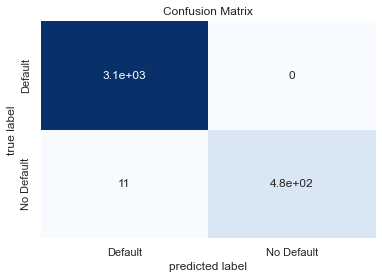


Recall Score
 0.9775967413441955

Precision Score
 1.0

F1 Score
 0.9886714727085478
Validation Acuracy Scores :
Accuracy:  0.9730941704035875


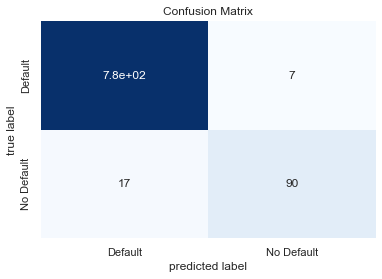


Recall Score
 0.8411214953271028

Precision Score
 0.9278350515463918

F1 Score
 0.8823529411764706


Dataset  \
0                                Stemmed TF Vectors   
1                                Stemmed TF Vectors   
2                                Stemmed TF Vectors   
3                                Stemmed TF Vectors   
4                                Stemmed TF Vectors   
5                                Stemmed TF Vectors   
6                                Stemmed TF Vectors   
7                                Stemmed TF Vectors   
8                             Stemmed TFIDF Vectors   
9                             Stemmed TFIDF Vectors   
10                            Stemmed TFIDF Vectors   
11                            Stemmed TFIDF Vectors   
12                            Stemmed TFIDF Vectors   
13                            Stemmed TFIDF Vectors   
14                            Stemmed TFIDF Vectors   
15                            Stemmed TFIDF Vectors   
16                       Stemmed Doc2Vec embeddings   
17                       Stemmed Doc2Vec embeddings   
18                       Stemmed Doc2Vec embeddings   
19                       Stemmed Doc2Vec embeddings   
20                       Stemmed Doc2Vec embeddings   
21                       Stemmed Doc2Vec embeddings   
22                       Stemmed Doc2Vec embeddings   
23                       Stemmed Doc2Vec embeddings   
24  Stemmed Doc2Vec embeddings + Heuristic features   
25  Stemmed Doc2Vec embeddings + Heuristic features   
26  Stemmed Doc2Vec embeddings + Heuristic features   
27  Stemmed Doc2Vec embeddings + Heuristic features   
28  Stemmed Doc2Vec embeddings + Heuristic features   
29  Stemmed Doc2Vec embeddings + Heuristic features   

                            Model  Accuracy Precision    Recall  F1-Score  
0          DecisionTreeClassifier  0.955157  0.859649  0.803279  0.830508  
1             Logistic Regression  0.980942  0.990654  0.868852  0.925764  
2                   Random Forest  0.966368       1.0   0.76378  0.866071  
3           Bagging Random Forest  0.956278       1.0  0.692913  0.818605  
4              Adaoost Classifier  0.979821       1.0  0.858268  0.923729  
5   Gradeient Boosting Classifier  0.951794  0.988372  0.669291  0.798122  
6                  KNN Classifier  0.887892       1.0  0.212598  0.350649  
7                  SVM Classifier  0.970852       1.0  0.795276  0.885965  
8          DecisionTreeClassifier  0.942825  0.840708  0.742188  0.788382  
9             Logistic Regression  0.929372  0.986842  0.547445  0.704225  
10                  Random Forest  0.974215       1.0  0.776699  0.874317  
11          Bagging Random Forest  0.970852       1.0  0.747573  0.855556  
12            Adaboost Classifier  0.969731  0.913043  0.815534  0.861538  
13  Gradeient Boosting Classifier  0.956278  0.932432  0.669903  0.779661  
14                 KNN Classifier  0.903587       1.0  0.165049  0.283333  
15                 SVM Classifier  0.970852  0.975309   0.76699  0.858696  
16         DecisionTreeClassifier  0.940583  0.789474  0.756303  0.772532  
17            Logistic Regression  0.974215  0.922414  0.884298  0.902954  
18                  Random Forest  0.954036   0.95098  0.729323  0.825532  
19          Bagging Random Forest  0.954036   0.95098  0.729323  0.825532  
20            Adaboost Classifier  0.961883  0.883721  0.857143  0.870229  
21  Gradeient Boosting Classifier   0.95852  0.921053  0.789474  0.850202  
22                 KNN Classifier  0.955157  0.951456  0.736842  0.830508  
23                 SVM Classifier  0.956278  0.927273  0.766917  0.839506  
24         DecisionTreeClassifier  0.957399  0.868852  0.828125     0.848  
25            Logistic Regression  0.969731  0.889908  0.866071  0.877828  
26                  Random Forest  0.974215  0.977273  0.803738  0.882051  
27          Bagging Random Forest  0.971973  0.965909  0.794393  0.871795  
28            Adaboost Classifier    0.9787      0.94  0.878505  0.908213  
29  Gradeient Boosting Classifier  0.973094  0.927835  0.8

In [224]:
Dataset="Stemmed Doc2Vec embeddings + Heuristic features"
Model="Gradeient Boosting Classifier"
model=GradientBoostingClassifier()
model.fit(X_train,y_train)
y_pred_train=model.predict(X_train)
y_pred_valid=model.predict(X_valid)
print("Training Acuracy Scores :")
accuracy_scores(y_train,y_pred_train)
print("Validation Acuracy Scores :")
accuracy_scores(y_valid,y_pred_valid)
results.loc[len(results),]=[Dataset,Model,accuracy_score(y_valid,y_pred_valid),precision_score(y_valid,y_pred_valid),recall_score(y_valid,y_pred_valid),f1_score(y_valid,y_pred_valid)]
results

Training Acuracy Scores :
Accuracy:  0.9688639551192146


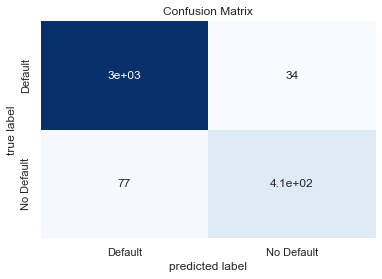


Recall Score
 0.8431771894093686

Precision Score
 0.9241071428571429

F1 Score
 0.8817891373801917
Validation Acuracy Scores :
Accuracy:  0.9551569506726457


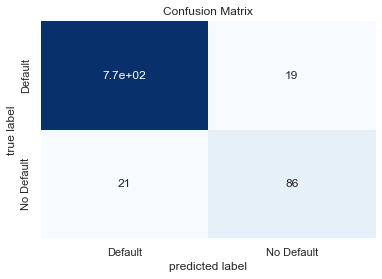


Recall Score
 0.8037383177570093

Precision Score
 0.819047619047619

F1 Score
 0.8113207547169811


Dataset  \
0                                Stemmed TF Vectors   
1                                Stemmed TF Vectors   
2                                Stemmed TF Vectors   
3                                Stemmed TF Vectors   
4                                Stemmed TF Vectors   
5                                Stemmed TF Vectors   
6                                Stemmed TF Vectors   
7                                Stemmed TF Vectors   
8                             Stemmed TFIDF Vectors   
9                             Stemmed TFIDF Vectors   
10                            Stemmed TFIDF Vectors   
11                            Stemmed TFIDF Vectors   
12                            Stemmed TFIDF Vectors   
13                            Stemmed TFIDF Vectors   
14                            Stemmed TFIDF Vectors   
15                            Stemmed TFIDF Vectors   
16                       Stemmed Doc2Vec embeddings   
17                       Stemmed Doc2Vec embeddings   
18                       Stemmed Doc2Vec embeddings   
19                       Stemmed Doc2Vec embeddings   
20                       Stemmed Doc2Vec embeddings   
21                       Stemmed Doc2Vec embeddings   
22                       Stemmed Doc2Vec embeddings   
23                       Stemmed Doc2Vec embeddings   
24  Stemmed Doc2Vec embeddings + Heuristic features   
25  Stemmed Doc2Vec embeddings + Heuristic features   
26  Stemmed Doc2Vec embeddings + Heuristic features   
27  Stemmed Doc2Vec embeddings + Heuristic features   
28  Stemmed Doc2Vec embeddings + Heuristic features   
29  Stemmed Doc2Vec embeddings + Heuristic features   
30  Stemmed Doc2Vec embeddings + Heuristic features   

                            Model  Accuracy Precision    Recall  F1-Score  
0          DecisionTreeClassifier  0.955157  0.859649  0.803279  0.830508  
1             Logistic Regression  0.980942  0.990654  0.868852  0.925764  
2                   Random Forest  0.966368       1.0   0.76378  0.866071  
3           Bagging Random Forest  0.956278       1.0  0.692913  0.818605  
4              Adaoost Classifier  0.979821       1.0  0.858268  0.923729  
5   Gradeient Boosting Classifier  0.951794  0.988372  0.669291  0.798122  
6                  KNN Classifier  0.887892       1.0  0.212598  0.350649  
7                  SVM Classifier  0.970852       1.0  0.795276  0.885965  
8          DecisionTreeClassifier  0.942825  0.840708  0.742188  0.788382  
9             Logistic Regression  0.929372  0.986842  0.547445  0.704225  
10                  Random Forest  0.974215       1.0  0.776699  0.874317  
11          Bagging Random Forest  0.970852       1.0  0.747573  0.855556  
12            Adaboost Classifier  0.969731  0.913043  0.815534  0.861538  
13  Gradeient Boosting Classifier  0.956278  0.932432  0.669903  0.779661  
14                 KNN Classifier  0.903587       1.0  0.165049  0.283333  
15                 SVM Classifier  0.970852  0.975309   0.76699  0.858696  
16         DecisionTreeClassifier  0.940583  0.789474  0.756303  0.772532  
17            Logistic Regression  0.974215  0.922414  0.884298  0.902954  
18                  Random Forest  0.954036   0.95098  0.729323  0.825532  
19          Bagging Random Forest  0.954036   0.95098  0.729323  0.825532  
20            Adaboost Classifier  0.961883  0.883721  0.857143  0.870229  
21  Gradeient Boosting Classifier   0.95852  0.921053  0.789474  0.850202  
22                 KNN Classifier  0.955157  0.951456  0.736842  0.830508  
23                 SVM Classifier  0.956278  0.927273  0.766917  0.839506  
24         DecisionTreeClassifier  0.957399  0.868852  0.828125     0.848  
25            Logistic Regression  0.969731  0.889908  0.866071  0.877828  
26                  Random Forest  0.974215  0.977273  0.803738  0.882051  
27          Bagging Random Forest  0.971973  0.965909  0.794393  0.871795  
28            Adaboost Classifier    0.9787      0.94  0.878505  0.908213  
29 

In [225]:
Dataset="Stemmed Doc2Vec embeddings + Heuristic features"
Model="KNN Classifier"
model=KNeighborsClassifier()
model.fit(X_train,y_train)
y_pred_train=model.predict(X_train)
y_pred_valid=model.predict(X_valid)
print("Training Acuracy Scores :")
accuracy_scores(y_train,y_pred_train)
print("Validation Acuracy Scores :")
accuracy_scores(y_valid,y_pred_valid)
results.loc[len(results),]=[Dataset,Model,accuracy_score(y_valid,y_pred_valid),precision_score(y_valid,y_pred_valid),recall_score(y_valid,y_pred_valid),f1_score(y_valid,y_pred_valid)]
results

Training Acuracy Scores :
Accuracy:  0.9727910238429173


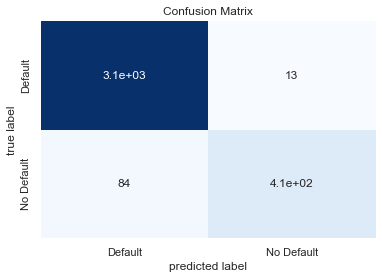


Recall Score
 0.8289205702647657

Precision Score
 0.969047619047619

F1 Score
 0.8935236004390779
Validation Acuracy Scores :
Accuracy:  0.9697309417040358


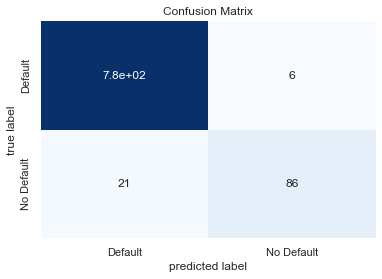


Recall Score
 0.8037383177570093

Precision Score
 0.9347826086956522

F1 Score
 0.864321608040201


Dataset  \
0                                Stemmed TF Vectors   
1                                Stemmed TF Vectors   
2                                Stemmed TF Vectors   
3                                Stemmed TF Vectors   
4                                Stemmed TF Vectors   
5                                Stemmed TF Vectors   
6                                Stemmed TF Vectors   
7                                Stemmed TF Vectors   
8                             Stemmed TFIDF Vectors   
9                             Stemmed TFIDF Vectors   
10                            Stemmed TFIDF Vectors   
11                            Stemmed TFIDF Vectors   
12                            Stemmed TFIDF Vectors   
13                            Stemmed TFIDF Vectors   
14                            Stemmed TFIDF Vectors   
15                            Stemmed TFIDF Vectors   
16                       Stemmed Doc2Vec embeddings   
17                       Stemmed Doc2Vec embeddings   
18                       Stemmed Doc2Vec embeddings   
19                       Stemmed Doc2Vec embeddings   
20                       Stemmed Doc2Vec embeddings   
21                       Stemmed Doc2Vec embeddings   
22                       Stemmed Doc2Vec embeddings   
23                       Stemmed Doc2Vec embeddings   
24  Stemmed Doc2Vec embeddings + Heuristic features   
25  Stemmed Doc2Vec embeddings + Heuristic features   
26  Stemmed Doc2Vec embeddings + Heuristic features   
27  Stemmed Doc2Vec embeddings + Heuristic features   
28  Stemmed Doc2Vec embeddings + Heuristic features   
29  Stemmed Doc2Vec embeddings + Heuristic features   
30  Stemmed Doc2Vec embeddings + Heuristic features   
31  Stemmed Doc2Vec embeddings + Heuristic features   

                            Model  Accuracy Precision    Recall  F1-Score  
0          DecisionTreeClassifier  0.955157  0.859649  0.803279  0.830508  
1             Logistic Regression  0.980942  0.990654  0.868852  0.925764  
2                   Random Forest  0.966368       1.0   0.76378  0.866071  
3           Bagging Random Forest  0.956278       1.0  0.692913  0.818605  
4              Adaoost Classifier  0.979821       1.0  0.858268  0.923729  
5   Gradeient Boosting Classifier  0.951794  0.988372  0.669291  0.798122  
6                  KNN Classifier  0.887892       1.0  0.212598  0.350649  
7                  SVM Classifier  0.970852       1.0  0.795276  0.885965  
8          DecisionTreeClassifier  0.942825  0.840708  0.742188  0.788382  
9             Logistic Regression  0.929372  0.986842  0.547445  0.704225  
10                  Random Forest  0.974215       1.0  0.776699  0.874317  
11          Bagging Random Forest  0.970852       1.0  0.747573  0.855556  
12            Adaboost Classifier  0.969731  0.913043  0.815534  0.861538  
13  Gradeient Boosting Classifier  0.956278  0.932432  0.669903  0.779661  
14                 KNN Classifier  0.903587       1.0  0.165049  0.283333  
15                 SVM Classifier  0.970852  0.975309   0.76699  0.858696  
16         DecisionTreeClassifier  0.940583  0.789474  0.756303  0.772532  
17            Logistic Regression  0.974215  0.922414  0.884298  0.902954  
18                  Random Forest  0.954036   0.95098  0.729323  0.825532  
19          Bagging Random Forest  0.954036   0.95098  0.729323  0.825532  
20            Adaboost Classifier  0.961883  0.883721  0.857143  0.870229  
21  Gradeient Boosting Classifier   0.95852  0.921053  0.789474  0.850202  
22                 KNN Classifier  0.955157  0.951456  0.736842  0.830508  
23                 SVM Classifier  0.956278  0.927273  0.766917  0.839506  
24         DecisionTreeClassifier  0.957399  0.868852  0.828125     0.848  
25            Logistic Regression  0.969731  0.889908  0.866071  0.877828  
26                  Random Forest  0.974215  0.977273  0.803738  0.882051  
27          Bagging Random Forest  0.971973  0.965909  0.794393  0.871795  
28            Adaboost C

In [226]:
Dataset="Stemmed Doc2Vec embeddings + Heuristic features"
Model="SVM Classifier"
model=SVC()
model.fit(X_train,y_train)
y_pred_train=model.predict(X_train)
y_pred_valid=model.predict(X_valid)
print("Training Acuracy Scores :")
accuracy_scores(y_train,y_pred_train)
print("Validation Acuracy Scores :")
accuracy_scores(y_valid,y_pred_valid)
results.loc[len(results),]=[Dataset,Model,accuracy_score(y_valid,y_pred_valid),precision_score(y_valid,y_pred_valid),recall_score(y_valid,y_pred_valid),f1_score(y_valid,y_pred_valid)]
results

In [227]:
results.to_csv("results.csv",index=False)

In [228]:
results

Dataset  \
0                                Stemmed TF Vectors   
1                                Stemmed TF Vectors   
2                                Stemmed TF Vectors   
3                                Stemmed TF Vectors   
4                                Stemmed TF Vectors   
5                                Stemmed TF Vectors   
6                                Stemmed TF Vectors   
7                                Stemmed TF Vectors   
8                             Stemmed TFIDF Vectors   
9                             Stemmed TFIDF Vectors   
10                            Stemmed TFIDF Vectors   
11                            Stemmed TFIDF Vectors   
12                            Stemmed TFIDF Vectors   
13                            Stemmed TFIDF Vectors   
14                            Stemmed TFIDF Vectors   
15                            Stemmed TFIDF Vectors   
16                       Stemmed Doc2Vec embeddings   
17                       Stemmed Doc2Vec embeddings   
18                       Stemmed Doc2Vec embeddings   
19                       Stemmed Doc2Vec embeddings   
20                       Stemmed Doc2Vec embeddings   
21                       Stemmed Doc2Vec embeddings   
22                       Stemmed Doc2Vec embeddings   
23                       Stemmed Doc2Vec embeddings   
24  Stemmed Doc2Vec embeddings + Heuristic features   
25  Stemmed Doc2Vec embeddings + Heuristic features   
26  Stemmed Doc2Vec embeddings + Heuristic features   
27  Stemmed Doc2Vec embeddings + Heuristic features   
28  Stemmed Doc2Vec embeddings + Heuristic features   
29  Stemmed Doc2Vec embeddings + Heuristic features   
30  Stemmed Doc2Vec embeddings + Heuristic features   
31  Stemmed Doc2Vec embeddings + Heuristic features   

                            Model  Accuracy Precision    Recall  F1-Score  
0          DecisionTreeClassifier  0.955157  0.859649  0.803279  0.830508  
1             Logistic Regression  0.980942  0.990654  0.868852  0.925764  
2                   Random Forest  0.966368       1.0   0.76378  0.866071  
3           Bagging Random Forest  0.956278       1.0  0.692913  0.818605  
4              Adaoost Classifier  0.979821       1.0  0.858268  0.923729  
5   Gradeient Boosting Classifier  0.951794  0.988372  0.669291  0.798122  
6                  KNN Classifier  0.887892       1.0  0.212598  0.350649  
7                  SVM Classifier  0.970852       1.0  0.795276  0.885965  
8          DecisionTreeClassifier  0.942825  0.840708  0.742188  0.788382  
9             Logistic Regression  0.929372  0.986842  0.547445  0.704225  
10                  Random Forest  0.974215       1.0  0.776699  0.874317  
11          Bagging Random Forest  0.970852       1.0  0.747573  0.855556  
12            Adaboost Classifier  0.969731  0.913043  0.815534  0.861538  
13  Gradeient Boosting Classifier  0.956278  0.932432  0.669903  0.779661  
14                 KNN Classifier  0.903587       1.0  0.165049  0.283333  
15                 SVM Classifier  0.970852  0.975309   0.76699  0.858696  
16         DecisionTreeClassifier  0.940583  0.789474  0.756303  0.772532  
17            Logistic Regression  0.974215  0.922414  0.884298  0.902954  
18                  Random Forest  0.954036   0.95098  0.729323  0.825532  
19          Bagging Random Forest  0.954036   0.95098  0.729323  0.825532  
20            Adaboost Classifier  0.961883  0.883721  0.857143  0.870229  
21  Gradeient Boosting Classifier   0.95852  0.921053  0.789474  0.850202  
22                 KNN Classifier  0.955157  0.951456  0.736842  0.830508  
23                 SVM Classifier  0.956278  0.927273  0.766917  0.839506  
24         DecisionTreeClassifier  0.957399  0.868852  0.828125     0.848  
25            Logistic Regression  0.969731  0.889908  0.866071  0.877828  
26                  Random Forest  0.974215  0.977273  0.803738  0.882051  
27          Bagging Random Forest  0.971973  0.965909  0.794393  0.871795  
28            Adaboost C

## Models on Heuristic Features

In [238]:
X=hurestic_features
Y=df.Labels

In [239]:
X

FirstWord_upper Phone_num suspicious_words percent_stopWords  \
0                  0         0                0              20.0   
1                  0         0                0               0.0   
2                  0         1                0         17.857143   
3                  1         0                0         18.181818   
4                  0         0                0         38.461538   
...              ...       ...              ...               ...   
5567               0         1                1         26.666667   
5568               0         0                0              12.5   
5569               0         0                0              40.0   
5570               0         0                0         38.461538   
5571               0         0                0         33.333333   

     Length_of_SMS  
0               20  
1                6  
2               28  
3               11  
4               13  
...            ...  
5567            30  
5568             8  
5569            10  
5570            26  
5571             6  

[5572 rows x 5 columns]

In [240]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
X_train,X_valid,y_train,y_valid=train_test_split(X_train,y_train,test_size=0.2)

Training Acuracy Scores :
Accuracy:  0.9722300140252454


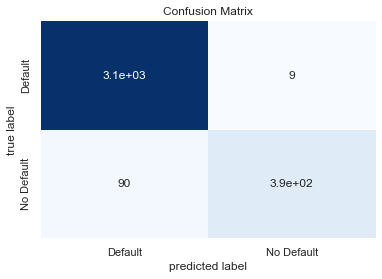


Recall Score
 0.8109243697478992

Precision Score
 0.9772151898734177

F1 Score
 0.8863375430539608
Validation Acuracy Scores :
Accuracy:  0.945067264573991


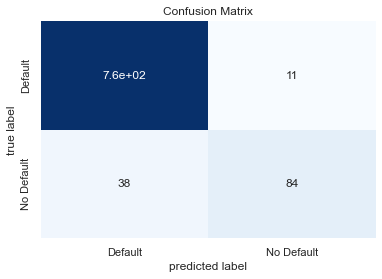


Recall Score
 0.6885245901639344

Precision Score
 0.8842105263157894

F1 Score
 0.7741935483870968


In [241]:
Dataset="Heuristic Features"
Model="DecisionTreeClassifier"
tree=DecisionTreeClassifier(criterion='entropy')
tree.fit(X_train,y_train)
y_pred_train=tree.predict(X_train)
y_pred_valid=tree.predict(X_valid)
print("Training Acuracy Scores :")
accuracy_scores(y_train,y_pred_train)
print("Validation Acuracy Scores :")
accuracy_scores(y_valid,y_pred_valid)
results.loc[len(results),]=[Dataset,Model,accuracy_score(y_valid,y_pred_valid),precision_score(y_valid,y_pred_valid),recall_score(y_valid,y_pred_valid),f1_score(y_valid,y_pred_valid)]

In [242]:
# results.loc[len(results),:]=[Dataset,Model,accuracy_score(y_valid,y_pred_valid),precision_score(y_valid,y_pred_valid),recall_score(y_valid,y_pred_valid),f1_score(y_valid,y_pred_valid)]
results

Dataset  \
0                                Stemmed TF Vectors   
1                                Stemmed TF Vectors   
2                                Stemmed TF Vectors   
3                                Stemmed TF Vectors   
4                                Stemmed TF Vectors   
5                                Stemmed TF Vectors   
6                                Stemmed TF Vectors   
7                                Stemmed TF Vectors   
8                             Stemmed TFIDF Vectors   
9                             Stemmed TFIDF Vectors   
10                            Stemmed TFIDF Vectors   
11                            Stemmed TFIDF Vectors   
12                            Stemmed TFIDF Vectors   
13                            Stemmed TFIDF Vectors   
14                            Stemmed TFIDF Vectors   
15                            Stemmed TFIDF Vectors   
16                       Stemmed Doc2Vec embeddings   
17                       Stemmed Doc2Vec embeddings   
18                       Stemmed Doc2Vec embeddings   
19                       Stemmed Doc2Vec embeddings   
20                       Stemmed Doc2Vec embeddings   
21                       Stemmed Doc2Vec embeddings   
22                       Stemmed Doc2Vec embeddings   
23                       Stemmed Doc2Vec embeddings   
24  Stemmed Doc2Vec embeddings + Heuristic features   
25  Stemmed Doc2Vec embeddings + Heuristic features   
26  Stemmed Doc2Vec embeddings + Heuristic features   
27  Stemmed Doc2Vec embeddings + Heuristic features   
28  Stemmed Doc2Vec embeddings + Heuristic features   
29  Stemmed Doc2Vec embeddings + Heuristic features   
30  Stemmed Doc2Vec embeddings + Heuristic features   
31  Stemmed Doc2Vec embeddings + Heuristic features   
32                               Heuristic Features   
33                               Heuristic Features   

                            Model  Accuracy Precision    Recall  F1-Score  
0          DecisionTreeClassifier  0.955157  0.859649  0.803279  0.830508  
1             Logistic Regression  0.980942  0.990654  0.868852  0.925764  
2                   Random Forest  0.966368       1.0   0.76378  0.866071  
3           Bagging Random Forest  0.956278       1.0  0.692913  0.818605  
4              Adaoost Classifier  0.979821       1.0  0.858268  0.923729  
5   Gradeient Boosting Classifier  0.951794  0.988372  0.669291  0.798122  
6                  KNN Classifier  0.887892       1.0  0.212598  0.350649  
7                  SVM Classifier  0.970852       1.0  0.795276  0.885965  
8          DecisionTreeClassifier  0.942825  0.840708  0.742188  0.788382  
9             Logistic Regression  0.929372  0.986842  0.547445  0.704225  
10                  Random Forest  0.974215       1.0  0.776699  0.874317  
11          Bagging Random Forest  0.970852       1.0  0.747573  0.855556  
12            Adaboost Classifier  0.969731  0.913043  0.815534  0.861538  
13  Gradeient Boosting Classifier  0.956278  0.932432  0.669903  0.779661  
14                 KNN Classifier  0.903587       1.0  0.165049  0.283333  
15                 SVM Classifier  0.970852  0.975309   0.76699  0.858696  
16         DecisionTreeClassifier  0.940583  0.789474  0.756303  0.772532  
17            Logistic Regression  0.974215  0.922414  0.884298  0.902954  
18                  Random Forest  0.954036   0.95098  0.729323  0.825532  
19          Bagging Random Forest  0.954036   0.95098  0.729323  0.825532  
20            Adaboost Classifier  0.961883  0.883721  0.857143  0.870229  
21  Gradeient Boosting Classifier   0.95852  0.921053  0.789474  0.850202  
22                 KNN Classifier  0.955157  0.951456  0.736842  0.830508  
23                 SVM Classifier  0.956278  0.927273  0.766917  0.839506  
24         DecisionTreeClassifier  0.957399  0.868852  0.828125     0.848  
25            Logistic Regression  0.969731  0.889908  0.866071  0.877828  
26                  Random Forest  0.974215  0.977273  0.803738  0

In [243]:
# Logistic Regression

In [244]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
X_train,X_valid,y_train,y_valid=train_test_split(X_train,y_train,test_size=0.2)

Training Acuracy Scores :
Accuracy:  0.9523141654978962


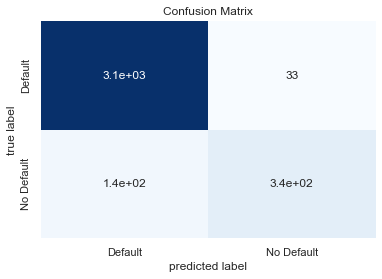


Recall Score
 0.7133891213389121

Precision Score
 0.9117647058823529

F1 Score
 0.8004694835680751
Validation Acuracy Scores :
Accuracy:  0.9473094170403588


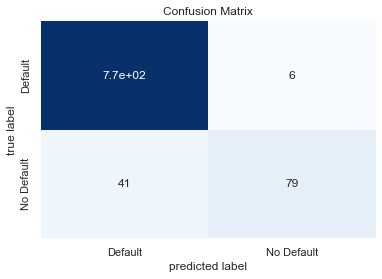


Recall Score
 0.6583333333333333

Precision Score
 0.9294117647058824

F1 Score
 0.7707317073170731


In [245]:
Dataset="Heuristic Features"
Model="Logistic Regression"
logit=LogisticRegression()
logit.fit(X_train,y_train)
y_pred_train=logit.predict(X_train)
y_pred_valid=logit.predict(X_valid)
print("Training Acuracy Scores :")
accuracy_scores(y_train,y_pred_train)
print("Validation Acuracy Scores :")
accuracy_scores(y_valid,y_pred_valid)
results.loc[len(results),]=[Dataset,Model,accuracy_score(y_valid,y_pred_valid),precision_score(y_valid,y_pred_valid),recall_score(y_valid,y_pred_valid),f1_score(y_valid,y_pred_valid)]

In [246]:
results

Dataset  \
0                                Stemmed TF Vectors   
1                                Stemmed TF Vectors   
2                                Stemmed TF Vectors   
3                                Stemmed TF Vectors   
4                                Stemmed TF Vectors   
5                                Stemmed TF Vectors   
6                                Stemmed TF Vectors   
7                                Stemmed TF Vectors   
8                             Stemmed TFIDF Vectors   
9                             Stemmed TFIDF Vectors   
10                            Stemmed TFIDF Vectors   
11                            Stemmed TFIDF Vectors   
12                            Stemmed TFIDF Vectors   
13                            Stemmed TFIDF Vectors   
14                            Stemmed TFIDF Vectors   
15                            Stemmed TFIDF Vectors   
16                       Stemmed Doc2Vec embeddings   
17                       Stemmed Doc2Vec embeddings   
18                       Stemmed Doc2Vec embeddings   
19                       Stemmed Doc2Vec embeddings   
20                       Stemmed Doc2Vec embeddings   
21                       Stemmed Doc2Vec embeddings   
22                       Stemmed Doc2Vec embeddings   
23                       Stemmed Doc2Vec embeddings   
24  Stemmed Doc2Vec embeddings + Heuristic features   
25  Stemmed Doc2Vec embeddings + Heuristic features   
26  Stemmed Doc2Vec embeddings + Heuristic features   
27  Stemmed Doc2Vec embeddings + Heuristic features   
28  Stemmed Doc2Vec embeddings + Heuristic features   
29  Stemmed Doc2Vec embeddings + Heuristic features   
30  Stemmed Doc2Vec embeddings + Heuristic features   
31  Stemmed Doc2Vec embeddings + Heuristic features   
32                               Heuristic Features   
33                               Heuristic Features   
34                               Heuristic Features   

                            Model  Accuracy Precision    Recall  F1-Score  
0          DecisionTreeClassifier  0.955157  0.859649  0.803279  0.830508  
1             Logistic Regression  0.980942  0.990654  0.868852  0.925764  
2                   Random Forest  0.966368       1.0   0.76378  0.866071  
3           Bagging Random Forest  0.956278       1.0  0.692913  0.818605  
4              Adaoost Classifier  0.979821       1.0  0.858268  0.923729  
5   Gradeient Boosting Classifier  0.951794  0.988372  0.669291  0.798122  
6                  KNN Classifier  0.887892       1.0  0.212598  0.350649  
7                  SVM Classifier  0.970852       1.0  0.795276  0.885965  
8          DecisionTreeClassifier  0.942825  0.840708  0.742188  0.788382  
9             Logistic Regression  0.929372  0.986842  0.547445  0.704225  
10                  Random Forest  0.974215       1.0  0.776699  0.874317  
11          Bagging Random Forest  0.970852       1.0  0.747573  0.855556  
12            Adaboost Classifier  0.969731  0.913043  0.815534  0.861538  
13  Gradeient Boosting Classifier  0.956278  0.932432  0.669903  0.779661  
14                 KNN Classifier  0.903587       1.0  0.165049  0.283333  
15                 SVM Classifier  0.970852  0.975309   0.76699  0.858696  
16         DecisionTreeClassifier  0.940583  0.789474  0.756303  0.772532  
17            Logistic Regression  0.974215  0.922414  0.884298  0.902954  
18                  Random Forest  0.954036   0.95098  0.729323  0.825532  
19          Bagging Random Forest  0.954036   0.95098  0.729323  0.825532  
20            Adaboost Classifier  0.961883  0.883721  0.857143  0.870229  
21  Gradeient Boosting Classifier   0.95852  0.921053  0.789474  0.850202  
22                 KNN Classifier  0.955157  0.951456  0.736842  0.830508  
23                 SVM Classifier  0.956278  0.927273  0.766917  0.839506  
24         DecisionTreeClassifier  0.957399  0.868852  0.828125     0.848  
25            Logistic Regression  0.969731  0.889908  0.866071  0.877828  
26         

In [247]:
# Random Forest

In [248]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
X_train,X_valid,y_train,y_valid=train_test_split(X_train,y_train,test_size=0.2)

Training Acuracy Scores :
Accuracy:  0.9685834502103787


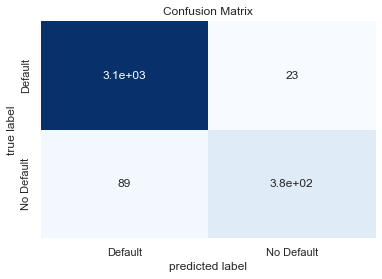


Recall Score
 0.8114406779661016

Precision Score
 0.9433497536945813

F1 Score
 0.8724373576309794
Validation Acuracy Scores :
Accuracy:  0.9618834080717489


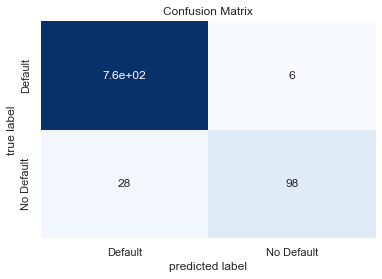


Recall Score
 0.7777777777777778

Precision Score
 0.9423076923076923

F1 Score
 0.8521739130434781


In [249]:
Dataset="Heuristic Features"
Model="Random Forest"
model=RandomForestClassifier()
model.fit(X_train,y_train)
y_pred_train=model.predict(X_train)
y_pred_valid=model.predict(X_valid)
print("Training Acuracy Scores :")
accuracy_scores(y_train,y_pred_train)
print("Validation Acuracy Scores :")
accuracy_scores(y_valid,y_pred_valid)
results.loc[len(results),]=[Dataset,Model,accuracy_score(y_valid,y_pred_valid),precision_score(y_valid,y_pred_valid),recall_score(y_valid,y_pred_valid),f1_score(y_valid,y_pred_valid)]

In [250]:
# Bagging with Random Forest

Training Acuracy Scores :
Accuracy:  0.9666199158485274


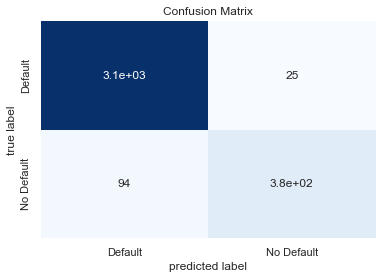


Recall Score
 0.8008474576271186

Precision Score
 0.9379652605459057

F1 Score
 0.8639999999999999
Validation Acuracy Scores :
Accuracy:  0.9652466367713004


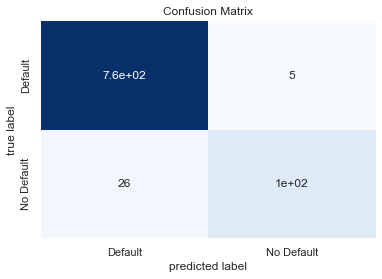


Recall Score
 0.7936507936507936

Precision Score
 0.9523809523809523

F1 Score
 0.8658008658008657


In [251]:
Dataset="Heuristic Features"
Model="Bagging Random Forest"
model=BaggingClassifier(RandomForestClassifier())
model.fit(X_train,y_train)
y_pred_train=model.predict(X_train)
y_pred_valid=model.predict(X_valid)
print("Training Acuracy Scores :")
accuracy_scores(y_train,y_pred_train)
print("Validation Acuracy Scores :")
accuracy_scores(y_valid,y_pred_valid)
results.loc[len(results),]=[Dataset,Model,accuracy_score(y_valid,y_pred_valid),precision_score(y_valid,y_pred_valid),recall_score(y_valid,y_pred_valid),f1_score(y_valid,y_pred_valid)]

In [252]:
# Adaboost Classifier

Training Acuracy Scores :
Accuracy:  0.9542776998597475


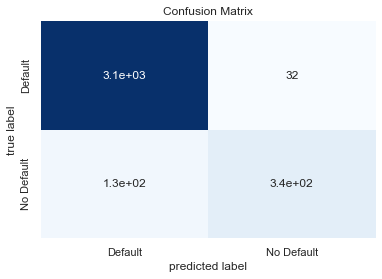


Recall Score
 0.722457627118644

Precision Score
 0.9142091152815014

F1 Score
 0.8071005917159764
Validation Acuracy Scores :
Accuracy:  0.9562780269058296


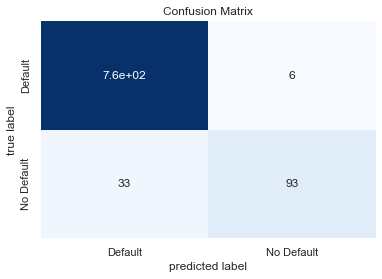


Recall Score
 0.7380952380952381

Precision Score
 0.9393939393939394

F1 Score
 0.8266666666666667


In [253]:
Dataset="Heuristic Features"
Model="Adaboost Classifier"
model=AdaBoostClassifier(n_estimators=500)
model.fit(X_train,y_train)
y_pred_train=model.predict(X_train)
y_pred_valid=model.predict(X_valid)
print("Training Acuracy Scores :")
accuracy_scores(y_train,y_pred_train)
print("Validation Acuracy Scores :")
accuracy_scores(y_valid,y_pred_valid)
results.loc[len(results),]=[Dataset,Model,accuracy_score(y_valid,y_pred_valid),precision_score(y_valid,y_pred_valid),recall_score(y_valid,y_pred_valid),f1_score(y_valid,y_pred_valid)]

In [254]:
results

Dataset  \
0                                Stemmed TF Vectors   
1                                Stemmed TF Vectors   
2                                Stemmed TF Vectors   
3                                Stemmed TF Vectors   
4                                Stemmed TF Vectors   
5                                Stemmed TF Vectors   
6                                Stemmed TF Vectors   
7                                Stemmed TF Vectors   
8                             Stemmed TFIDF Vectors   
9                             Stemmed TFIDF Vectors   
10                            Stemmed TFIDF Vectors   
11                            Stemmed TFIDF Vectors   
12                            Stemmed TFIDF Vectors   
13                            Stemmed TFIDF Vectors   
14                            Stemmed TFIDF Vectors   
15                            Stemmed TFIDF Vectors   
16                       Stemmed Doc2Vec embeddings   
17                       Stemmed Doc2Vec embeddings   
18                       Stemmed Doc2Vec embeddings   
19                       Stemmed Doc2Vec embeddings   
20                       Stemmed Doc2Vec embeddings   
21                       Stemmed Doc2Vec embeddings   
22                       Stemmed Doc2Vec embeddings   
23                       Stemmed Doc2Vec embeddings   
24  Stemmed Doc2Vec embeddings + Heuristic features   
25  Stemmed Doc2Vec embeddings + Heuristic features   
26  Stemmed Doc2Vec embeddings + Heuristic features   
27  Stemmed Doc2Vec embeddings + Heuristic features   
28  Stemmed Doc2Vec embeddings + Heuristic features   
29  Stemmed Doc2Vec embeddings + Heuristic features   
30  Stemmed Doc2Vec embeddings + Heuristic features   
31  Stemmed Doc2Vec embeddings + Heuristic features   
32                               Heuristic Features   
33                               Heuristic Features   
34                               Heuristic Features   
35                               Heuristic Features   
36                               Heuristic Features   
37                               Heuristic Features   

                            Model  Accuracy Precision    Recall  F1-Score  
0          DecisionTreeClassifier  0.955157  0.859649  0.803279  0.830508  
1             Logistic Regression  0.980942  0.990654  0.868852  0.925764  
2                   Random Forest  0.966368       1.0   0.76378  0.866071  
3           Bagging Random Forest  0.956278       1.0  0.692913  0.818605  
4              Adaoost Classifier  0.979821       1.0  0.858268  0.923729  
5   Gradeient Boosting Classifier  0.951794  0.988372  0.669291  0.798122  
6                  KNN Classifier  0.887892       1.0  0.212598  0.350649  
7                  SVM Classifier  0.970852       1.0  0.795276  0.885965  
8          DecisionTreeClassifier  0.942825  0.840708  0.742188  0.788382  
9             Logistic Regression  0.929372  0.986842  0.547445  0.704225  
10                  Random Forest  0.974215       1.0  0.776699  0.874317  
11          Bagging Random Forest  0.970852       1.0  0.747573  0.855556  
12            Adaboost Classifier  0.969731  0.913043  0.815534  0.861538  
13  Gradeient Boosting Classifier  0.956278  0.932432  0.669903  0.779661  
14                 KNN Classifier  0.903587       1.0  0.165049  0.283333  
15                 SVM Classifier  0.970852  0.975309   0.76699  0.858696  
16         DecisionTreeClassifier  0.940583  0.789474  0.756303  0.772532  
17            Logistic Regression  0.974215  0.922414  0.884298  0.902954  
18                  Random Forest  0.954036   0.95098  0.729323  0.825532  
19          Bagging Random Forest  0.954036   0.95098  0.729323  0.825532  
20            Adaboost Classifier  0.961883  0.883721  0.857143  0.870229  
21  Gradeient Boosting Classifier   0.95852  0.921053  0.789474  0.850202  
22                 KNN Classifier  0.955157  0.951456  0.736842  0.830508  
23                 SVM Classifier  0.956278  0.927273  0.766917  0.839506 

In [255]:
#Gradeient Boosting

Training Acuracy Scores :
Accuracy:  0.9590462833099579


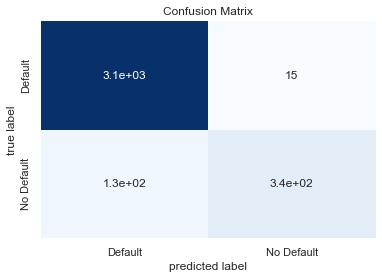


Recall Score
 0.722457627118644

Precision Score
 0.9578651685393258

F1 Score
 0.8236714975845411
Validation Acuracy Scores :
Accuracy:  0.9641255605381166


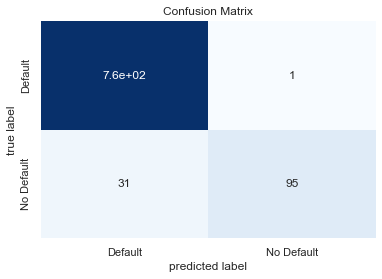


Recall Score
 0.753968253968254

Precision Score
 0.9895833333333334

F1 Score
 0.8558558558558558


Dataset  \
0                                Stemmed TF Vectors   
1                                Stemmed TF Vectors   
2                                Stemmed TF Vectors   
3                                Stemmed TF Vectors   
4                                Stemmed TF Vectors   
5                                Stemmed TF Vectors   
6                                Stemmed TF Vectors   
7                                Stemmed TF Vectors   
8                             Stemmed TFIDF Vectors   
9                             Stemmed TFIDF Vectors   
10                            Stemmed TFIDF Vectors   
11                            Stemmed TFIDF Vectors   
12                            Stemmed TFIDF Vectors   
13                            Stemmed TFIDF Vectors   
14                            Stemmed TFIDF Vectors   
15                            Stemmed TFIDF Vectors   
16                       Stemmed Doc2Vec embeddings   
17                       Stemmed Doc2Vec embeddings   
18                       Stemmed Doc2Vec embeddings   
19                       Stemmed Doc2Vec embeddings   
20                       Stemmed Doc2Vec embeddings   
21                       Stemmed Doc2Vec embeddings   
22                       Stemmed Doc2Vec embeddings   
23                       Stemmed Doc2Vec embeddings   
24  Stemmed Doc2Vec embeddings + Heuristic features   
25  Stemmed Doc2Vec embeddings + Heuristic features   
26  Stemmed Doc2Vec embeddings + Heuristic features   
27  Stemmed Doc2Vec embeddings + Heuristic features   
28  Stemmed Doc2Vec embeddings + Heuristic features   
29  Stemmed Doc2Vec embeddings + Heuristic features   
30  Stemmed Doc2Vec embeddings + Heuristic features   
31  Stemmed Doc2Vec embeddings + Heuristic features   
32                               Heuristic Features   
33                               Heuristic Features   
34                               Heuristic Features   
35                               Heuristic Features   
36                               Heuristic Features   
37                               Heuristic Features   
38                               Heuristic Features   

                            Model  Accuracy Precision    Recall  F1-Score  
0          DecisionTreeClassifier  0.955157  0.859649  0.803279  0.830508  
1             Logistic Regression  0.980942  0.990654  0.868852  0.925764  
2                   Random Forest  0.966368       1.0   0.76378  0.866071  
3           Bagging Random Forest  0.956278       1.0  0.692913  0.818605  
4              Adaoost Classifier  0.979821       1.0  0.858268  0.923729  
5   Gradeient Boosting Classifier  0.951794  0.988372  0.669291  0.798122  
6                  KNN Classifier  0.887892       1.0  0.212598  0.350649  
7                  SVM Classifier  0.970852       1.0  0.795276  0.885965  
8          DecisionTreeClassifier  0.942825  0.840708  0.742188  0.788382  
9             Logistic Regression  0.929372  0.986842  0.547445  0.704225  
10                  Random Forest  0.974215       1.0  0.776699  0.874317  
11          Bagging Random Forest  0.970852       1.0  0.747573  0.855556  
12            Adaboost Classifier  0.969731  0.913043  0.815534  0.861538  
13  Gradeient Boosting Classifier  0.956278  0.932432  0.669903  0.779661  
14                 KNN Classifier  0.903587       1.0  0.165049  0.283333  
15                 SVM Classifier  0.970852  0.975309   0.76699  0.858696  
16         DecisionTreeClassifier  0.940583  0.789474  0.756303  0.772532  
17            Logistic Regression  0.974215  0.922414  0.884298  0.902954  
18                  Random Forest  0.954036   0.95098  0.729323  0.825532  
19          Bagging Random Forest  0.954036   0.95098  0.729323  0.825532  
20            Adaboost Classifier  0.961883  0.883721  0.857143  0.870229  
21  Gradeient Boosting Classifier   0.95852  0.921053  0.789474  0.850202  
22                 KNN Classifier  0.955157  0.951456  0.736842  0.830508  
23                 

In [256]:
Dataset="Heuristic Features"
Model="Gradeient Boosting Classifier"
model=GradientBoostingClassifier()
model.fit(X_train,y_train)
y_pred_train=model.predict(X_train)
y_pred_valid=model.predict(X_valid)
print("Training Acuracy Scores :")
accuracy_scores(y_train,y_pred_train)
print("Validation Acuracy Scores :")
accuracy_scores(y_valid,y_pred_valid)
results.loc[len(results),]=[Dataset,Model,accuracy_score(y_valid,y_pred_valid),precision_score(y_valid,y_pred_valid),recall_score(y_valid,y_pred_valid),f1_score(y_valid,y_pred_valid)]
results

Training Acuracy Scores :
Accuracy:  0.9360448807854137


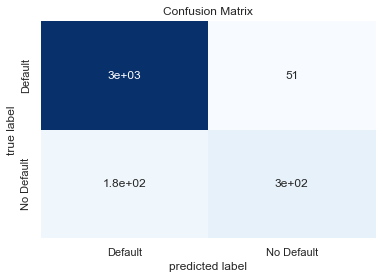


Recall Score
 0.625

Precision Score
 0.8526011560693642

F1 Score
 0.7212713936430318
Validation Acuracy Scores :
Accuracy:  0.9159192825112108


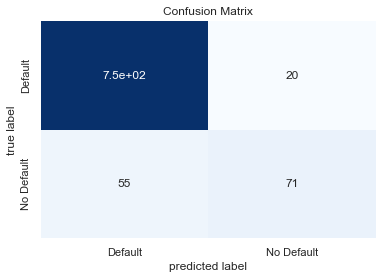


Recall Score
 0.5634920634920635

Precision Score
 0.7802197802197802

F1 Score
 0.6543778801843317


Dataset  \
0                                Stemmed TF Vectors   
1                                Stemmed TF Vectors   
2                                Stemmed TF Vectors   
3                                Stemmed TF Vectors   
4                                Stemmed TF Vectors   
5                                Stemmed TF Vectors   
6                                Stemmed TF Vectors   
7                                Stemmed TF Vectors   
8                             Stemmed TFIDF Vectors   
9                             Stemmed TFIDF Vectors   
10                            Stemmed TFIDF Vectors   
11                            Stemmed TFIDF Vectors   
12                            Stemmed TFIDF Vectors   
13                            Stemmed TFIDF Vectors   
14                            Stemmed TFIDF Vectors   
15                            Stemmed TFIDF Vectors   
16                       Stemmed Doc2Vec embeddings   
17                       Stemmed Doc2Vec embeddings   
18                       Stemmed Doc2Vec embeddings   
19                       Stemmed Doc2Vec embeddings   
20                       Stemmed Doc2Vec embeddings   
21                       Stemmed Doc2Vec embeddings   
22                       Stemmed Doc2Vec embeddings   
23                       Stemmed Doc2Vec embeddings   
24  Stemmed Doc2Vec embeddings + Heuristic features   
25  Stemmed Doc2Vec embeddings + Heuristic features   
26  Stemmed Doc2Vec embeddings + Heuristic features   
27  Stemmed Doc2Vec embeddings + Heuristic features   
28  Stemmed Doc2Vec embeddings + Heuristic features   
29  Stemmed Doc2Vec embeddings + Heuristic features   
30  Stemmed Doc2Vec embeddings + Heuristic features   
31  Stemmed Doc2Vec embeddings + Heuristic features   
32                               Heuristic Features   
33                               Heuristic Features   
34                               Heuristic Features   
35                               Heuristic Features   
36                               Heuristic Features   
37                               Heuristic Features   
38                               Heuristic Features   
39                               Heuristic Features   

                            Model  Accuracy Precision    Recall  F1-Score  
0          DecisionTreeClassifier  0.955157  0.859649  0.803279  0.830508  
1             Logistic Regression  0.980942  0.990654  0.868852  0.925764  
2                   Random Forest  0.966368       1.0   0.76378  0.866071  
3           Bagging Random Forest  0.956278       1.0  0.692913  0.818605  
4              Adaoost Classifier  0.979821       1.0  0.858268  0.923729  
5   Gradeient Boosting Classifier  0.951794  0.988372  0.669291  0.798122  
6                  KNN Classifier  0.887892       1.0  0.212598  0.350649  
7                  SVM Classifier  0.970852       1.0  0.795276  0.885965  
8          DecisionTreeClassifier  0.942825  0.840708  0.742188  0.788382  
9             Logistic Regression  0.929372  0.986842  0.547445  0.704225  
10                  Random Forest  0.974215       1.0  0.776699  0.874317  
11          Bagging Random Forest  0.970852       1.0  0.747573  0.855556  
12            Adaboost Classifier  0.969731  0.913043  0.815534  0.861538  
13  Gradeient Boosting Classifier  0.956278  0.932432  0.669903  0.779661  
14                 KNN Classifier  0.903587       1.0  0.165049  0.283333  
15                 SVM Classifier  0.970852  0.975309   0.76699  0.858696  
16         DecisionTreeClassifier  0.940583  0.789474  0.756303  0.772532  
17            Logistic Regression  0.974215  0.922414  0.884298  0.902954  
18                  Random Forest  0.954036   0.95098  0.729323  0.825532  
19          Bagging Random Forest  0.954036   0.95098  0.729323  0.825532  
20            Adaboost Classifier  0.961883  0.883721  0.857143  0.870229  
21  Gradeient Boosting Classifier   0.95852  0.921053  0.789474  0.850202  
22                 KNN Classifier  0.955

In [257]:
Dataset="Heuristic Features"
Model="KNN Classifier"
model=KNeighborsClassifier()
model.fit(X_train,y_train)
y_pred_train=model.predict(X_train)
y_pred_valid=model.predict(X_valid)
print("Training Acuracy Scores :")
accuracy_scores(y_train,y_pred_train)
print("Validation Acuracy Scores :")
accuracy_scores(y_valid,y_pred_valid)
results.loc[len(results),]=[Dataset,Model,accuracy_score(y_valid,y_pred_valid),precision_score(y_valid,y_pred_valid),recall_score(y_valid,y_pred_valid),f1_score(y_valid,y_pred_valid)]
results

Training Acuracy Scores :
Accuracy:  0.8953716690042076


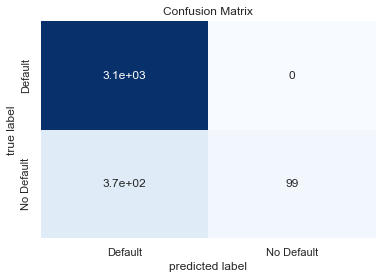


Recall Score
 0.2097457627118644

Precision Score
 1.0

F1 Score
 0.3467600700525394
Validation Acuracy Scores :
Accuracy:  0.8968609865470852


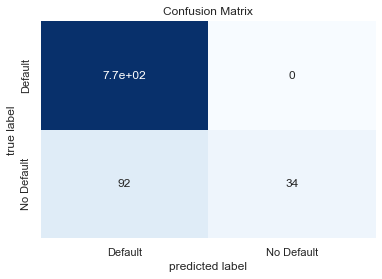


Recall Score
 0.2698412698412698

Precision Score
 1.0

F1 Score
 0.425


Dataset  \
0                                Stemmed TF Vectors   
1                                Stemmed TF Vectors   
2                                Stemmed TF Vectors   
3                                Stemmed TF Vectors   
4                                Stemmed TF Vectors   
5                                Stemmed TF Vectors   
6                                Stemmed TF Vectors   
7                                Stemmed TF Vectors   
8                             Stemmed TFIDF Vectors   
9                             Stemmed TFIDF Vectors   
10                            Stemmed TFIDF Vectors   
11                            Stemmed TFIDF Vectors   
12                            Stemmed TFIDF Vectors   
13                            Stemmed TFIDF Vectors   
14                            Stemmed TFIDF Vectors   
15                            Stemmed TFIDF Vectors   
16                       Stemmed Doc2Vec embeddings   
17                       Stemmed Doc2Vec embeddings   
18                       Stemmed Doc2Vec embeddings   
19                       Stemmed Doc2Vec embeddings   
20                       Stemmed Doc2Vec embeddings   
21                       Stemmed Doc2Vec embeddings   
22                       Stemmed Doc2Vec embeddings   
23                       Stemmed Doc2Vec embeddings   
24  Stemmed Doc2Vec embeddings + Heuristic features   
25  Stemmed Doc2Vec embeddings + Heuristic features   
26  Stemmed Doc2Vec embeddings + Heuristic features   
27  Stemmed Doc2Vec embeddings + Heuristic features   
28  Stemmed Doc2Vec embeddings + Heuristic features   
29  Stemmed Doc2Vec embeddings + Heuristic features   
30  Stemmed Doc2Vec embeddings + Heuristic features   
31  Stemmed Doc2Vec embeddings + Heuristic features   
32                               Heuristic Features   
33                               Heuristic Features   
34                               Heuristic Features   
35                               Heuristic Features   
36                               Heuristic Features   
37                               Heuristic Features   
38                               Heuristic Features   
39                               Heuristic Features   
40                               Heuristic Features   

                            Model  Accuracy Precision    Recall  F1-Score  
0          DecisionTreeClassifier  0.955157  0.859649  0.803279  0.830508  
1             Logistic Regression  0.980942  0.990654  0.868852  0.925764  
2                   Random Forest  0.966368       1.0   0.76378  0.866071  
3           Bagging Random Forest  0.956278       1.0  0.692913  0.818605  
4              Adaoost Classifier  0.979821       1.0  0.858268  0.923729  
5   Gradeient Boosting Classifier  0.951794  0.988372  0.669291  0.798122  
6                  KNN Classifier  0.887892       1.0  0.212598  0.350649  
7                  SVM Classifier  0.970852       1.0  0.795276  0.885965  
8          DecisionTreeClassifier  0.942825  0.840708  0.742188  0.788382  
9             Logistic Regression  0.929372  0.986842  0.547445  0.704225  
10                  Random Forest  0.974215       1.0  0.776699  0.874317  
11          Bagging Random Forest  0.970852       1.0  0.747573  0.855556  
12            Adaboost Classifier  0.969731  0.913043  0.815534  0.861538  
13  Gradeient Boosting Classifier  0.956278  0.932432  0.669903  0.779661  
14                 KNN Classifier  0.903587       1.0  0.165049  0.283333  
15                 SVM Classifier  0.970852  0.975309   0.76699  0.858696  
16         DecisionTreeClassifier  0.940583  0.789474  0.756303  0.772532  
17            Logistic Regression  0.974215  0.922414  0.884298  0.902954  
18                  Random Forest  0.954036   0.95098  0.729323  0.825532  
19          Bagging Random Forest  0.954036   0.95098  0.729323  0.825532  
20            Adaboost Classifier  0.961883  0.883721  0.857143  0.870229  
21  Gradeient Boosting Classifier   0.95852  0.921053  0.7894

In [258]:
Dataset="Heuristic Features"
Model="SVM Classifier"
model=SVC()
model.fit(X_train,y_train)
y_pred_train=model.predict(X_train)
y_pred_valid=model.predict(X_valid)
print("Training Acuracy Scores :")
accuracy_scores(y_train,y_pred_train)
print("Validation Acuracy Scores :")
accuracy_scores(y_valid,y_pred_valid)
results.loc[len(results),]=[Dataset,Model,accuracy_score(y_valid,y_pred_valid),precision_score(y_valid,y_pred_valid),recall_score(y_valid,y_pred_valid),f1_score(y_valid,y_pred_valid)]
results

In [259]:
results.to_csv("results.csv",index=False)
results

Dataset  \
0                                Stemmed TF Vectors   
1                                Stemmed TF Vectors   
2                                Stemmed TF Vectors   
3                                Stemmed TF Vectors   
4                                Stemmed TF Vectors   
5                                Stemmed TF Vectors   
6                                Stemmed TF Vectors   
7                                Stemmed TF Vectors   
8                             Stemmed TFIDF Vectors   
9                             Stemmed TFIDF Vectors   
10                            Stemmed TFIDF Vectors   
11                            Stemmed TFIDF Vectors   
12                            Stemmed TFIDF Vectors   
13                            Stemmed TFIDF Vectors   
14                            Stemmed TFIDF Vectors   
15                            Stemmed TFIDF Vectors   
16                       Stemmed Doc2Vec embeddings   
17                       Stemmed Doc2Vec embeddings   
18                       Stemmed Doc2Vec embeddings   
19                       Stemmed Doc2Vec embeddings   
20                       Stemmed Doc2Vec embeddings   
21                       Stemmed Doc2Vec embeddings   
22                       Stemmed Doc2Vec embeddings   
23                       Stemmed Doc2Vec embeddings   
24  Stemmed Doc2Vec embeddings + Heuristic features   
25  Stemmed Doc2Vec embeddings + Heuristic features   
26  Stemmed Doc2Vec embeddings + Heuristic features   
27  Stemmed Doc2Vec embeddings + Heuristic features   
28  Stemmed Doc2Vec embeddings + Heuristic features   
29  Stemmed Doc2Vec embeddings + Heuristic features   
30  Stemmed Doc2Vec embeddings + Heuristic features   
31  Stemmed Doc2Vec embeddings + Heuristic features   
32                               Heuristic Features   
33                               Heuristic Features   
34                               Heuristic Features   
35                               Heuristic Features   
36                               Heuristic Features   
37                               Heuristic Features   
38                               Heuristic Features   
39                               Heuristic Features   
40                               Heuristic Features   

                            Model  Accuracy Precision    Recall  F1-Score  
0          DecisionTreeClassifier  0.955157  0.859649  0.803279  0.830508  
1             Logistic Regression  0.980942  0.990654  0.868852  0.925764  
2                   Random Forest  0.966368       1.0   0.76378  0.866071  
3           Bagging Random Forest  0.956278       1.0  0.692913  0.818605  
4              Adaoost Classifier  0.979821       1.0  0.858268  0.923729  
5   Gradeient Boosting Classifier  0.951794  0.988372  0.669291  0.798122  
6                  KNN Classifier  0.887892       1.0  0.212598  0.350649  
7                  SVM Classifier  0.970852       1.0  0.795276  0.885965  
8          DecisionTreeClassifier  0.942825  0.840708  0.742188  0.788382  
9             Logistic Regression  0.929372  0.986842  0.547445  0.704225  
10                  Random Forest  0.974215       1.0  0.776699  0.874317  
11          Bagging Random Forest  0.970852       1.0  0.747573  0.855556  
12            Adaboost Classifier  0.969731  0.913043  0.815534  0.861538  
13  Gradeient Boosting Classifier  0.956278  0.932432  0.669903  0.779661  
14                 KNN Classifier  0.903587       1.0  0.165049  0.283333  
15                 SVM Classifier  0.970852  0.975309   0.76699  0.858696  
16         DecisionTreeClassifier  0.940583  0.789474  0.756303  0.772532  
17            Logistic Regression  0.974215  0.922414  0.884298  0.902954  
18                  Random Forest  0.954036   0.95098  0.729323  0.825532  
19          Bagging Random Forest  0.954036   0.95098  0.729323  0.825532  
20            Adaboost Classifier  0.961883  0.883721  0.857143  0.870229  
21  Gradeient Boosting Classifier   0.95852  0.921053  0.7894

008704050406 0089mi 0121 01223585236 01223585334 0125698789 02 020603  \
0               0      0    0           0           0          0  0      0   
1               0      0    0           0           0          0  0      0   
2               0      0    0           0           0          0  0      0   
3               0      0    0           0           0          0  0      0   
4               0      0    0           0           0          0  0      0   
...           ...    ...  ...         ...         ...        ... ..    ...   
5567            0      0    0           0           0          0  0      0   
5568            0      0    0           0           0          0  0      0   
5569            0      0    0           0           0          0  0      0   
5570            0      0    0           0           0          0  0      0   
5571            0      0    0           0           0          0  0      0   

     0207 02070836089  ... zero zhong zindgi zoe zogtoriu zoom zouk zyada üll  \
0       0           0  ...    0     0      0   0        0    0    0     0   0   
1       0           0  ...    0     0      0   0        0    0    0     0   0   
2       0           0  ...    0     0      0   0        0    0    0     0   0   
3       0           0  ...    0     0      0   0        0    0    0     0   0   
4       0           0  ...    0     0      0   0        0    0    0     0   0   
...   ...         ...  ...  ...   ...    ...  ..      ...  ...  ...   ...  ..   
5567    0           0  ...    0     0      0   0        0    0    0     0   0   
5568    0           0  ...    0     0      0   0        0    0    0     0   0   
5569    0           0  ...    0     0      0   0        0    0    0     0   0   
5570    0           0  ...    0     0      0   0        0    0    0     0   0   
5571    0           0  ...    0     0      0   0        0    0    0     0   0   

     〨ud  
0      0  
1      0  
2      0  
3      0  
4      0  
...   ..  
5567   0  
5568   0  
5569   0  
5570   0  
5571   0  

[5572 rows x 8147 columns]

## Models on Stemmed TF Vectors + Heuristic Features

In [263]:
X=pd.concat([DTM,hurestic_features],axis=1)
Y=df.Labels

In [264]:
X

(008704050406,)  (0089mi,)  (0121,)  (01223585236,)  (01223585334,)  \
0                   0          0        0               0               0   
1                   0          0        0               0               0   
2                   0          0        0               0               0   
3                   0          0        0               0               0   
4                   0          0        0               0               0   
...               ...        ...      ...             ...             ...   
5567                0          0        0               0               0   
5568                0          0        0               0               0   
5569                0          0        0               0               0   
5570                0          0        0               0               0   
5571                0          0        0               0               0   

      (0125698789,)  (02,)  (020603,)  (0207,)  (02070836089,)  ...  (zoom,)  \
0                 0      0          0        0               0  ...        0   
1                 0      0          0        0               0  ...        0   
2                 0      0          0        0               0  ...        0   
3                 0      0          0        0               0  ...        0   
4                 0      0          0        0               0  ...        0   
...             ...    ...        ...      ...             ...  ...      ...   
5567              0      0          0        0               0  ...        0   
5568              0      0          0        0               0  ...        0   
5569              0      0          0        0               0  ...        0   
5570              0      0          0        0               0  ...        0   
5571              0      0          0        0               0  ...        0   

      (zouk,)  (zyada,)  (üll,)  (〨ud,)  FirstWord_upper  Phone_num  \
0           0         0       0       0                0          0   
1           0         0       0       0                0          0   
2           0         0       0       0                0          1   
3           0         0       0       0                1          0   
4           0         0       0       0                0          0   
...       ...       ...     ...     ...              ...        ...   
5567        0         0       0       0                0          1   
5568        0         0       0       0                0          0   
5569        0         0       0       0                0          0   
5570        0         0       0       0                0          0   
5571        0         0       0       0                0          0   

      suspicious_words  percent_stopWords  Length_of_SMS  
0                    0               20.0             20  
1                    0                0.0              6  
2                    0          17.857143             28  
3                    0          18.181818             11  
4                    0          38.461538             13  
...                ...                ...            ...  
5567                 1          26.666667             30  
5568                 0               12.5              8  
5569                 0               40.0             10  
5570                 0          38.461538             26  
5571                 0          33.333333              6  

[5572 rows x 8152 columns]

In [265]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
X_train,X_valid,y_train,y_valid=train_test_split(X_train,y_train,test_size=0.2)

Training Acuracy Scores :
Accuracy:  1.0


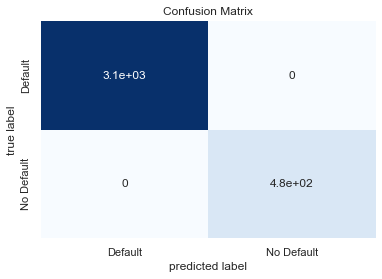


Recall Score
 1.0

Precision Score
 1.0

F1 Score
 1.0
Validation Acuracy Scores :
Accuracy:  0.9708520179372198


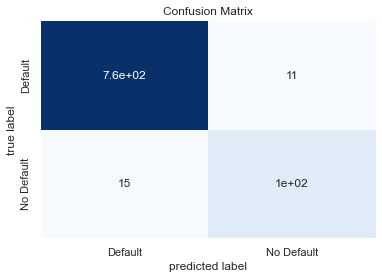


Recall Score
 0.8739495798319328

Precision Score
 0.9043478260869565

F1 Score
 0.8888888888888888


In [266]:
Dataset="Stemmed TF Vectors + Heuristic Features"
Model="DecisionTreeClassifier"
tree=DecisionTreeClassifier(criterion='entropy')
tree.fit(X_train,y_train)
y_pred_train=tree.predict(X_train)
y_pred_valid=tree.predict(X_valid)
print("Training Acuracy Scores :")
accuracy_scores(y_train,y_pred_train)
print("Validation Acuracy Scores :")
accuracy_scores(y_valid,y_pred_valid)
results.loc[len(results),]=[Dataset,Model,accuracy_score(y_valid,y_pred_valid),precision_score(y_valid,y_pred_valid),recall_score(y_valid,y_pred_valid),f1_score(y_valid,y_pred_valid)]

In [267]:
# results.loc[len(results),:]=[Dataset,Model,accuracy_score(y_valid,y_pred_valid),precision_score(y_valid,y_pred_valid),recall_score(y_valid,y_pred_valid),f1_score(y_valid,y_pred_valid)]
results

Dataset  \
0                                Stemmed TF Vectors   
1                                Stemmed TF Vectors   
2                                Stemmed TF Vectors   
3                                Stemmed TF Vectors   
4                                Stemmed TF Vectors   
5                                Stemmed TF Vectors   
6                                Stemmed TF Vectors   
7                                Stemmed TF Vectors   
8                             Stemmed TFIDF Vectors   
9                             Stemmed TFIDF Vectors   
10                            Stemmed TFIDF Vectors   
11                            Stemmed TFIDF Vectors   
12                            Stemmed TFIDF Vectors   
13                            Stemmed TFIDF Vectors   
14                            Stemmed TFIDF Vectors   
15                            Stemmed TFIDF Vectors   
16                       Stemmed Doc2Vec embeddings   
17                       Stemmed Doc2Vec embeddings   
18                       Stemmed Doc2Vec embeddings   
19                       Stemmed Doc2Vec embeddings   
20                       Stemmed Doc2Vec embeddings   
21                       Stemmed Doc2Vec embeddings   
22                       Stemmed Doc2Vec embeddings   
23                       Stemmed Doc2Vec embeddings   
24  Stemmed Doc2Vec embeddings + Heuristic features   
25  Stemmed Doc2Vec embeddings + Heuristic features   
26  Stemmed Doc2Vec embeddings + Heuristic features   
27  Stemmed Doc2Vec embeddings + Heuristic features   
28  Stemmed Doc2Vec embeddings + Heuristic features   
29  Stemmed Doc2Vec embeddings + Heuristic features   
30  Stemmed Doc2Vec embeddings + Heuristic features   
31  Stemmed Doc2Vec embeddings + Heuristic features   
32                               Heuristic Features   
33                               Heuristic Features   
34                               Heuristic Features   
35                               Heuristic Features   
36                               Heuristic Features   
37                               Heuristic Features   
38                               Heuristic Features   
39                               Heuristic Features   
40                               Heuristic Features   
41          Stemmed TF Vectors + Heuristic Features   

                            Model  Accuracy Precision    Recall  F1-Score  
0          DecisionTreeClassifier  0.955157  0.859649  0.803279  0.830508  
1             Logistic Regression  0.980942  0.990654  0.868852  0.925764  
2                   Random Forest  0.966368       1.0   0.76378  0.866071  
3           Bagging Random Forest  0.956278       1.0  0.692913  0.818605  
4              Adaoost Classifier  0.979821       1.0  0.858268  0.923729  
5   Gradeient Boosting Classifier  0.951794  0.988372  0.669291  0.798122  
6                  KNN Classifier  0.887892       1.0  0.212598  0.350649  
7                  SVM Classifier  0.970852       1.0  0.795276  0.885965  
8          DecisionTreeClassifier  0.942825  0.840708  0.742188  0.788382  
9             Logistic Regression  0.929372  0.986842  0.547445  0.704225  
10                  Random Forest  0.974215       1.0  0.776699  0.874317  
11          Bagging Random Forest  0.970852       1.0  0.747573  0.855556  
12            Adaboost Classifier  0.969731  0.913043  0.815534  0.861538  
13  Gradeient Boosting Classifier  0.956278  0.932432  0.669903  0.779661  
14                 KNN Classifier  0.903587       1.0  0.165049  0.283333  
15                 SVM Classifier  0.970852  0.975309   0.76699  0.858696  
16         DecisionTreeClassifier  0.940583  0.789474  0.756303  0.772532  
17            Logistic Regression  0.974215  0.922414  0.884298  0.902954  
18                  Random Forest  0.954036   0.95098  0.729323  0.825532  
19          Bagging Random Forest  0.954036   0.95098  0.729323  0.825532  
20            Adaboost Classifier  0.961883  0.883721  0.857143  0.870229  
21  Gr

In [268]:
# Logistic Regression

In [269]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
X_train,X_valid,y_train,y_valid=train_test_split(X_train,y_train,test_size=0.2)

Training Acuracy Scores :
Accuracy:  0.9957924263674615


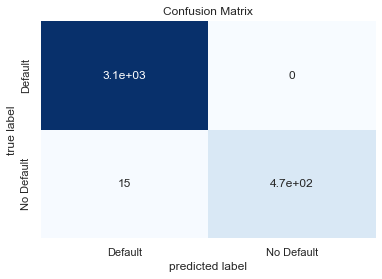


Recall Score
 0.9688149688149689

Precision Score
 1.0

F1 Score
 0.9841605068637804
Validation Acuracy Scores :
Accuracy:  0.9854260089686099


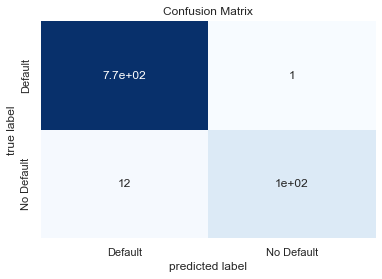


Recall Score
 0.8974358974358975

Precision Score
 0.9905660377358491

F1 Score
 0.9417040358744395


In [270]:
Dataset="Stemmed TF Vectors + Heuristic Features"
Model="Logistic Regression"
logit=LogisticRegression()
logit.fit(X_train,y_train)
y_pred_train=logit.predict(X_train)
y_pred_valid=logit.predict(X_valid)
print("Training Acuracy Scores :")
accuracy_scores(y_train,y_pred_train)
print("Validation Acuracy Scores :")
accuracy_scores(y_valid,y_pred_valid)
results.loc[len(results),]=[Dataset,Model,accuracy_score(y_valid,y_pred_valid),precision_score(y_valid,y_pred_valid),recall_score(y_valid,y_pred_valid),f1_score(y_valid,y_pred_valid)]

In [271]:
results

Dataset  \
0                                Stemmed TF Vectors   
1                                Stemmed TF Vectors   
2                                Stemmed TF Vectors   
3                                Stemmed TF Vectors   
4                                Stemmed TF Vectors   
5                                Stemmed TF Vectors   
6                                Stemmed TF Vectors   
7                                Stemmed TF Vectors   
8                             Stemmed TFIDF Vectors   
9                             Stemmed TFIDF Vectors   
10                            Stemmed TFIDF Vectors   
11                            Stemmed TFIDF Vectors   
12                            Stemmed TFIDF Vectors   
13                            Stemmed TFIDF Vectors   
14                            Stemmed TFIDF Vectors   
15                            Stemmed TFIDF Vectors   
16                       Stemmed Doc2Vec embeddings   
17                       Stemmed Doc2Vec embeddings   
18                       Stemmed Doc2Vec embeddings   
19                       Stemmed Doc2Vec embeddings   
20                       Stemmed Doc2Vec embeddings   
21                       Stemmed Doc2Vec embeddings   
22                       Stemmed Doc2Vec embeddings   
23                       Stemmed Doc2Vec embeddings   
24  Stemmed Doc2Vec embeddings + Heuristic features   
25  Stemmed Doc2Vec embeddings + Heuristic features   
26  Stemmed Doc2Vec embeddings + Heuristic features   
27  Stemmed Doc2Vec embeddings + Heuristic features   
28  Stemmed Doc2Vec embeddings + Heuristic features   
29  Stemmed Doc2Vec embeddings + Heuristic features   
30  Stemmed Doc2Vec embeddings + Heuristic features   
31  Stemmed Doc2Vec embeddings + Heuristic features   
32                               Heuristic Features   
33                               Heuristic Features   
34                               Heuristic Features   
35                               Heuristic Features   
36                               Heuristic Features   
37                               Heuristic Features   
38                               Heuristic Features   
39                               Heuristic Features   
40                               Heuristic Features   
41          Stemmed TF Vectors + Heuristic Features   
42          Stemmed TF Vectors + Heuristic Features   

                            Model  Accuracy Precision    Recall  F1-Score  
0          DecisionTreeClassifier  0.955157  0.859649  0.803279  0.830508  
1             Logistic Regression  0.980942  0.990654  0.868852  0.925764  
2                   Random Forest  0.966368       1.0   0.76378  0.866071  
3           Bagging Random Forest  0.956278       1.0  0.692913  0.818605  
4              Adaoost Classifier  0.979821       1.0  0.858268  0.923729  
5   Gradeient Boosting Classifier  0.951794  0.988372  0.669291  0.798122  
6                  KNN Classifier  0.887892       1.0  0.212598  0.350649  
7                  SVM Classifier  0.970852       1.0  0.795276  0.885965  
8          DecisionTreeClassifier  0.942825  0.840708  0.742188  0.788382  
9             Logistic Regression  0.929372  0.986842  0.547445  0.704225  
10                  Random Forest  0.974215       1.0  0.776699  0.874317  
11          Bagging Random Forest  0.970852       1.0  0.747573  0.855556  
12            Adaboost Classifier  0.969731  0.913043  0.815534  0.861538  
13  Gradeient Boosting Classifier  0.956278  0.932432  0.669903  0.779661  
14                 KNN Classifier  0.903587       1.0  0.165049  0.283333  
15                 SVM Classifier  0.970852  0.975309   0.76699  0.858696  
16         DecisionTreeClassifier  0.940583  0.789474  0.756303  0.772532  
17            Logistic Regression  0.974215  0.922414  0.884298  0.902954  
18                  Random Forest  0.954036   0.95098  0.729323  0.825532  
19          Bagging Random Forest  0.954036   0.95098  0.729323  0.825532  
20            Adaboost Clas

In [272]:
# Random Forest

In [273]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
X_train,X_valid,y_train,y_valid=train_test_split(X_train,y_train,test_size=0.2)

Training Acuracy Scores :
Accuracy:  1.0


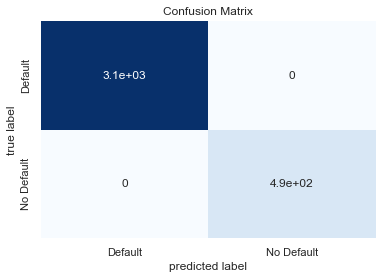


Recall Score
 1.0

Precision Score
 1.0

F1 Score
 1.0
Validation Acuracy Scores :
Accuracy:  0.9730941704035875


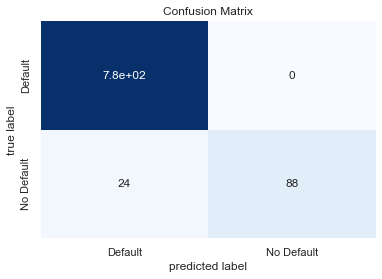


Recall Score
 0.7857142857142857

Precision Score
 1.0

F1 Score
 0.88


In [274]:
Dataset="Stemmed TF Vectors + Heuristic Features"
Model="Random Forest"
model=RandomForestClassifier()
model.fit(X_train,y_train)
y_pred_train=model.predict(X_train)
y_pred_valid=model.predict(X_valid)
print("Training Acuracy Scores :")
accuracy_scores(y_train,y_pred_train)
print("Validation Acuracy Scores :")
accuracy_scores(y_valid,y_pred_valid)
results.loc[len(results),]=[Dataset,Model,accuracy_score(y_valid,y_pred_valid),precision_score(y_valid,y_pred_valid),recall_score(y_valid,y_pred_valid),f1_score(y_valid,y_pred_valid)]

In [275]:
# Bagging with Random Forest

Training Acuracy Scores :
Accuracy:  0.9904628330995793


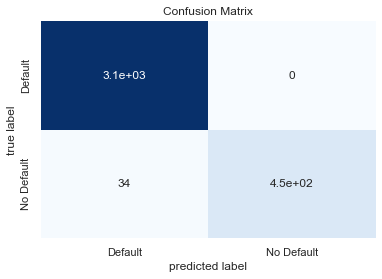


Recall Score
 0.9300411522633745

Precision Score
 1.0

F1 Score
 0.9637526652452025
Validation Acuracy Scores :
Accuracy:  0.9742152466367713


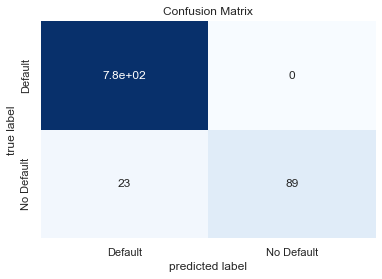


Recall Score
 0.7946428571428571

Precision Score
 1.0

F1 Score
 0.8855721393034826


In [276]:
Dataset="Stemmed TF Vectors + Heuristic Features"
Model="Bagging Random Forest"
model=BaggingClassifier(RandomForestClassifier())
model.fit(X_train,y_train)
y_pred_train=model.predict(X_train)
y_pred_valid=model.predict(X_valid)
print("Training Acuracy Scores :")
accuracy_scores(y_train,y_pred_train)
print("Validation Acuracy Scores :")
accuracy_scores(y_valid,y_pred_valid)
results.loc[len(results),]=[Dataset,Model,accuracy_score(y_valid,y_pred_valid),precision_score(y_valid,y_pred_valid),recall_score(y_valid,y_pred_valid),f1_score(y_valid,y_pred_valid)]

In [277]:
# Adaboost Classifier

Training Acuracy Scores :
Accuracy:  0.9980364656381486


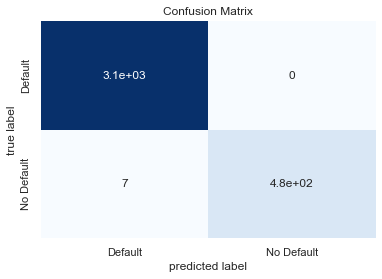


Recall Score
 0.98559670781893

Precision Score
 1.0

F1 Score
 0.9927461139896373
Validation Acuracy Scores :
Accuracy:  0.9753363228699552


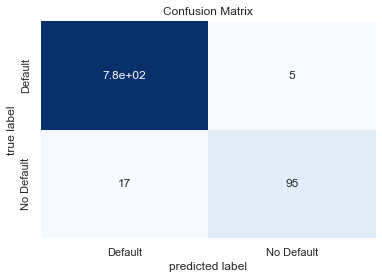


Recall Score
 0.8482142857142857

Precision Score
 0.95

F1 Score
 0.8962264150943395


In [278]:
Dataset="Stemmed TF Vectors + Heuristic Features"
Model="Adaboost Classifier"
model=AdaBoostClassifier(n_estimators=100)
model.fit(X_train,y_train)
y_pred_train=model.predict(X_train)
y_pred_valid=model.predict(X_valid)
print("Training Acuracy Scores :")
accuracy_scores(y_train,y_pred_train)
print("Validation Acuracy Scores :")
accuracy_scores(y_valid,y_pred_valid)
results.loc[len(results),]=[Dataset,Model,accuracy_score(y_valid,y_pred_valid),precision_score(y_valid,y_pred_valid),recall_score(y_valid,y_pred_valid),f1_score(y_valid,y_pred_valid)]

In [279]:
results

Dataset  \
0                                Stemmed TF Vectors   
1                                Stemmed TF Vectors   
2                                Stemmed TF Vectors   
3                                Stemmed TF Vectors   
4                                Stemmed TF Vectors   
5                                Stemmed TF Vectors   
6                                Stemmed TF Vectors   
7                                Stemmed TF Vectors   
8                             Stemmed TFIDF Vectors   
9                             Stemmed TFIDF Vectors   
10                            Stemmed TFIDF Vectors   
11                            Stemmed TFIDF Vectors   
12                            Stemmed TFIDF Vectors   
13                            Stemmed TFIDF Vectors   
14                            Stemmed TFIDF Vectors   
15                            Stemmed TFIDF Vectors   
16                       Stemmed Doc2Vec embeddings   
17                       Stemmed Doc2Vec embeddings   
18                       Stemmed Doc2Vec embeddings   
19                       Stemmed Doc2Vec embeddings   
20                       Stemmed Doc2Vec embeddings   
21                       Stemmed Doc2Vec embeddings   
22                       Stemmed Doc2Vec embeddings   
23                       Stemmed Doc2Vec embeddings   
24  Stemmed Doc2Vec embeddings + Heuristic features   
25  Stemmed Doc2Vec embeddings + Heuristic features   
26  Stemmed Doc2Vec embeddings + Heuristic features   
27  Stemmed Doc2Vec embeddings + Heuristic features   
28  Stemmed Doc2Vec embeddings + Heuristic features   
29  Stemmed Doc2Vec embeddings + Heuristic features   
30  Stemmed Doc2Vec embeddings + Heuristic features   
31  Stemmed Doc2Vec embeddings + Heuristic features   
32                               Heuristic Features   
33                               Heuristic Features   
34                               Heuristic Features   
35                               Heuristic Features   
36                               Heuristic Features   
37                               Heuristic Features   
38                               Heuristic Features   
39                               Heuristic Features   
40                               Heuristic Features   
41          Stemmed TF Vectors + Heuristic Features   
42          Stemmed TF Vectors + Heuristic Features   
43          Stemmed TF Vectors + Heuristic Features   
44          Stemmed TF Vectors + Heuristic Features   
45          Stemmed TF Vectors + Heuristic Features   

                            Model  Accuracy Precision    Recall  F1-Score  
0          DecisionTreeClassifier  0.955157  0.859649  0.803279  0.830508  
1             Logistic Regression  0.980942  0.990654  0.868852  0.925764  
2                   Random Forest  0.966368       1.0   0.76378  0.866071  
3           Bagging Random Forest  0.956278       1.0  0.692913  0.818605  
4              Adaoost Classifier  0.979821       1.0  0.858268  0.923729  
5   Gradeient Boosting Classifier  0.951794  0.988372  0.669291  0.798122  
6                  KNN Classifier  0.887892       1.0  0.212598  0.350649  
7                  SVM Classifier  0.970852       1.0  0.795276  0.885965  
8          DecisionTreeClassifier  0.942825  0.840708  0.742188  0.788382  
9             Logistic Regression  0.929372  0.986842  0.547445  0.704225  
10                  Random Forest  0.974215       1.0  0.776699  0.874317  
11          Bagging Random Forest  0.970852       1.0  0.747573  0.855556  
12            Adaboost Classifier  0.969731  0.913043  0.815534  0.861538  
13  Gradeient Boosting Classifier  0.956278  0.932432  0.669903  0.779661  
14                 KNN Classifier  0.903587       1.0  0.165049  0.283333  
15                 SVM Classifier  0.970852  0.975309   0.76699  0.858696  
16         DecisionTreeClassifier  0.940583  0.789474  0.756303  0.772532  
17            Logistic Regression  0.974215  0.922414  0.884298  0.902954  
18            

In [280]:
#Gradeient Boosting

Training Acuracy Scores :
Accuracy:  0.9876577840112202


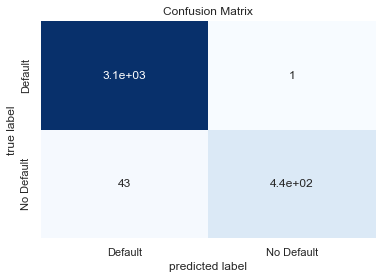


Recall Score
 0.911522633744856

Precision Score
 0.9977477477477478

F1 Score
 0.9526881720430108
Validation Acuracy Scores :
Accuracy:  0.9742152466367713


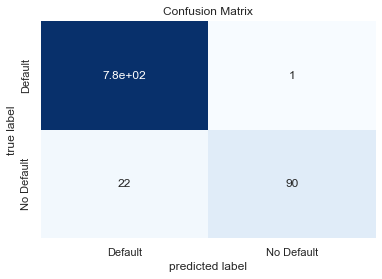


Recall Score
 0.8035714285714286

Precision Score
 0.989010989010989

F1 Score
 0.8866995073891626


Dataset  \
0                                Stemmed TF Vectors   
1                                Stemmed TF Vectors   
2                                Stemmed TF Vectors   
3                                Stemmed TF Vectors   
4                                Stemmed TF Vectors   
5                                Stemmed TF Vectors   
6                                Stemmed TF Vectors   
7                                Stemmed TF Vectors   
8                             Stemmed TFIDF Vectors   
9                             Stemmed TFIDF Vectors   
10                            Stemmed TFIDF Vectors   
11                            Stemmed TFIDF Vectors   
12                            Stemmed TFIDF Vectors   
13                            Stemmed TFIDF Vectors   
14                            Stemmed TFIDF Vectors   
15                            Stemmed TFIDF Vectors   
16                       Stemmed Doc2Vec embeddings   
17                       Stemmed Doc2Vec embeddings   
18                       Stemmed Doc2Vec embeddings   
19                       Stemmed Doc2Vec embeddings   
20                       Stemmed Doc2Vec embeddings   
21                       Stemmed Doc2Vec embeddings   
22                       Stemmed Doc2Vec embeddings   
23                       Stemmed Doc2Vec embeddings   
24  Stemmed Doc2Vec embeddings + Heuristic features   
25  Stemmed Doc2Vec embeddings + Heuristic features   
26  Stemmed Doc2Vec embeddings + Heuristic features   
27  Stemmed Doc2Vec embeddings + Heuristic features   
28  Stemmed Doc2Vec embeddings + Heuristic features   
29  Stemmed Doc2Vec embeddings + Heuristic features   
30  Stemmed Doc2Vec embeddings + Heuristic features   
31  Stemmed Doc2Vec embeddings + Heuristic features   
32                               Heuristic Features   
33                               Heuristic Features   
34                               Heuristic Features   
35                               Heuristic Features   
36                               Heuristic Features   
37                               Heuristic Features   
38                               Heuristic Features   
39                               Heuristic Features   
40                               Heuristic Features   
41          Stemmed TF Vectors + Heuristic Features   
42          Stemmed TF Vectors + Heuristic Features   
43          Stemmed TF Vectors + Heuristic Features   
44          Stemmed TF Vectors + Heuristic Features   
45          Stemmed TF Vectors + Heuristic Features   
46          Stemmed TF Vectors + Heuristic Features   

                            Model  Accuracy Precision    Recall  F1-Score  
0          DecisionTreeClassifier  0.955157  0.859649  0.803279  0.830508  
1             Logistic Regression  0.980942  0.990654  0.868852  0.925764  
2                   Random Forest  0.966368       1.0   0.76378  0.866071  
3           Bagging Random Forest  0.956278       1.0  0.692913  0.818605  
4              Adaoost Classifier  0.979821       1.0  0.858268  0.923729  
5   Gradeient Boosting Classifier  0.951794  0.988372  0.669291  0.798122  
6                  KNN Classifier  0.887892       1.0  0.212598  0.350649  
7                  SVM Classifier  0.970852       1.0  0.795276  0.885965  
8          DecisionTreeClassifier  0.942825  0.840708  0.742188  0.788382  
9             Logistic Regression  0.929372  0.986842  0.547445  0.704225  
10                  Random Forest  0.974215       1.0  0.776699  0.874317  
11          Bagging Random Forest  0.970852       1.0  0.747573  0.855556  
12            Adaboost Classifier  0.969731  0.913043  0.815534  0.861538  
13  Gradeient Boosting Classifier  0.956278  0.932432  0.669903  0.779661  
14                 KNN Classifier  0.903587       1.0  0.165049  0.283333  
15                 SVM Classifier  0.970852  0.975309   0.76699  0.858696  
16         DecisionTreeClassifier  0.940583  0.789474  0.756303  0.772532  
17            Logistic Regression  

In [281]:
Dataset="Stemmed TF Vectors + Heuristic Features"
Model="Gradeient Boosting Classifier"
model=GradientBoostingClassifier()
model.fit(X_train,y_train)
y_pred_train=model.predict(X_train)
y_pred_valid=model.predict(X_valid)
print("Training Acuracy Scores :")
accuracy_scores(y_train,y_pred_train)
print("Validation Acuracy Scores :")
accuracy_scores(y_valid,y_pred_valid)
results.loc[len(results),]=[Dataset,Model,accuracy_score(y_valid,y_pred_valid),precision_score(y_valid,y_pred_valid),recall_score(y_valid,y_pred_valid),f1_score(y_valid,y_pred_valid)]
results

Training Acuracy Scores :
Accuracy:  0.9548387096774194


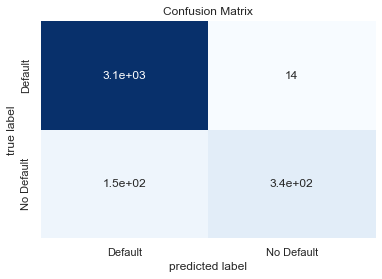


Recall Score
 0.6975308641975309

Precision Score
 0.9603399433427762

F1 Score
 0.8081048867699643
Validation Acuracy Scores :
Accuracy:  0.9405829596412556


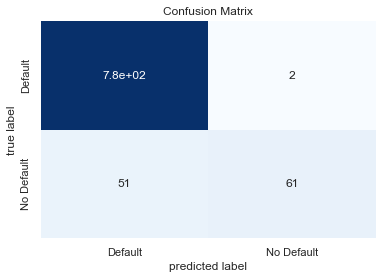


Recall Score
 0.5446428571428571

Precision Score
 0.9682539682539683

F1 Score
 0.6971428571428572


Dataset  \
0                                Stemmed TF Vectors   
1                                Stemmed TF Vectors   
2                                Stemmed TF Vectors   
3                                Stemmed TF Vectors   
4                                Stemmed TF Vectors   
5                                Stemmed TF Vectors   
6                                Stemmed TF Vectors   
7                                Stemmed TF Vectors   
8                             Stemmed TFIDF Vectors   
9                             Stemmed TFIDF Vectors   
10                            Stemmed TFIDF Vectors   
11                            Stemmed TFIDF Vectors   
12                            Stemmed TFIDF Vectors   
13                            Stemmed TFIDF Vectors   
14                            Stemmed TFIDF Vectors   
15                            Stemmed TFIDF Vectors   
16                       Stemmed Doc2Vec embeddings   
17                       Stemmed Doc2Vec embeddings   
18                       Stemmed Doc2Vec embeddings   
19                       Stemmed Doc2Vec embeddings   
20                       Stemmed Doc2Vec embeddings   
21                       Stemmed Doc2Vec embeddings   
22                       Stemmed Doc2Vec embeddings   
23                       Stemmed Doc2Vec embeddings   
24  Stemmed Doc2Vec embeddings + Heuristic features   
25  Stemmed Doc2Vec embeddings + Heuristic features   
26  Stemmed Doc2Vec embeddings + Heuristic features   
27  Stemmed Doc2Vec embeddings + Heuristic features   
28  Stemmed Doc2Vec embeddings + Heuristic features   
29  Stemmed Doc2Vec embeddings + Heuristic features   
30  Stemmed Doc2Vec embeddings + Heuristic features   
31  Stemmed Doc2Vec embeddings + Heuristic features   
32                               Heuristic Features   
33                               Heuristic Features   
34                               Heuristic Features   
35                               Heuristic Features   
36                               Heuristic Features   
37                               Heuristic Features   
38                               Heuristic Features   
39                               Heuristic Features   
40                               Heuristic Features   
41          Stemmed TF Vectors + Heuristic Features   
42          Stemmed TF Vectors + Heuristic Features   
43          Stemmed TF Vectors + Heuristic Features   
44          Stemmed TF Vectors + Heuristic Features   
45          Stemmed TF Vectors + Heuristic Features   
46          Stemmed TF Vectors + Heuristic Features   
47          Stemmed TF Vectors + Heuristic Features   

                            Model  Accuracy Precision    Recall  F1-Score  
0          DecisionTreeClassifier  0.955157  0.859649  0.803279  0.830508  
1             Logistic Regression  0.980942  0.990654  0.868852  0.925764  
2                   Random Forest  0.966368       1.0   0.76378  0.866071  
3           Bagging Random Forest  0.956278       1.0  0.692913  0.818605  
4              Adaoost Classifier  0.979821       1.0  0.858268  0.923729  
5   Gradeient Boosting Classifier  0.951794  0.988372  0.669291  0.798122  
6                  KNN Classifier  0.887892       1.0  0.212598  0.350649  
7                  SVM Classifier  0.970852       1.0  0.795276  0.885965  
8          DecisionTreeClassifier  0.942825  0.840708  0.742188  0.788382  
9             Logistic Regression  0.929372  0.986842  0.547445  0.704225  
10                  Random Forest  0.974215       1.0  0.776699  0.874317  
11          Bagging Random Forest  0.970852       1.0  0.747573  0.855556  
12            Adaboost Classifier  0.969731  0.913043  0.815534  0.861538  
13  Gradeient Boosting Classifier  0.956278  0.932432  0.669903  0.779661  
14                 KNN Classifier  0.903587       1.0  0.165049  0.283333  
15                 SVM Classifier  0.970852  0.975309   0.76699  0.858696  
16         DecisionTreeClassifier  0.940583  0.789474  0

In [282]:
Dataset="Stemmed TF Vectors + Heuristic Features"
Model="KNN Classifier"
model=KNeighborsClassifier()
model.fit(X_train,y_train)
y_pred_train=model.predict(X_train)
y_pred_valid=model.predict(X_valid)
print("Training Acuracy Scores :")
accuracy_scores(y_train,y_pred_train)
print("Validation Acuracy Scores :")
accuracy_scores(y_valid,y_pred_valid)
results.loc[len(results),]=[Dataset,Model,accuracy_score(y_valid,y_pred_valid),precision_score(y_valid,y_pred_valid),recall_score(y_valid,y_pred_valid),f1_score(y_valid,y_pred_valid)]
results

Training Acuracy Scores :
Accuracy:  0.9360448807854137


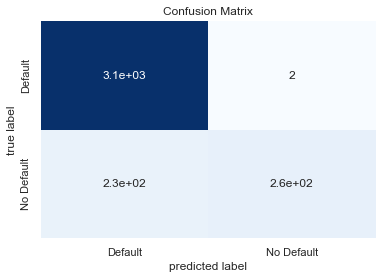


Recall Score
 0.5349794238683128

Precision Score
 0.9923664122137404

F1 Score
 0.695187165775401
Validation Acuracy Scores :
Accuracy:  0.9327354260089686


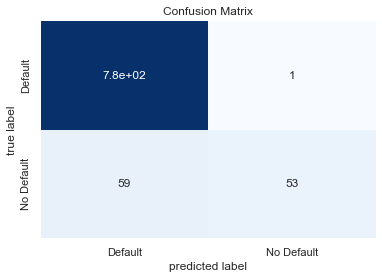


Recall Score
 0.4732142857142857

Precision Score
 0.9814814814814815

F1 Score
 0.6385542168674698


Dataset  \
0                                Stemmed TF Vectors   
1                                Stemmed TF Vectors   
2                                Stemmed TF Vectors   
3                                Stemmed TF Vectors   
4                                Stemmed TF Vectors   
5                                Stemmed TF Vectors   
6                                Stemmed TF Vectors   
7                                Stemmed TF Vectors   
8                             Stemmed TFIDF Vectors   
9                             Stemmed TFIDF Vectors   
10                            Stemmed TFIDF Vectors   
11                            Stemmed TFIDF Vectors   
12                            Stemmed TFIDF Vectors   
13                            Stemmed TFIDF Vectors   
14                            Stemmed TFIDF Vectors   
15                            Stemmed TFIDF Vectors   
16                       Stemmed Doc2Vec embeddings   
17                       Stemmed Doc2Vec embeddings   
18                       Stemmed Doc2Vec embeddings   
19                       Stemmed Doc2Vec embeddings   
20                       Stemmed Doc2Vec embeddings   
21                       Stemmed Doc2Vec embeddings   
22                       Stemmed Doc2Vec embeddings   
23                       Stemmed Doc2Vec embeddings   
24  Stemmed Doc2Vec embeddings + Heuristic features   
25  Stemmed Doc2Vec embeddings + Heuristic features   
26  Stemmed Doc2Vec embeddings + Heuristic features   
27  Stemmed Doc2Vec embeddings + Heuristic features   
28  Stemmed Doc2Vec embeddings + Heuristic features   
29  Stemmed Doc2Vec embeddings + Heuristic features   
30  Stemmed Doc2Vec embeddings + Heuristic features   
31  Stemmed Doc2Vec embeddings + Heuristic features   
32                               Heuristic Features   
33                               Heuristic Features   
34                               Heuristic Features   
35                               Heuristic Features   
36                               Heuristic Features   
37                               Heuristic Features   
38                               Heuristic Features   
39                               Heuristic Features   
40                               Heuristic Features   
41          Stemmed TF Vectors + Heuristic Features   
42          Stemmed TF Vectors + Heuristic Features   
43          Stemmed TF Vectors + Heuristic Features   
44          Stemmed TF Vectors + Heuristic Features   
45          Stemmed TF Vectors + Heuristic Features   
46          Stemmed TF Vectors + Heuristic Features   
47          Stemmed TF Vectors + Heuristic Features   
48          Stemmed TF Vectors + Heuristic Features   

                            Model  Accuracy Precision    Recall  F1-Score  
0          DecisionTreeClassifier  0.955157  0.859649  0.803279  0.830508  
1             Logistic Regression  0.980942  0.990654  0.868852  0.925764  
2                   Random Forest  0.966368       1.0   0.76378  0.866071  
3           Bagging Random Forest  0.956278       1.0  0.692913  0.818605  
4              Adaoost Classifier  0.979821       1.0  0.858268  0.923729  
5   Gradeient Boosting Classifier  0.951794  0.988372  0.669291  0.798122  
6                  KNN Classifier  0.887892       1.0  0.212598  0.350649  
7                  SVM Classifier  0.970852       1.0  0.795276  0.885965  
8          DecisionTreeClassifier  0.942825  0.840708  0.742188  0.788382  
9             Logistic Regression  0.929372  0.986842  0.547445  0.704225  
10                  Random Forest  0.974215       1.0  0.776699  0.874317  
11          Bagging Random Forest  0.970852       1.0  0.747573  0.855556  
12            Adaboost Classifier  0.969731  0.913043  0.815534  0.861538  
13  Gradeient Boosting Classifier  0.956278  0.932432  0.669903  0.779661  
14                 KNN Classifier  0.903587       1.0  0.165049  0.283333  
15                 SVM Classifier  0.970852  0.975309   0.76699  0.858696  
1

In [283]:
Dataset="Stemmed TF Vectors + Heuristic Features"
Model="SVM Classifier"
model=SVC()
model.fit(X_train,y_train)
y_pred_train=model.predict(X_train)
y_pred_valid=model.predict(X_valid)
print("Training Acuracy Scores :")
accuracy_scores(y_train,y_pred_train)
print("Validation Acuracy Scores :")
accuracy_scores(y_valid,y_pred_valid)
results.loc[len(results),]=[Dataset,Model,accuracy_score(y_valid,y_pred_valid),precision_score(y_valid,y_pred_valid),recall_score(y_valid,y_pred_valid),f1_score(y_valid,y_pred_valid)]
results

In [284]:
results.to_csv("results.csv",index=False)
results

Dataset  \
0                                Stemmed TF Vectors   
1                                Stemmed TF Vectors   
2                                Stemmed TF Vectors   
3                                Stemmed TF Vectors   
4                                Stemmed TF Vectors   
5                                Stemmed TF Vectors   
6                                Stemmed TF Vectors   
7                                Stemmed TF Vectors   
8                             Stemmed TFIDF Vectors   
9                             Stemmed TFIDF Vectors   
10                            Stemmed TFIDF Vectors   
11                            Stemmed TFIDF Vectors   
12                            Stemmed TFIDF Vectors   
13                            Stemmed TFIDF Vectors   
14                            Stemmed TFIDF Vectors   
15                            Stemmed TFIDF Vectors   
16                       Stemmed Doc2Vec embeddings   
17                       Stemmed Doc2Vec embeddings   
18                       Stemmed Doc2Vec embeddings   
19                       Stemmed Doc2Vec embeddings   
20                       Stemmed Doc2Vec embeddings   
21                       Stemmed Doc2Vec embeddings   
22                       Stemmed Doc2Vec embeddings   
23                       Stemmed Doc2Vec embeddings   
24  Stemmed Doc2Vec embeddings + Heuristic features   
25  Stemmed Doc2Vec embeddings + Heuristic features   
26  Stemmed Doc2Vec embeddings + Heuristic features   
27  Stemmed Doc2Vec embeddings + Heuristic features   
28  Stemmed Doc2Vec embeddings + Heuristic features   
29  Stemmed Doc2Vec embeddings + Heuristic features   
30  Stemmed Doc2Vec embeddings + Heuristic features   
31  Stemmed Doc2Vec embeddings + Heuristic features   
32                               Heuristic Features   
33                               Heuristic Features   
34                               Heuristic Features   
35                               Heuristic Features   
36                               Heuristic Features   
37                               Heuristic Features   
38                               Heuristic Features   
39                               Heuristic Features   
40                               Heuristic Features   
41          Stemmed TF Vectors + Heuristic Features   
42          Stemmed TF Vectors + Heuristic Features   
43          Stemmed TF Vectors + Heuristic Features   
44          Stemmed TF Vectors + Heuristic Features   
45          Stemmed TF Vectors + Heuristic Features   
46          Stemmed TF Vectors + Heuristic Features   
47          Stemmed TF Vectors + Heuristic Features   
48          Stemmed TF Vectors + Heuristic Features   

                            Model  Accuracy Precision    Recall  F1-Score  
0          DecisionTreeClassifier  0.955157  0.859649  0.803279  0.830508  
1             Logistic Regression  0.980942  0.990654  0.868852  0.925764  
2                   Random Forest  0.966368       1.0   0.76378  0.866071  
3           Bagging Random Forest  0.956278       1.0  0.692913  0.818605  
4              Adaoost Classifier  0.979821       1.0  0.858268  0.923729  
5   Gradeient Boosting Classifier  0.951794  0.988372  0.669291  0.798122  
6                  KNN Classifier  0.887892       1.0  0.212598  0.350649  
7                  SVM Classifier  0.970852       1.0  0.795276  0.885965  
8          DecisionTreeClassifier  0.942825  0.840708  0.742188  0.788382  
9             Logistic Regression  0.929372  0.986842  0.547445  0.704225  
10                  Random Forest  0.974215       1.0  0.776699  0.874317  
11          Bagging Random Forest  0.970852       1.0  0.747573  0.855556  
12            Adaboost Classifier  0.969731  0.913043  0.815534  0.861538  
13  Gradeient Boosting Classifier  0.956278  0.932432  0.669903  0.779661  
14                 KNN Classifier  0.903587       1.0  0.165049  0.283333  
15                 SVM Classifier  0.970852  0.975309   0.76699  0.858696  
1

## Models on Stemmed TF Vectors(Reduced) + Heuristic Features

In [286]:
X=pd.concat([DTM1,hurestic_features],axis=1)
Y=df.Labels

In [287]:
X

(alreadi,)  (also,)  (alway,)  (amp,)  (anyth,)  (around,)  (ask,)  \
0              0        0         0       0         0          0       0   
1              0        0         0       0         0          0       0   
2              0        0         0       0         0          0       0   
3              1        0         0       0         0          0       0   
4              0        0         0       0         0          1       0   
...          ...      ...       ...     ...       ...        ...     ...   
5567           0        0         0       0         0          0       0   
5568           0        0         0       0         0          0       0   
5569           0        0         0       0         0          0       0   
5570           0        0         0       0         0          0       0   
5571           0        0         0       0         0          0       0   

      (award,)  (babe,)  (back,)  ...  (ya,)  (ye,)  (yeah,)  (year,)  (you,)  \
0            0        0        0  ...      0      0        0        0       0   
1            0        0        0  ...      0      0        0        0       0   
2            0        0        0  ...      0      0        0        0       0   
3            0        0        0  ...      0      0        0        0       0   
4            0        0        0  ...      0      0        0        0       0   
...        ...      ...      ...  ...    ...    ...      ...      ...     ...   
5567         0        0        0  ...      0      0        0        0       0   
5568         0        0        0  ...      0      0        0        0       0   
5569         0        0        0  ...      0      0        0        0       0   
5570         0        0        0  ...      0      0        0        0       0   
5571         0        0        0  ...      0      0        0        0       0   

      FirstWord_upper  Phone_num  suspicious_words  percent_stopWords  \
0                   0          0                 0               20.0   
1                   0          0                 0                0.0   
2                   0          1                 0          17.857143   
3                   1          0                 0          18.181818   
4                   0          0                 0          38.461538   
...               ...        ...               ...                ...   
5567                0          1                 1          26.666667   
5568                0          0                 0               12.5   
5569                0          0                 0               40.0   
5570                0          0                 0          38.461538   
5571                0          0                 0          33.333333   

      Length_of_SMS  
0                20  
1                 6  
2                28  
3                11  
4                13  
...             ...  
5567             30  
5568              8  
5569             10  
5570             26  
5571              6  

[5572 rows x 167 columns]

In [288]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
X_train,X_valid,y_train,y_valid=train_test_split(X_train,y_train,test_size=0.2)

Training Acuracy Scores :
Accuracy:  0.9985974754558204


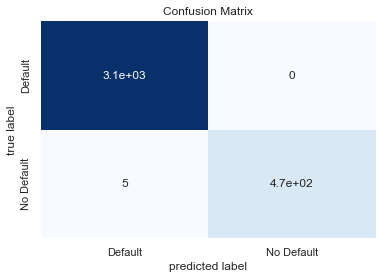


Recall Score
 0.9893842887473461

Precision Score
 1.0

F1 Score
 0.9946638207043756
Validation Acuracy Scores :
Accuracy:  0.9540358744394619


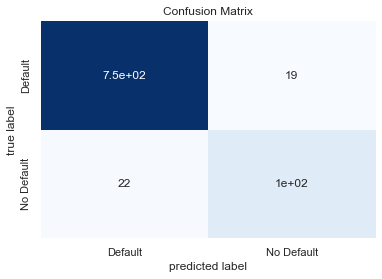


Recall Score
 0.8267716535433071

Precision Score
 0.8467741935483871

F1 Score
 0.8366533864541833


In [289]:
Dataset="Stemmed TF Vectors(Reduced) + Heuristic Features"
Model="DecisionTreeClassifier"
tree=DecisionTreeClassifier(criterion='entropy')
tree.fit(X_train,y_train)
y_pred_train=tree.predict(X_train)
y_pred_valid=tree.predict(X_valid)
print("Training Acuracy Scores :")
accuracy_scores(y_train,y_pred_train)
print("Validation Acuracy Scores :")
accuracy_scores(y_valid,y_pred_valid)
results.loc[len(results),]=[Dataset,Model,accuracy_score(y_valid,y_pred_valid),precision_score(y_valid,y_pred_valid),recall_score(y_valid,y_pred_valid),f1_score(y_valid,y_pred_valid)]

In [290]:
# results.loc[len(results),:]=[Dataset,Model,accuracy_score(y_valid,y_pred_valid),precision_score(y_valid,y_pred_valid),recall_score(y_valid,y_pred_valid),f1_score(y_valid,y_pred_valid)]
results

Dataset  \
0                                 Stemmed TF Vectors   
1                                 Stemmed TF Vectors   
2                                 Stemmed TF Vectors   
3                                 Stemmed TF Vectors   
4                                 Stemmed TF Vectors   
5                                 Stemmed TF Vectors   
6                                 Stemmed TF Vectors   
7                                 Stemmed TF Vectors   
8                              Stemmed TFIDF Vectors   
9                              Stemmed TFIDF Vectors   
10                             Stemmed TFIDF Vectors   
11                             Stemmed TFIDF Vectors   
12                             Stemmed TFIDF Vectors   
13                             Stemmed TFIDF Vectors   
14                             Stemmed TFIDF Vectors   
15                             Stemmed TFIDF Vectors   
16                        Stemmed Doc2Vec embeddings   
17                        Stemmed Doc2Vec embeddings   
18                        Stemmed Doc2Vec embeddings   
19                        Stemmed Doc2Vec embeddings   
20                        Stemmed Doc2Vec embeddings   
21                        Stemmed Doc2Vec embeddings   
22                        Stemmed Doc2Vec embeddings   
23                        Stemmed Doc2Vec embeddings   
24   Stemmed Doc2Vec embeddings + Heuristic features   
25   Stemmed Doc2Vec embeddings + Heuristic features   
26   Stemmed Doc2Vec embeddings + Heuristic features   
27   Stemmed Doc2Vec embeddings + Heuristic features   
28   Stemmed Doc2Vec embeddings + Heuristic features   
29   Stemmed Doc2Vec embeddings + Heuristic features   
30   Stemmed Doc2Vec embeddings + Heuristic features   
31   Stemmed Doc2Vec embeddings + Heuristic features   
32                                Heuristic Features   
33                                Heuristic Features   
34                                Heuristic Features   
35                                Heuristic Features   
36                                Heuristic Features   
37                                Heuristic Features   
38                                Heuristic Features   
39                                Heuristic Features   
40                                Heuristic Features   
41           Stemmed TF Vectors + Heuristic Features   
42           Stemmed TF Vectors + Heuristic Features   
43           Stemmed TF Vectors + Heuristic Features   
44           Stemmed TF Vectors + Heuristic Features   
45           Stemmed TF Vectors + Heuristic Features   
46           Stemmed TF Vectors + Heuristic Features   
47           Stemmed TF Vectors + Heuristic Features   
48           Stemmed TF Vectors + Heuristic Features   
49  Stemmed TF Vectors(Reduced) + Heuristic Features   

                            Model  Accuracy Precision    Recall  F1-Score  
0          DecisionTreeClassifier  0.955157  0.859649  0.803279  0.830508  
1             Logistic Regression  0.980942  0.990654  0.868852  0.925764  
2                   Random Forest  0.966368       1.0   0.76378  0.866071  
3           Bagging Random Forest  0.956278       1.0  0.692913  0.818605  
4              Adaoost Classifier  0.979821       1.0  0.858268  0.923729  
5   Gradeient Boosting Classifier  0.951794  0.988372  0.669291  0.798122  
6                  KNN Classifier  0.887892       1.0  0.212598  0.350649  
7                  SVM Classifier  0.970852       1.0  0.795276  0.885965  
8          DecisionTreeClassifier  0.942825  0.840708  0.742188  0.788382  
9             Logistic Regression  0.929372  0.986842  0.547445  0.704225  
10                  Random Forest  0.974215       1.0  0.776699  0.874317  
11          Bagging Random Forest  0.970852       1.0  0.747573  0.855556  
12            Adaboost Classifier  0.969731  0.913043  0.815534  0.861538  
13  Gradeient Boosting Classifier  0.956278  0.932432  0.669903  0.779661  
14                 KNN Classifier  0.903587     

In [291]:
# Logistic Regression

In [292]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
X_train,X_valid,y_train,y_valid=train_test_split(X_train,y_train,test_size=0.2)

Training Acuracy Scores :
Accuracy:  0.9826086956521739


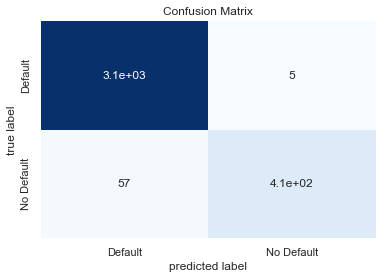


Recall Score
 0.8774193548387097

Precision Score
 0.9878934624697336

F1 Score
 0.929384965831435
Validation Acuracy Scores :
Accuracy:  0.976457399103139


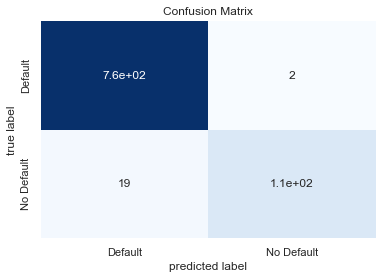


Recall Score
 0.8571428571428571

Precision Score
 0.9827586206896551

F1 Score
 0.9156626506024097


In [293]:
Dataset="Stemmed TF Vectors(Reduced) + Heuristic Features"
Model="Logistic Regression"
logit=LogisticRegression()
logit.fit(X_train,y_train)
y_pred_train=logit.predict(X_train)
y_pred_valid=logit.predict(X_valid)
print("Training Acuracy Scores :")
accuracy_scores(y_train,y_pred_train)
print("Validation Acuracy Scores :")
accuracy_scores(y_valid,y_pred_valid)
results.loc[len(results),]=[Dataset,Model,accuracy_score(y_valid,y_pred_valid),precision_score(y_valid,y_pred_valid),recall_score(y_valid,y_pred_valid),f1_score(y_valid,y_pred_valid)]

In [294]:
results

Dataset  \
0                                 Stemmed TF Vectors   
1                                 Stemmed TF Vectors   
2                                 Stemmed TF Vectors   
3                                 Stemmed TF Vectors   
4                                 Stemmed TF Vectors   
5                                 Stemmed TF Vectors   
6                                 Stemmed TF Vectors   
7                                 Stemmed TF Vectors   
8                              Stemmed TFIDF Vectors   
9                              Stemmed TFIDF Vectors   
10                             Stemmed TFIDF Vectors   
11                             Stemmed TFIDF Vectors   
12                             Stemmed TFIDF Vectors   
13                             Stemmed TFIDF Vectors   
14                             Stemmed TFIDF Vectors   
15                             Stemmed TFIDF Vectors   
16                        Stemmed Doc2Vec embeddings   
17                        Stemmed Doc2Vec embeddings   
18                        Stemmed Doc2Vec embeddings   
19                        Stemmed Doc2Vec embeddings   
20                        Stemmed Doc2Vec embeddings   
21                        Stemmed Doc2Vec embeddings   
22                        Stemmed Doc2Vec embeddings   
23                        Stemmed Doc2Vec embeddings   
24   Stemmed Doc2Vec embeddings + Heuristic features   
25   Stemmed Doc2Vec embeddings + Heuristic features   
26   Stemmed Doc2Vec embeddings + Heuristic features   
27   Stemmed Doc2Vec embeddings + Heuristic features   
28   Stemmed Doc2Vec embeddings + Heuristic features   
29   Stemmed Doc2Vec embeddings + Heuristic features   
30   Stemmed Doc2Vec embeddings + Heuristic features   
31   Stemmed Doc2Vec embeddings + Heuristic features   
32                                Heuristic Features   
33                                Heuristic Features   
34                                Heuristic Features   
35                                Heuristic Features   
36                                Heuristic Features   
37                                Heuristic Features   
38                                Heuristic Features   
39                                Heuristic Features   
40                                Heuristic Features   
41           Stemmed TF Vectors + Heuristic Features   
42           Stemmed TF Vectors + Heuristic Features   
43           Stemmed TF Vectors + Heuristic Features   
44           Stemmed TF Vectors + Heuristic Features   
45           Stemmed TF Vectors + Heuristic Features   
46           Stemmed TF Vectors + Heuristic Features   
47           Stemmed TF Vectors + Heuristic Features   
48           Stemmed TF Vectors + Heuristic Features   
49  Stemmed TF Vectors(Reduced) + Heuristic Features   
50  Stemmed TF Vectors(Reduced) + Heuristic Features   

                            Model  Accuracy Precision    Recall  F1-Score  
0          DecisionTreeClassifier  0.955157  0.859649  0.803279  0.830508  
1             Logistic Regression  0.980942  0.990654  0.868852  0.925764  
2                   Random Forest  0.966368       1.0   0.76378  0.866071  
3           Bagging Random Forest  0.956278       1.0  0.692913  0.818605  
4              Adaoost Classifier  0.979821       1.0  0.858268  0.923729  
5   Gradeient Boosting Classifier  0.951794  0.988372  0.669291  0.798122  
6                  KNN Classifier  0.887892       1.0  0.212598  0.350649  
7                  SVM Classifier  0.970852       1.0  0.795276  0.885965  
8          DecisionTreeClassifier  0.942825  0.840708  0.742188  0.788382  
9             Logistic Regression  0.929372  0.986842  0.547445  0.704225  
10                  Random Forest  0.974215       1.0  0.776699  0.874317  
11          Bagging Random Forest  0.970852       1.0  0.747573  0.855556  
12            Adaboost Classifier  0.969731  0.913043  0.815534  0.861538  
13  Gradeient Boosting Classifier  0.956278  0.932432  0.669903  0.7

In [295]:
# Random Forest

In [296]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
X_train,X_valid,y_train,y_valid=train_test_split(X_train,y_train,test_size=0.2)

Training Acuracy Scores :
Accuracy:  0.9983169705469845


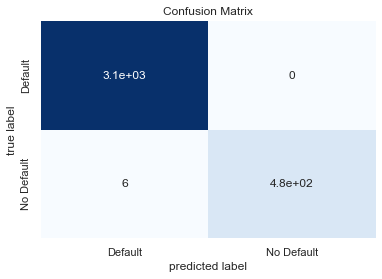


Recall Score
 0.987603305785124

Precision Score
 1.0

F1 Score
 0.9937629937629938
Validation Acuracy Scores :
Accuracy:  0.9831838565022422


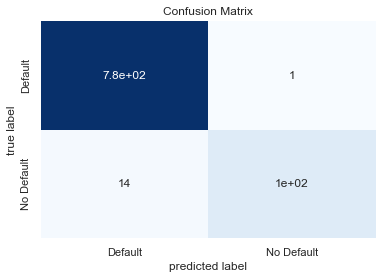


Recall Score
 0.8771929824561403

Precision Score
 0.9900990099009901

F1 Score
 0.9302325581395348


In [297]:
Dataset="Stemmed TF Vectors(Reduced) + Heuristic Features"
Model="Random Forest"
model=RandomForestClassifier()
model.fit(X_train,y_train)
y_pred_train=model.predict(X_train)
y_pred_valid=model.predict(X_valid)
print("Training Acuracy Scores :")
accuracy_scores(y_train,y_pred_train)
print("Validation Acuracy Scores :")
accuracy_scores(y_valid,y_pred_valid)
results.loc[len(results),]=[Dataset,Model,accuracy_score(y_valid,y_pred_valid),precision_score(y_valid,y_pred_valid),recall_score(y_valid,y_pred_valid),f1_score(y_valid,y_pred_valid)]

In [298]:
# Bagging with Random Forest

Training Acuracy Scores :
Accuracy:  0.9904628330995793


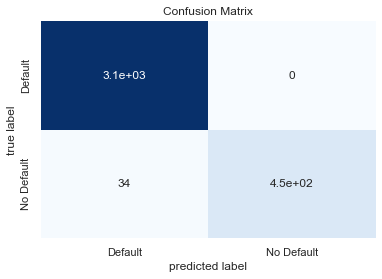


Recall Score
 0.9297520661157025

Precision Score
 1.0

F1 Score
 0.9635974304068523
Validation Acuracy Scores :
Accuracy:  0.9798206278026906


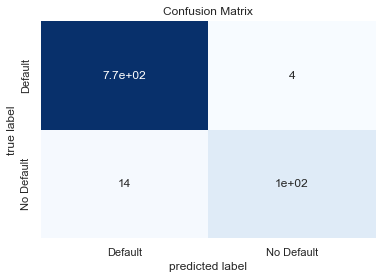


Recall Score
 0.8771929824561403

Precision Score
 0.9615384615384616

F1 Score
 0.9174311926605504


In [299]:
Dataset="Stemmed TF Vectors(Reduced) + Heuristic Features"
Model="Bagging Random Forest"
model=BaggingClassifier(RandomForestClassifier())
model.fit(X_train,y_train)
y_pred_train=model.predict(X_train)
y_pred_valid=model.predict(X_valid)
print("Training Acuracy Scores :")
accuracy_scores(y_train,y_pred_train)
print("Validation Acuracy Scores :")
accuracy_scores(y_valid,y_pred_valid)
results.loc[len(results),]=[Dataset,Model,accuracy_score(y_valid,y_pred_valid),precision_score(y_valid,y_pred_valid),recall_score(y_valid,y_pred_valid),f1_score(y_valid,y_pred_valid)]

In [300]:
# Adaboost Classifier

Training Acuracy Scores :
Accuracy:  0.9837307152875175


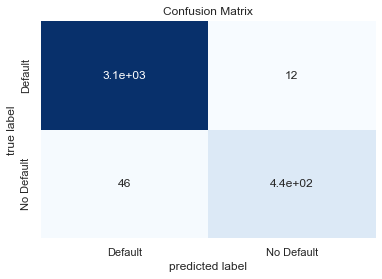


Recall Score
 0.9049586776859504

Precision Score
 0.9733333333333334

F1 Score
 0.9379014989293362
Validation Acuracy Scores :
Accuracy:  0.9742152466367713


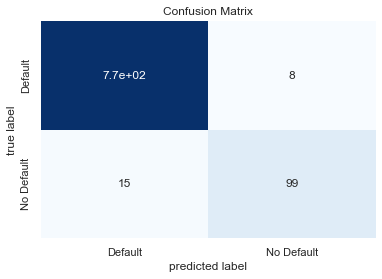


Recall Score
 0.868421052631579

Precision Score
 0.9252336448598131

F1 Score
 0.8959276018099548


In [301]:
Dataset="Stemmed TF Vectors(Reduced) + Heuristic Features"
Model="Adaboost Classifier"
model=AdaBoostClassifier(n_estimators=100)
model.fit(X_train,y_train)
y_pred_train=model.predict(X_train)
y_pred_valid=model.predict(X_valid)
print("Training Acuracy Scores :")
accuracy_scores(y_train,y_pred_train)
print("Validation Acuracy Scores :")
accuracy_scores(y_valid,y_pred_valid)
results.loc[len(results),]=[Dataset,Model,accuracy_score(y_valid,y_pred_valid),precision_score(y_valid,y_pred_valid),recall_score(y_valid,y_pred_valid),f1_score(y_valid,y_pred_valid)]

In [302]:
results

Dataset  \
0                                 Stemmed TF Vectors   
1                                 Stemmed TF Vectors   
2                                 Stemmed TF Vectors   
3                                 Stemmed TF Vectors   
4                                 Stemmed TF Vectors   
5                                 Stemmed TF Vectors   
6                                 Stemmed TF Vectors   
7                                 Stemmed TF Vectors   
8                              Stemmed TFIDF Vectors   
9                              Stemmed TFIDF Vectors   
10                             Stemmed TFIDF Vectors   
11                             Stemmed TFIDF Vectors   
12                             Stemmed TFIDF Vectors   
13                             Stemmed TFIDF Vectors   
14                             Stemmed TFIDF Vectors   
15                             Stemmed TFIDF Vectors   
16                        Stemmed Doc2Vec embeddings   
17                        Stemmed Doc2Vec embeddings   
18                        Stemmed Doc2Vec embeddings   
19                        Stemmed Doc2Vec embeddings   
20                        Stemmed Doc2Vec embeddings   
21                        Stemmed Doc2Vec embeddings   
22                        Stemmed Doc2Vec embeddings   
23                        Stemmed Doc2Vec embeddings   
24   Stemmed Doc2Vec embeddings + Heuristic features   
25   Stemmed Doc2Vec embeddings + Heuristic features   
26   Stemmed Doc2Vec embeddings + Heuristic features   
27   Stemmed Doc2Vec embeddings + Heuristic features   
28   Stemmed Doc2Vec embeddings + Heuristic features   
29   Stemmed Doc2Vec embeddings + Heuristic features   
30   Stemmed Doc2Vec embeddings + Heuristic features   
31   Stemmed Doc2Vec embeddings + Heuristic features   
32                                Heuristic Features   
33                                Heuristic Features   
34                                Heuristic Features   
35                                Heuristic Features   
36                                Heuristic Features   
37                                Heuristic Features   
38                                Heuristic Features   
39                                Heuristic Features   
40                                Heuristic Features   
41           Stemmed TF Vectors + Heuristic Features   
42           Stemmed TF Vectors + Heuristic Features   
43           Stemmed TF Vectors + Heuristic Features   
44           Stemmed TF Vectors + Heuristic Features   
45           Stemmed TF Vectors + Heuristic Features   
46           Stemmed TF Vectors + Heuristic Features   
47           Stemmed TF Vectors + Heuristic Features   
48           Stemmed TF Vectors + Heuristic Features   
49  Stemmed TF Vectors(Reduced) + Heuristic Features   
50  Stemmed TF Vectors(Reduced) + Heuristic Features   
51  Stemmed TF Vectors(Reduced) + Heuristic Features   
52  Stemmed TF Vectors(Reduced) + Heuristic Features   
53  Stemmed TF Vectors(Reduced) + Heuristic Features   

                            Model  Accuracy Precision    Recall  F1-Score  
0          DecisionTreeClassifier  0.955157  0.859649  0.803279  0.830508  
1             Logistic Regression  0.980942  0.990654  0.868852  0.925764  
2                   Random Forest  0.966368       1.0   0.76378  0.866071  
3           Bagging Random Forest  0.956278       1.0  0.692913  0.818605  
4              Adaoost Classifier  0.979821       1.0  0.858268  0.923729  
5   Gradeient Boosting Classifier  0.951794  0.988372  0.669291  0.798122  
6                  KNN Classifier  0.887892       1.0  0.212598  0.350649  
7                  SVM Classifier  0.970852       1.0  0.795276  0.885965  
8          DecisionTreeClassifier  0.942825  0.840708  0.742188  0.788382  
9             Logistic Regression  0.929372  0.986842  0.547445  0.704225  
10                  Random Forest  0.974215       1.0  0.776699  0.874317  
11          Bagging Random Forest  0.970852       1.

In [303]:
#Gradeient Boosting

Training Acuracy Scores :
Accuracy:  0.9840112201963535


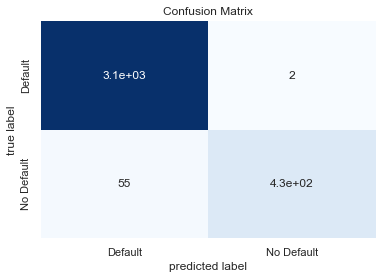


Recall Score
 0.8863636363636364

Precision Score
 0.9953596287703016

F1 Score
 0.9377049180327869
Validation Acuracy Scores :
Accuracy:  0.9786995515695067


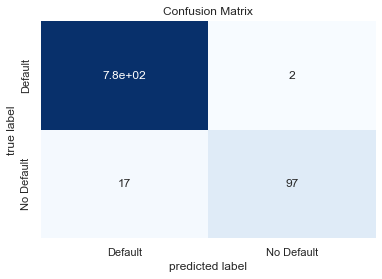


Recall Score
 0.8508771929824561

Precision Score
 0.9797979797979798

F1 Score
 0.9107981220657276


Dataset  \
0                                 Stemmed TF Vectors   
1                                 Stemmed TF Vectors   
2                                 Stemmed TF Vectors   
3                                 Stemmed TF Vectors   
4                                 Stemmed TF Vectors   
5                                 Stemmed TF Vectors   
6                                 Stemmed TF Vectors   
7                                 Stemmed TF Vectors   
8                              Stemmed TFIDF Vectors   
9                              Stemmed TFIDF Vectors   
10                             Stemmed TFIDF Vectors   
11                             Stemmed TFIDF Vectors   
12                             Stemmed TFIDF Vectors   
13                             Stemmed TFIDF Vectors   
14                             Stemmed TFIDF Vectors   
15                             Stemmed TFIDF Vectors   
16                        Stemmed Doc2Vec embeddings   
17                        Stemmed Doc2Vec embeddings   
18                        Stemmed Doc2Vec embeddings   
19                        Stemmed Doc2Vec embeddings   
20                        Stemmed Doc2Vec embeddings   
21                        Stemmed Doc2Vec embeddings   
22                        Stemmed Doc2Vec embeddings   
23                        Stemmed Doc2Vec embeddings   
24   Stemmed Doc2Vec embeddings + Heuristic features   
25   Stemmed Doc2Vec embeddings + Heuristic features   
26   Stemmed Doc2Vec embeddings + Heuristic features   
27   Stemmed Doc2Vec embeddings + Heuristic features   
28   Stemmed Doc2Vec embeddings + Heuristic features   
29   Stemmed Doc2Vec embeddings + Heuristic features   
30   Stemmed Doc2Vec embeddings + Heuristic features   
31   Stemmed Doc2Vec embeddings + Heuristic features   
32                                Heuristic Features   
33                                Heuristic Features   
34                                Heuristic Features   
35                                Heuristic Features   
36                                Heuristic Features   
37                                Heuristic Features   
38                                Heuristic Features   
39                                Heuristic Features   
40                                Heuristic Features   
41           Stemmed TF Vectors + Heuristic Features   
42           Stemmed TF Vectors + Heuristic Features   
43           Stemmed TF Vectors + Heuristic Features   
44           Stemmed TF Vectors + Heuristic Features   
45           Stemmed TF Vectors + Heuristic Features   
46           Stemmed TF Vectors + Heuristic Features   
47           Stemmed TF Vectors + Heuristic Features   
48           Stemmed TF Vectors + Heuristic Features   
49  Stemmed TF Vectors(Reduced) + Heuristic Features   
50  Stemmed TF Vectors(Reduced) + Heuristic Features   
51  Stemmed TF Vectors(Reduced) + Heuristic Features   
52  Stemmed TF Vectors(Reduced) + Heuristic Features   
53  Stemmed TF Vectors(Reduced) + Heuristic Features   
54  Stemmed TF Vectors(Reduced) + Heuristic Features   

                            Model  Accuracy Precision    Recall  F1-Score  
0          DecisionTreeClassifier  0.955157  0.859649  0.803279  0.830508  
1             Logistic Regression  0.980942  0.990654  0.868852  0.925764  
2                   Random Forest  0.966368       1.0   0.76378  0.866071  
3           Bagging Random Forest  0.956278       1.0  0.692913  0.818605  
4              Adaoost Classifier  0.979821       1.0  0.858268  0.923729  
5   Gradeient Boosting Classifier  0.951794  0.988372  0.669291  0.798122  
6                  KNN Classifier  0.887892       1.0  0.212598  0.350649  
7                  SVM Classifier  0.970852       1.0  0.795276  0.885965  
8          DecisionTreeClassifier  0.942825  0.840708  0.742188  0.788382  
9             Logistic Regression  0.929372  0.986842  0.547445  0.704225  
10                  Random Forest  0.974215       1.0  0.776699  0.87431

In [304]:
Dataset="Stemmed TF Vectors(Reduced) + Heuristic Features"
Model="Gradeient Boosting Classifier"
model=GradientBoostingClassifier()
model.fit(X_train,y_train)
y_pred_train=model.predict(X_train)
y_pred_valid=model.predict(X_valid)
print("Training Acuracy Scores :")
accuracy_scores(y_train,y_pred_train)
print("Validation Acuracy Scores :")
accuracy_scores(y_valid,y_pred_valid)
results.loc[len(results),]=[Dataset,Model,accuracy_score(y_valid,y_pred_valid),precision_score(y_valid,y_pred_valid),recall_score(y_valid,y_pred_valid),f1_score(y_valid,y_pred_valid)]
results

Training Acuracy Scores :
Accuracy:  0.9495091164095372


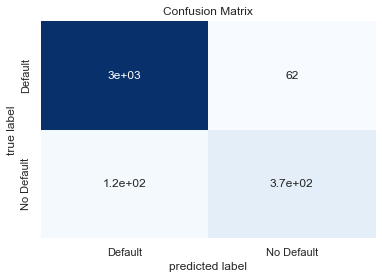


Recall Score
 0.756198347107438

Precision Score
 0.8551401869158879

F1 Score
 0.8026315789473685
Validation Acuracy Scores :
Accuracy:  0.929372197309417


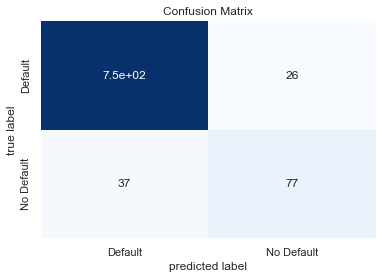


Recall Score
 0.6754385964912281

Precision Score
 0.7475728155339806

F1 Score
 0.7096774193548386


Dataset  \
0                                 Stemmed TF Vectors   
1                                 Stemmed TF Vectors   
2                                 Stemmed TF Vectors   
3                                 Stemmed TF Vectors   
4                                 Stemmed TF Vectors   
5                                 Stemmed TF Vectors   
6                                 Stemmed TF Vectors   
7                                 Stemmed TF Vectors   
8                              Stemmed TFIDF Vectors   
9                              Stemmed TFIDF Vectors   
10                             Stemmed TFIDF Vectors   
11                             Stemmed TFIDF Vectors   
12                             Stemmed TFIDF Vectors   
13                             Stemmed TFIDF Vectors   
14                             Stemmed TFIDF Vectors   
15                             Stemmed TFIDF Vectors   
16                        Stemmed Doc2Vec embeddings   
17                        Stemmed Doc2Vec embeddings   
18                        Stemmed Doc2Vec embeddings   
19                        Stemmed Doc2Vec embeddings   
20                        Stemmed Doc2Vec embeddings   
21                        Stemmed Doc2Vec embeddings   
22                        Stemmed Doc2Vec embeddings   
23                        Stemmed Doc2Vec embeddings   
24   Stemmed Doc2Vec embeddings + Heuristic features   
25   Stemmed Doc2Vec embeddings + Heuristic features   
26   Stemmed Doc2Vec embeddings + Heuristic features   
27   Stemmed Doc2Vec embeddings + Heuristic features   
28   Stemmed Doc2Vec embeddings + Heuristic features   
29   Stemmed Doc2Vec embeddings + Heuristic features   
30   Stemmed Doc2Vec embeddings + Heuristic features   
31   Stemmed Doc2Vec embeddings + Heuristic features   
32                                Heuristic Features   
33                                Heuristic Features   
34                                Heuristic Features   
35                                Heuristic Features   
36                                Heuristic Features   
37                                Heuristic Features   
38                                Heuristic Features   
39                                Heuristic Features   
40                                Heuristic Features   
41           Stemmed TF Vectors + Heuristic Features   
42           Stemmed TF Vectors + Heuristic Features   
43           Stemmed TF Vectors + Heuristic Features   
44           Stemmed TF Vectors + Heuristic Features   
45           Stemmed TF Vectors + Heuristic Features   
46           Stemmed TF Vectors + Heuristic Features   
47           Stemmed TF Vectors + Heuristic Features   
48           Stemmed TF Vectors + Heuristic Features   
49  Stemmed TF Vectors(Reduced) + Heuristic Features   
50  Stemmed TF Vectors(Reduced) + Heuristic Features   
51  Stemmed TF Vectors(Reduced) + Heuristic Features   
52  Stemmed TF Vectors(Reduced) + Heuristic Features   
53  Stemmed TF Vectors(Reduced) + Heuristic Features   
54  Stemmed TF Vectors(Reduced) + Heuristic Features   
55  Stemmed TF Vectors(Reduced) + Heuristic Features   

                            Model  Accuracy Precision    Recall  F1-Score  
0          DecisionTreeClassifier  0.955157  0.859649  0.803279  0.830508  
1             Logistic Regression  0.980942  0.990654  0.868852  0.925764  
2                   Random Forest  0.966368       1.0   0.76378  0.866071  
3           Bagging Random Forest  0.956278       1.0  0.692913  0.818605  
4              Adaoost Classifier  0.979821       1.0  0.858268  0.923729  
5   Gradeient Boosting Classifier  0.951794  0.988372  0.669291  0.798122  
6                  KNN Classifier  0.887892       1.0  0.212598  0.350649  
7                  SVM Classifier  0.970852       1.0  0.795276  0.885965  
8          DecisionTreeClassifier  0.942825  0.840708  0.742188  0.788382  
9             Logistic Regression  0.929372  0.986842  0.547445  0.704225  
10              

In [305]:
Dataset="Stemmed TF Vectors(Reduced) + Heuristic Features"
Model="KNN Classifier"
model=KNeighborsClassifier()
model.fit(X_train,y_train)
y_pred_train=model.predict(X_train)
y_pred_valid=model.predict(X_valid)
print("Training Acuracy Scores :")
accuracy_scores(y_train,y_pred_train)
print("Validation Acuracy Scores :")
accuracy_scores(y_valid,y_pred_valid)
results.loc[len(results),]=[Dataset,Model,accuracy_score(y_valid,y_pred_valid),precision_score(y_valid,y_pred_valid),recall_score(y_valid,y_pred_valid),f1_score(y_valid,y_pred_valid)]
results

Training Acuracy Scores :
Accuracy:  0.9349228611500702


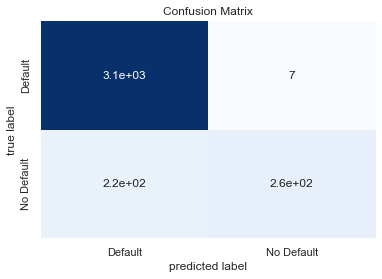


Recall Score
 0.5351239669421488

Precision Score
 0.9736842105263158

F1 Score
 0.6906666666666668
Validation Acuracy Scores :
Accuracy:  0.9360986547085202


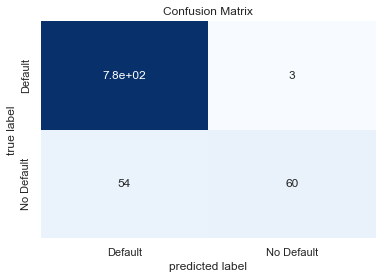


Recall Score
 0.5263157894736842

Precision Score
 0.9523809523809523

F1 Score
 0.6779661016949152


Dataset  \
0                                 Stemmed TF Vectors   
1                                 Stemmed TF Vectors   
2                                 Stemmed TF Vectors   
3                                 Stemmed TF Vectors   
4                                 Stemmed TF Vectors   
5                                 Stemmed TF Vectors   
6                                 Stemmed TF Vectors   
7                                 Stemmed TF Vectors   
8                              Stemmed TFIDF Vectors   
9                              Stemmed TFIDF Vectors   
10                             Stemmed TFIDF Vectors   
11                             Stemmed TFIDF Vectors   
12                             Stemmed TFIDF Vectors   
13                             Stemmed TFIDF Vectors   
14                             Stemmed TFIDF Vectors   
15                             Stemmed TFIDF Vectors   
16                        Stemmed Doc2Vec embeddings   
17                        Stemmed Doc2Vec embeddings   
18                        Stemmed Doc2Vec embeddings   
19                        Stemmed Doc2Vec embeddings   
20                        Stemmed Doc2Vec embeddings   
21                        Stemmed Doc2Vec embeddings   
22                        Stemmed Doc2Vec embeddings   
23                        Stemmed Doc2Vec embeddings   
24   Stemmed Doc2Vec embeddings + Heuristic features   
25   Stemmed Doc2Vec embeddings + Heuristic features   
26   Stemmed Doc2Vec embeddings + Heuristic features   
27   Stemmed Doc2Vec embeddings + Heuristic features   
28   Stemmed Doc2Vec embeddings + Heuristic features   
29   Stemmed Doc2Vec embeddings + Heuristic features   
30   Stemmed Doc2Vec embeddings + Heuristic features   
31   Stemmed Doc2Vec embeddings + Heuristic features   
32                                Heuristic Features   
33                                Heuristic Features   
34                                Heuristic Features   
35                                Heuristic Features   
36                                Heuristic Features   
37                                Heuristic Features   
38                                Heuristic Features   
39                                Heuristic Features   
40                                Heuristic Features   
41           Stemmed TF Vectors + Heuristic Features   
42           Stemmed TF Vectors + Heuristic Features   
43           Stemmed TF Vectors + Heuristic Features   
44           Stemmed TF Vectors + Heuristic Features   
45           Stemmed TF Vectors + Heuristic Features   
46           Stemmed TF Vectors + Heuristic Features   
47           Stemmed TF Vectors + Heuristic Features   
48           Stemmed TF Vectors + Heuristic Features   
49  Stemmed TF Vectors(Reduced) + Heuristic Features   
50  Stemmed TF Vectors(Reduced) + Heuristic Features   
51  Stemmed TF Vectors(Reduced) + Heuristic Features   
52  Stemmed TF Vectors(Reduced) + Heuristic Features   
53  Stemmed TF Vectors(Reduced) + Heuristic Features   
54  Stemmed TF Vectors(Reduced) + Heuristic Features   
55  Stemmed TF Vectors(Reduced) + Heuristic Features   
56  Stemmed TF Vectors(Reduced) + Heuristic Features   

                            Model  Accuracy Precision    Recall  F1-Score  
0          DecisionTreeClassifier  0.955157  0.859649  0.803279  0.830508  
1             Logistic Regression  0.980942  0.990654  0.868852  0.925764  
2                   Random Forest  0.966368       1.0   0.76378  0.866071  
3           Bagging Random Forest  0.956278       1.0  0.692913  0.818605  
4              Adaoost Classifier  0.979821       1.0  0.858268  0.923729  
5   Gradeient Boosting Classifier  0.951794  0.988372  0.669291  0.798122  
6                  KNN Classifier  0.887892       1.0  0.212598  0.350649  
7                  SVM Classifier  0.970852       1.0  0.795276  0.885965  
8          DecisionTreeClassifier  0.942825  0.840708  0.742188  0.788382  
9             Logistic Regression  0

In [306]:
Dataset="Stemmed TF Vectors(Reduced) + Heuristic Features"
Model="SVM Classifier"
model=SVC()
model.fit(X_train,y_train)
y_pred_train=model.predict(X_train)
y_pred_valid=model.predict(X_valid)
print("Training Acuracy Scores :")
accuracy_scores(y_train,y_pred_train)
print("Validation Acuracy Scores :")
accuracy_scores(y_valid,y_pred_valid)
results.loc[len(results),]=[Dataset,Model,accuracy_score(y_valid,y_pred_valid),precision_score(y_valid,y_pred_valid),recall_score(y_valid,y_pred_valid),f1_score(y_valid,y_pred_valid)]
results

In [307]:
results.to_csv("results.csv",index=False)
results

Dataset  \
0                                 Stemmed TF Vectors   
1                                 Stemmed TF Vectors   
2                                 Stemmed TF Vectors   
3                                 Stemmed TF Vectors   
4                                 Stemmed TF Vectors   
5                                 Stemmed TF Vectors   
6                                 Stemmed TF Vectors   
7                                 Stemmed TF Vectors   
8                              Stemmed TFIDF Vectors   
9                              Stemmed TFIDF Vectors   
10                             Stemmed TFIDF Vectors   
11                             Stemmed TFIDF Vectors   
12                             Stemmed TFIDF Vectors   
13                             Stemmed TFIDF Vectors   
14                             Stemmed TFIDF Vectors   
15                             Stemmed TFIDF Vectors   
16                        Stemmed Doc2Vec embeddings   
17                        Stemmed Doc2Vec embeddings   
18                        Stemmed Doc2Vec embeddings   
19                        Stemmed Doc2Vec embeddings   
20                        Stemmed Doc2Vec embeddings   
21                        Stemmed Doc2Vec embeddings   
22                        Stemmed Doc2Vec embeddings   
23                        Stemmed Doc2Vec embeddings   
24   Stemmed Doc2Vec embeddings + Heuristic features   
25   Stemmed Doc2Vec embeddings + Heuristic features   
26   Stemmed Doc2Vec embeddings + Heuristic features   
27   Stemmed Doc2Vec embeddings + Heuristic features   
28   Stemmed Doc2Vec embeddings + Heuristic features   
29   Stemmed Doc2Vec embeddings + Heuristic features   
30   Stemmed Doc2Vec embeddings + Heuristic features   
31   Stemmed Doc2Vec embeddings + Heuristic features   
32                                Heuristic Features   
33                                Heuristic Features   
34                                Heuristic Features   
35                                Heuristic Features   
36                                Heuristic Features   
37                                Heuristic Features   
38                                Heuristic Features   
39                                Heuristic Features   
40                                Heuristic Features   
41           Stemmed TF Vectors + Heuristic Features   
42           Stemmed TF Vectors + Heuristic Features   
43           Stemmed TF Vectors + Heuristic Features   
44           Stemmed TF Vectors + Heuristic Features   
45           Stemmed TF Vectors + Heuristic Features   
46           Stemmed TF Vectors + Heuristic Features   
47           Stemmed TF Vectors + Heuristic Features   
48           Stemmed TF Vectors + Heuristic Features   
49  Stemmed TF Vectors(Reduced) + Heuristic Features   
50  Stemmed TF Vectors(Reduced) + Heuristic Features   
51  Stemmed TF Vectors(Reduced) + Heuristic Features   
52  Stemmed TF Vectors(Reduced) + Heuristic Features   
53  Stemmed TF Vectors(Reduced) + Heuristic Features   
54  Stemmed TF Vectors(Reduced) + Heuristic Features   
55  Stemmed TF Vectors(Reduced) + Heuristic Features   
56  Stemmed TF Vectors(Reduced) + Heuristic Features   

                            Model  Accuracy Precision    Recall  F1-Score  
0          DecisionTreeClassifier  0.955157  0.859649  0.803279  0.830508  
1             Logistic Regression  0.980942  0.990654  0.868852  0.925764  
2                   Random Forest  0.966368       1.0   0.76378  0.866071  
3           Bagging Random Forest  0.956278       1.0  0.692913  0.818605  
4              Adaoost Classifier  0.979821       1.0  0.858268  0.923729  
5   Gradeient Boosting Classifier  0.951794  0.988372  0.669291  0.798122  
6                  KNN Classifier  0.887892       1.0  0.212598  0.350649  
7                  SVM Classifier  0.970852       1.0  0.795276  0.885965  
8          DecisionTreeClassifier  0.942825  0.840708  0.742188  0.788382  
9             Logistic Regression  0

## Models on Stemmed TF Vectors(Highly Reduced) + Heuristic Features

In [309]:
X=pd.concat([DTM2,hurestic_features],axis=1)
Y=df.Labels

In [310]:
X

(call,)  (get,)  (go,)  (im,)  (ltgt,)  (now,)  (ok,)  (see,)  (send,)  \
0           0       0      1      0        0       0      0       0        0   
1           0       0      0      0        0       0      1       0        0   
2           0       0      0      0        0       0      0       0        0   
3           0       0      0      0        0       0      0       0        0   
4           0       0      0      0        0       0      0       0        0   
...       ...     ...    ...    ...      ...     ...    ...     ...      ...   
5567        1       0      0      0        0       0      0       0        0   
5568        0       0      1      0        0       0      0       0        0   
5569        0       0      0      0        0       0      0       0        0   
5570        0       0      0      0        0       0      0       0        0   
5571        0       0      0      0        0       0      0       0        0   

      (sorri,)  ...  (work,)  (ye,)  (yeah,)  (year,)  (you,)  \
0            0  ...        0      0        0        0       0   
1            0  ...        0      0        0        0       0   
2            0  ...        0      0        0        0       0   
3            0  ...        0      0        0        0       0   
4            0  ...        0      0        0        0       0   
...        ...  ...      ...    ...      ...      ...     ...   
5567         0  ...        0      0        0        0       0   
5568         0  ...        0      0        0        0       0   
5569         0  ...        0      0        0        0       0   
5570         0  ...        0      0        0        0       0   
5571         0  ...        0      0        0        0       0   

      FirstWord_upper  Phone_num  suspicious_words  percent_stopWords  \
0                   0          0                 0               20.0   
1                   0          0                 0                0.0   
2                   0          1                 0          17.857143   
3                   1          0                 0          18.181818   
4                   0          0                 0          38.461538   
...               ...        ...               ...                ...   
5567                0          1                 1          26.666667   
5568                0          0                 0               12.5   
5569                0          0                 0               40.0   
5570                0          0                 0          38.461538   
5571                0          0                 0          33.333333   

      Length_of_SMS  
0                20  
1                 6  
2                28  
3                11  
4                13  
...             ...  
5567             30  
5568              8  
5569             10  
5570             26  
5571              6  

[5572 rows x 38 columns]

In [311]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
X_train,X_valid,y_train,y_valid=train_test_split(X_train,y_train,test_size=0.2)

Training Acuracy Scores :
Accuracy:  0.9955119214586255


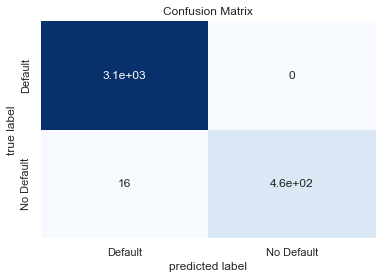


Recall Score
 0.9661016949152542

Precision Score
 1.0

F1 Score
 0.9827586206896551
Validation Acuracy Scores :
Accuracy:  0.9585201793721974


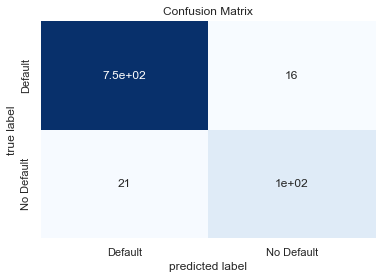


Recall Score
 0.8333333333333334

Precision Score
 0.8677685950413223

F1 Score
 0.8502024291497975


In [312]:
Dataset="Stemmed TF Vectors(Highly Reduced) + Heuristic Features"
Model="DecisionTreeClassifier"
tree=DecisionTreeClassifier(criterion='entropy')
tree.fit(X_train,y_train)
y_pred_train=tree.predict(X_train)
y_pred_valid=tree.predict(X_valid)
print("Training Acuracy Scores :")
accuracy_scores(y_train,y_pred_train)
print("Validation Acuracy Scores :")
accuracy_scores(y_valid,y_pred_valid)
results.loc[len(results),]=[Dataset,Model,accuracy_score(y_valid,y_pred_valid),precision_score(y_valid,y_pred_valid),recall_score(y_valid,y_pred_valid),f1_score(y_valid,y_pred_valid)]

In [313]:
# results.loc[len(results),:]=[Dataset,Model,accuracy_score(y_valid,y_pred_valid),precision_score(y_valid,y_pred_valid),recall_score(y_valid,y_pred_valid),f1_score(y_valid,y_pred_valid)]
results

Dataset  \
0                                  Stemmed TF Vectors   
1                                  Stemmed TF Vectors   
2                                  Stemmed TF Vectors   
3                                  Stemmed TF Vectors   
4                                  Stemmed TF Vectors   
5                                  Stemmed TF Vectors   
6                                  Stemmed TF Vectors   
7                                  Stemmed TF Vectors   
8                               Stemmed TFIDF Vectors   
9                               Stemmed TFIDF Vectors   
10                              Stemmed TFIDF Vectors   
11                              Stemmed TFIDF Vectors   
12                              Stemmed TFIDF Vectors   
13                              Stemmed TFIDF Vectors   
14                              Stemmed TFIDF Vectors   
15                              Stemmed TFIDF Vectors   
16                         Stemmed Doc2Vec embeddings   
17                         Stemmed Doc2Vec embeddings   
18                         Stemmed Doc2Vec embeddings   
19                         Stemmed Doc2Vec embeddings   
20                         Stemmed Doc2Vec embeddings   
21                         Stemmed Doc2Vec embeddings   
22                         Stemmed Doc2Vec embeddings   
23                         Stemmed Doc2Vec embeddings   
24    Stemmed Doc2Vec embeddings + Heuristic features   
25    Stemmed Doc2Vec embeddings + Heuristic features   
26    Stemmed Doc2Vec embeddings + Heuristic features   
27    Stemmed Doc2Vec embeddings + Heuristic features   
28    Stemmed Doc2Vec embeddings + Heuristic features   
29    Stemmed Doc2Vec embeddings + Heuristic features   
30    Stemmed Doc2Vec embeddings + Heuristic features   
31    Stemmed Doc2Vec embeddings + Heuristic features   
32                                 Heuristic Features   
33                                 Heuristic Features   
34                                 Heuristic Features   
35                                 Heuristic Features   
36                                 Heuristic Features   
37                                 Heuristic Features   
38                                 Heuristic Features   
39                                 Heuristic Features   
40                                 Heuristic Features   
41            Stemmed TF Vectors + Heuristic Features   
42            Stemmed TF Vectors + Heuristic Features   
43            Stemmed TF Vectors + Heuristic Features   
44            Stemmed TF Vectors + Heuristic Features   
45            Stemmed TF Vectors + Heuristic Features   
46            Stemmed TF Vectors + Heuristic Features   
47            Stemmed TF Vectors + Heuristic Features   
48            Stemmed TF Vectors + Heuristic Features   
49   Stemmed TF Vectors(Reduced) + Heuristic Features   
50   Stemmed TF Vectors(Reduced) + Heuristic Features   
51   Stemmed TF Vectors(Reduced) + Heuristic Features   
52   Stemmed TF Vectors(Reduced) + Heuristic Features   
53   Stemmed TF Vectors(Reduced) + Heuristic Features   
54   Stemmed TF Vectors(Reduced) + Heuristic Features   
55   Stemmed TF Vectors(Reduced) + Heuristic Features   
56   Stemmed TF Vectors(Reduced) + Heuristic Features   
57  Stemmed TF Vectors(Highly Reduced) + Heuristic...   

                            Model  Accuracy Precision    Recall  F1-Score  
0          DecisionTreeClassifier  0.955157  0.859649  0.803279  0.830508  
1             Logistic Regression  0.980942  0.990654  0.868852  0.925764  
2                   Random Forest  0.966368       1.0   0.76378  0.866071  
3           Bagging Random Forest  0.956278       1.0  0.692913  0.818605  
4              Adaoost Classifier  0.979821       1.0  0.858268  0.923729  
5   Gradeient Boosting Classifier  0.951794  0.988372  0.669291  0.798122  
6                  KNN Classifier  0.887892       1.0  0.212598  0.350649  
7                  SVM Classifier  0.970852       1.0  0.795276  0.885965 

In [314]:
# Logistic Regression

In [315]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
X_train,X_valid,y_train,y_valid=train_test_split(X_train,y_train,test_size=0.2)

Training Acuracy Scores :
Accuracy:  0.9640953716690042


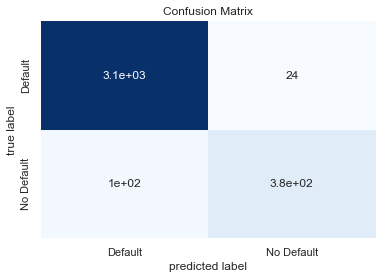


Recall Score
 0.7833333333333333

Precision Score
 0.94

F1 Score
 0.8545454545454546
Validation Acuracy Scores :
Accuracy:  0.9708520179372198


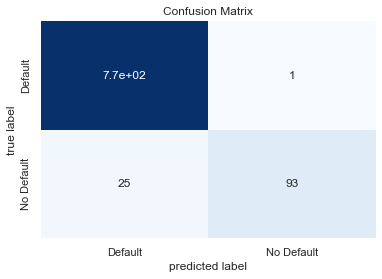


Recall Score
 0.788135593220339

Precision Score
 0.9893617021276596

F1 Score
 0.8773584905660378


In [316]:
Dataset="Stemmed TF Vectors(Highly Reduced) + Heuristic Features"
Model="Logistic Regression"
logit=LogisticRegression()
logit.fit(X_train,y_train)
y_pred_train=logit.predict(X_train)
y_pred_valid=logit.predict(X_valid)
print("Training Acuracy Scores :")
accuracy_scores(y_train,y_pred_train)
print("Validation Acuracy Scores :")
accuracy_scores(y_valid,y_pred_valid)
results.loc[len(results),]=[Dataset,Model,accuracy_score(y_valid,y_pred_valid),precision_score(y_valid,y_pred_valid),recall_score(y_valid,y_pred_valid),f1_score(y_valid,y_pred_valid)]

In [317]:
results

Dataset  \
0                                  Stemmed TF Vectors   
1                                  Stemmed TF Vectors   
2                                  Stemmed TF Vectors   
3                                  Stemmed TF Vectors   
4                                  Stemmed TF Vectors   
5                                  Stemmed TF Vectors   
6                                  Stemmed TF Vectors   
7                                  Stemmed TF Vectors   
8                               Stemmed TFIDF Vectors   
9                               Stemmed TFIDF Vectors   
10                              Stemmed TFIDF Vectors   
11                              Stemmed TFIDF Vectors   
12                              Stemmed TFIDF Vectors   
13                              Stemmed TFIDF Vectors   
14                              Stemmed TFIDF Vectors   
15                              Stemmed TFIDF Vectors   
16                         Stemmed Doc2Vec embeddings   
17                         Stemmed Doc2Vec embeddings   
18                         Stemmed Doc2Vec embeddings   
19                         Stemmed Doc2Vec embeddings   
20                         Stemmed Doc2Vec embeddings   
21                         Stemmed Doc2Vec embeddings   
22                         Stemmed Doc2Vec embeddings   
23                         Stemmed Doc2Vec embeddings   
24    Stemmed Doc2Vec embeddings + Heuristic features   
25    Stemmed Doc2Vec embeddings + Heuristic features   
26    Stemmed Doc2Vec embeddings + Heuristic features   
27    Stemmed Doc2Vec embeddings + Heuristic features   
28    Stemmed Doc2Vec embeddings + Heuristic features   
29    Stemmed Doc2Vec embeddings + Heuristic features   
30    Stemmed Doc2Vec embeddings + Heuristic features   
31    Stemmed Doc2Vec embeddings + Heuristic features   
32                                 Heuristic Features   
33                                 Heuristic Features   
34                                 Heuristic Features   
35                                 Heuristic Features   
36                                 Heuristic Features   
37                                 Heuristic Features   
38                                 Heuristic Features   
39                                 Heuristic Features   
40                                 Heuristic Features   
41            Stemmed TF Vectors + Heuristic Features   
42            Stemmed TF Vectors + Heuristic Features   
43            Stemmed TF Vectors + Heuristic Features   
44            Stemmed TF Vectors + Heuristic Features   
45            Stemmed TF Vectors + Heuristic Features   
46            Stemmed TF Vectors + Heuristic Features   
47            Stemmed TF Vectors + Heuristic Features   
48            Stemmed TF Vectors + Heuristic Features   
49   Stemmed TF Vectors(Reduced) + Heuristic Features   
50   Stemmed TF Vectors(Reduced) + Heuristic Features   
51   Stemmed TF Vectors(Reduced) + Heuristic Features   
52   Stemmed TF Vectors(Reduced) + Heuristic Features   
53   Stemmed TF Vectors(Reduced) + Heuristic Features   
54   Stemmed TF Vectors(Reduced) + Heuristic Features   
55   Stemmed TF Vectors(Reduced) + Heuristic Features   
56   Stemmed TF Vectors(Reduced) + Heuristic Features   
57  Stemmed TF Vectors(Highly Reduced) + Heuristic...   
58  Stemmed TF Vectors(Highly Reduced) + Heuristic...   

                            Model  Accuracy Precision    Recall  F1-Score  
0          DecisionTreeClassifier  0.955157  0.859649  0.803279  0.830508  
1             Logistic Regression  0.980942  0.990654  0.868852  0.925764  
2                   Random Forest  0.966368       1.0   0.76378  0.866071  
3           Bagging Random Forest  0.956278       1.0  0.692913  0.818605  
4              Adaoost Classifier  0.979821       1.0  0.858268  0.923729  
5   Gradeient Boosting Classifier  0.951794  0.988372  0.669291  0.798122  
6                  KNN Classifier  0.887892       1.0  0.212598  0.350649  
7                

In [318]:
# Random Forest

In [319]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
X_train,X_valid,y_train,y_valid=train_test_split(X_train,y_train,test_size=0.2)

Training Acuracy Scores :
Accuracy:  0.9952314165497896


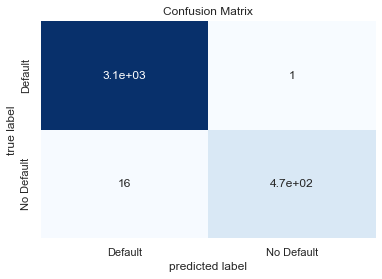


Recall Score
 0.9670103092783505

Precision Score
 0.997872340425532

F1 Score
 0.9821989528795811
Validation Acuracy Scores :
Accuracy:  0.9753363228699552


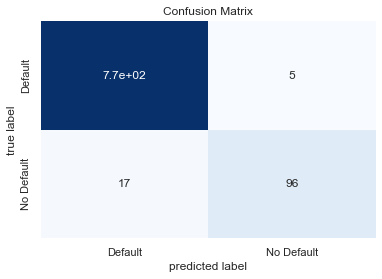


Recall Score
 0.8495575221238938

Precision Score
 0.9504950495049505

F1 Score
 0.897196261682243


In [320]:
Dataset="Stemmed TF Vectors(Highly Reduced) + Heuristic Features"
Model="Random Forest"
model=RandomForestClassifier()
model.fit(X_train,y_train)
y_pred_train=model.predict(X_train)
y_pred_valid=model.predict(X_valid)
print("Training Acuracy Scores :")
accuracy_scores(y_train,y_pred_train)
print("Validation Acuracy Scores :")
accuracy_scores(y_valid,y_pred_valid)
results.loc[len(results),]=[Dataset,Model,accuracy_score(y_valid,y_pred_valid),precision_score(y_valid,y_pred_valid),recall_score(y_valid,y_pred_valid),f1_score(y_valid,y_pred_valid)]

In [321]:
# Bagging with Random Forest

Training Acuracy Scores :
Accuracy:  0.988218793828892


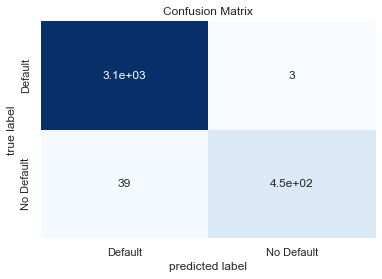


Recall Score
 0.9195876288659793

Precision Score
 0.9933184855233853

F1 Score
 0.9550321199143469
Validation Acuracy Scores :
Accuracy:  0.976457399103139


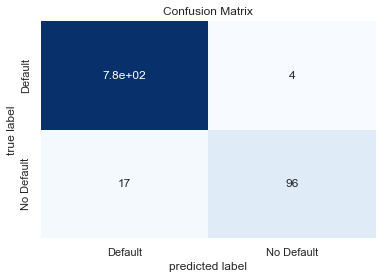


Recall Score
 0.8495575221238938

Precision Score
 0.96

F1 Score
 0.9014084507042253


In [322]:
Dataset="Stemmed TF Vectors(Highly Reduced) + Heuristic Features"
Model="Bagging Random Forest"
model=BaggingClassifier(RandomForestClassifier())
model.fit(X_train,y_train)
y_pred_train=model.predict(X_train)
y_pred_valid=model.predict(X_valid)
print("Training Acuracy Scores :")
accuracy_scores(y_train,y_pred_train)
print("Validation Acuracy Scores :")
accuracy_scores(y_valid,y_pred_valid)
results.loc[len(results),]=[Dataset,Model,accuracy_score(y_valid,y_pred_valid),precision_score(y_valid,y_pred_valid),recall_score(y_valid,y_pred_valid),f1_score(y_valid,y_pred_valid)]

In [323]:
# Adaboost Classifier

Training Acuracy Scores :
Accuracy:  0.9716690042075736


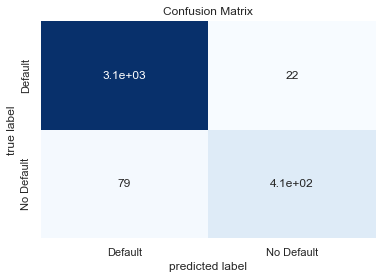


Recall Score
 0.8371134020618557

Precision Score
 0.9485981308411215

F1 Score
 0.8893756845564075
Validation Acuracy Scores :
Accuracy:  0.9674887892376681


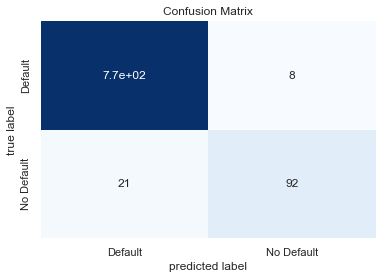


Recall Score
 0.8141592920353983

Precision Score
 0.92

F1 Score
 0.863849765258216


In [324]:
Dataset="Stemmed TF Vectors(Highly Reduced) + Heuristic Features"
Model="Adaboost Classifier"
model=AdaBoostClassifier(n_estimators=100)
model.fit(X_train,y_train)
y_pred_train=model.predict(X_train)
y_pred_valid=model.predict(X_valid)
print("Training Acuracy Scores :")
accuracy_scores(y_train,y_pred_train)
print("Validation Acuracy Scores :")
accuracy_scores(y_valid,y_pred_valid)
results.loc[len(results),]=[Dataset,Model,accuracy_score(y_valid,y_pred_valid),precision_score(y_valid,y_pred_valid),recall_score(y_valid,y_pred_valid),f1_score(y_valid,y_pred_valid)]

In [325]:
results

Dataset                   Model  \
0                                  Stemmed TF Vectors  DecisionTreeClassifier   
1                                  Stemmed TF Vectors     Logistic Regression   
2                                  Stemmed TF Vectors           Random Forest   
3                                  Stemmed TF Vectors   Bagging Random Forest   
4                                  Stemmed TF Vectors      Adaoost Classifier   
..                                                ...                     ...   
57  Stemmed TF Vectors(Highly Reduced) + Heuristic...  DecisionTreeClassifier   
58  Stemmed TF Vectors(Highly Reduced) + Heuristic...     Logistic Regression   
59  Stemmed TF Vectors(Highly Reduced) + Heuristic...           Random Forest   
60  Stemmed TF Vectors(Highly Reduced) + Heuristic...   Bagging Random Forest   
61  Stemmed TF Vectors(Highly Reduced) + Heuristic...     Adaboost Classifier   

    Accuracy Precision    Recall  F1-Score  
0   0.955157  0.859649  0.803279  0.830508  
1   0.980942  0.990654  0.868852  0.925764  
2   0.966368       1.0   0.76378  0.866071  
3   0.956278       1.0  0.692913  0.818605  
4   0.979821       1.0  0.858268  0.923729  
..       ...       ...       ...       ...  
57   0.95852  0.867769  0.833333  0.850202  
58  0.970852  0.989362  0.788136  0.877358  
59  0.975336  0.950495  0.849558  0.897196  
60  0.976457      0.96  0.849558  0.901408  
61  0.967489      0.92  0.814159   0.86385  

[62 rows x 6 columns]

In [326]:
#Gradeient Boosting

Training Acuracy Scores :
Accuracy:  0.9786816269284713


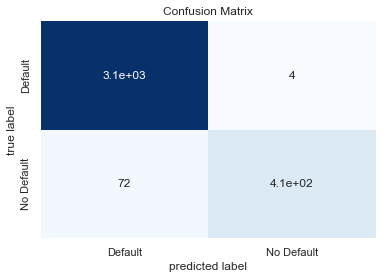


Recall Score
 0.8515463917525773

Precision Score
 0.9904076738609112

F1 Score
 0.9157427937915742
Validation Acuracy Scores :
Accuracy:  0.9708520179372198


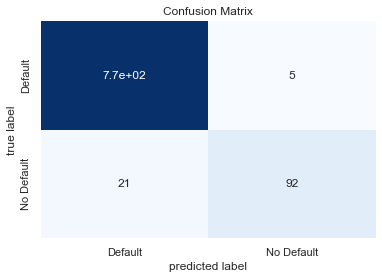


Recall Score
 0.8141592920353983

Precision Score
 0.9484536082474226

F1 Score
 0.8761904761904761


Dataset  \
0                                  Stemmed TF Vectors   
1                                  Stemmed TF Vectors   
2                                  Stemmed TF Vectors   
3                                  Stemmed TF Vectors   
4                                  Stemmed TF Vectors   
..                                                ...   
58  Stemmed TF Vectors(Highly Reduced) + Heuristic...   
59  Stemmed TF Vectors(Highly Reduced) + Heuristic...   
60  Stemmed TF Vectors(Highly Reduced) + Heuristic...   
61  Stemmed TF Vectors(Highly Reduced) + Heuristic...   
62  Stemmed TF Vectors(Highly Reduced) + Heuristic...   

                            Model  Accuracy Precision    Recall  F1-Score  
0          DecisionTreeClassifier  0.955157  0.859649  0.803279  0.830508  
1             Logistic Regression  0.980942  0.990654  0.868852  0.925764  
2                   Random Forest  0.966368       1.0   0.76378  0.866071  
3           Bagging Random Forest  0.956278       1.0  0.692913  0.818605  
4              Adaoost Classifier  0.979821       1.0  0.858268  0.923729  
..                            ...       ...       ...       ...       ...  
58            Logistic Regression  0.970852  0.989362  0.788136  0.877358  
59                  Random Forest  0.975336  0.950495  0.849558  0.897196  
60          Bagging Random Forest  0.976457      0.96  0.849558  0.901408  
61            Adaboost Classifier  0.967489      0.92  0.814159   0.86385  
62  Gradeient Boosting Classifier  0.970852  0.948454  0.814159   0.87619  

[63 rows x 6 columns]

In [327]:
Dataset="Stemmed TF Vectors(Highly Reduced) + Heuristic Features"
Model="Gradeient Boosting Classifier"
model=GradientBoostingClassifier()
model.fit(X_train,y_train)
y_pred_train=model.predict(X_train)
y_pred_valid=model.predict(X_valid)
print("Training Acuracy Scores :")
accuracy_scores(y_train,y_pred_train)
print("Validation Acuracy Scores :")
accuracy_scores(y_valid,y_pred_valid)
results.loc[len(results),]=[Dataset,Model,accuracy_score(y_valid,y_pred_valid),precision_score(y_valid,y_pred_valid),recall_score(y_valid,y_pred_valid),f1_score(y_valid,y_pred_valid)]
results

Training Acuracy Scores :
Accuracy:  0.9422159887798036


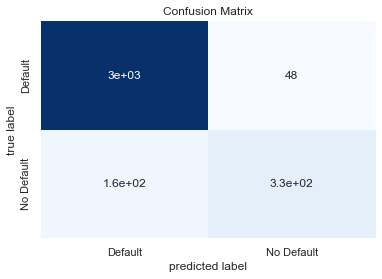


Recall Score
 0.6742268041237114

Precision Score
 0.872

F1 Score
 0.7604651162790698
Validation Acuracy Scores :
Accuracy:  0.9304932735426009


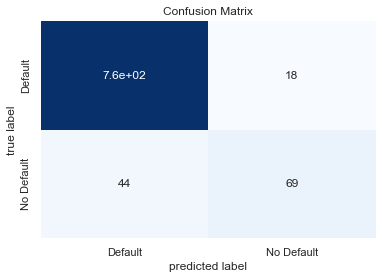


Recall Score
 0.6106194690265486

Precision Score
 0.7931034482758621

F1 Score
 0.6900000000000001


Dataset  \
0                                  Stemmed TF Vectors   
1                                  Stemmed TF Vectors   
2                                  Stemmed TF Vectors   
3                                  Stemmed TF Vectors   
4                                  Stemmed TF Vectors   
..                                                ...   
59  Stemmed TF Vectors(Highly Reduced) + Heuristic...   
60  Stemmed TF Vectors(Highly Reduced) + Heuristic...   
61  Stemmed TF Vectors(Highly Reduced) + Heuristic...   
62  Stemmed TF Vectors(Highly Reduced) + Heuristic...   
63  Stemmed TF Vectors(Highly Reduced) + Heuristic...   

                            Model  Accuracy Precision    Recall  F1-Score  
0          DecisionTreeClassifier  0.955157  0.859649  0.803279  0.830508  
1             Logistic Regression  0.980942  0.990654  0.868852  0.925764  
2                   Random Forest  0.966368       1.0   0.76378  0.866071  
3           Bagging Random Forest  0.956278       1.0  0.692913  0.818605  
4              Adaoost Classifier  0.979821       1.0  0.858268  0.923729  
..                            ...       ...       ...       ...       ...  
59                  Random Forest  0.975336  0.950495  0.849558  0.897196  
60          Bagging Random Forest  0.976457      0.96  0.849558  0.901408  
61            Adaboost Classifier  0.967489      0.92  0.814159   0.86385  
62  Gradeient Boosting Classifier  0.970852  0.948454  0.814159   0.87619  
63                 KNN Classifier  0.930493  0.793103  0.610619      0.69  

[64 rows x 6 columns]

In [328]:
Dataset="Stemmed TF Vectors(Highly Reduced) + Heuristic Features"
Model="KNN Classifier"
model=KNeighborsClassifier()
model.fit(X_train,y_train)
y_pred_train=model.predict(X_train)
y_pred_valid=model.predict(X_valid)
print("Training Acuracy Scores :")
accuracy_scores(y_train,y_pred_train)
print("Validation Acuracy Scores :")
accuracy_scores(y_valid,y_pred_valid)
results.loc[len(results),]=[Dataset,Model,accuracy_score(y_valid,y_pred_valid),precision_score(y_valid,y_pred_valid),recall_score(y_valid,y_pred_valid),f1_score(y_valid,y_pred_valid)]
results

Training Acuracy Scores :
Accuracy:  0.9133239831697054


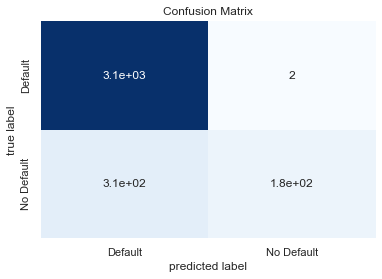


Recall Score
 0.3670103092783505

Precision Score
 0.9888888888888889

F1 Score
 0.5353383458646617
Validation Acuracy Scores :
Accuracy:  0.9204035874439462


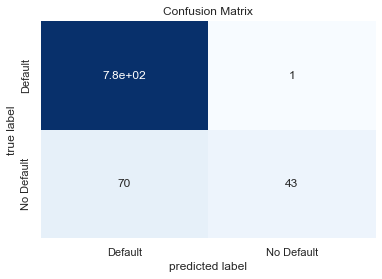


Recall Score
 0.3805309734513274

Precision Score
 0.9772727272727273

F1 Score
 0.5477707006369427


Dataset  \
0                                  Stemmed TF Vectors   
1                                  Stemmed TF Vectors   
2                                  Stemmed TF Vectors   
3                                  Stemmed TF Vectors   
4                                  Stemmed TF Vectors   
..                                                ...   
60  Stemmed TF Vectors(Highly Reduced) + Heuristic...   
61  Stemmed TF Vectors(Highly Reduced) + Heuristic...   
62  Stemmed TF Vectors(Highly Reduced) + Heuristic...   
63  Stemmed TF Vectors(Highly Reduced) + Heuristic...   
64  Stemmed TF Vectors(Highly Reduced) + Heuristic...   

                            Model  Accuracy Precision    Recall  F1-Score  
0          DecisionTreeClassifier  0.955157  0.859649  0.803279  0.830508  
1             Logistic Regression  0.980942  0.990654  0.868852  0.925764  
2                   Random Forest  0.966368       1.0   0.76378  0.866071  
3           Bagging Random Forest  0.956278       1.0  0.692913  0.818605  
4              Adaoost Classifier  0.979821       1.0  0.858268  0.923729  
..                            ...       ...       ...       ...       ...  
60          Bagging Random Forest  0.976457      0.96  0.849558  0.901408  
61            Adaboost Classifier  0.967489      0.92  0.814159   0.86385  
62  Gradeient Boosting Classifier  0.970852  0.948454  0.814159   0.87619  
63                 KNN Classifier  0.930493  0.793103  0.610619      0.69  
64                 SVM Classifier  0.920404  0.977273  0.380531  0.547771  

[65 rows x 6 columns]

In [329]:
Dataset="Stemmed TF Vectors(Highly Reduced) + Heuristic Features"
Model="SVM Classifier"
model=SVC()
model.fit(X_train,y_train)
y_pred_train=model.predict(X_train)
y_pred_valid=model.predict(X_valid)
print("Training Acuracy Scores :")
accuracy_scores(y_train,y_pred_train)
print("Validation Acuracy Scores :")
accuracy_scores(y_valid,y_pred_valid)
results.loc[len(results),]=[Dataset,Model,accuracy_score(y_valid,y_pred_valid),precision_score(y_valid,y_pred_valid),recall_score(y_valid,y_pred_valid),f1_score(y_valid,y_pred_valid)]
results

In [330]:
results.to_csv("results.csv",index=False)
results

Dataset  \
0                                  Stemmed TF Vectors   
1                                  Stemmed TF Vectors   
2                                  Stemmed TF Vectors   
3                                  Stemmed TF Vectors   
4                                  Stemmed TF Vectors   
..                                                ...   
60  Stemmed TF Vectors(Highly Reduced) + Heuristic...   
61  Stemmed TF Vectors(Highly Reduced) + Heuristic...   
62  Stemmed TF Vectors(Highly Reduced) + Heuristic...   
63  Stemmed TF Vectors(Highly Reduced) + Heuristic...   
64  Stemmed TF Vectors(Highly Reduced) + Heuristic...   

                            Model  Accuracy Precision    Recall  F1-Score  
0          DecisionTreeClassifier  0.955157  0.859649  0.803279  0.830508  
1             Logistic Regression  0.980942  0.990654  0.868852  0.925764  
2                   Random Forest  0.966368       1.0   0.76378  0.866071  
3           Bagging Random Forest  0.956278       1.0  0.692913  0.818605  
4              Adaoost Classifier  0.979821       1.0  0.858268  0.923729  
..                            ...       ...       ...       ...       ...  
60          Bagging Random Forest  0.976457      0.96  0.849558  0.901408  
61            Adaboost Classifier  0.967489      0.92  0.814159   0.86385  
62  Gradeient Boosting Classifier  0.970852  0.948454  0.814159   0.87619  
63                 KNN Classifier  0.930493  0.793103  0.610619      0.69  
64                 SVM Classifier  0.920404  0.977273  0.380531  0.547771  

[65 rows x 6 columns]

## Hyperparameter Tuning

Top 10 Models on Stemmed data:

1. Stemmed TF Vectors + Heuristic Features	Logistic Regression

2. Stemmed TF Vectors(Reduced) + Heuristic Features	Random Forest

3. Stemmed TF Vectors	Logistic Regression

4. Stemmed TF Vectors	Adaoost Classifier

5. Stemmed TF Vectors(Reduced) + Heuristic Features	Bagging Random Forest

6. Stemmed TF Vectors(Reduced) + Heuristic Features	Logistic Regression

7. Stemmed TF Vectors(Reduced) + Heuristic Features	Gradeient Boosting Classifier

8. Stemmed Doc2Vec embeddings + Heuristic features	Adaboost Classifier

9. Stemmed Doc2Vec embeddings	Logistic Regression

10. Stemmed TF Vectors(Highly Reduced) + Heuristic Features	Bagging Random Forest


In [6]:
#Logistic Regression

In [45]:
DTM=pd.read_csv("DTM_stemmed.csv")

In [46]:
df=pd.read_csv("df with heuristic features.csv")

In [49]:
df.iloc[:,-5:]

FirstWord_upper  Phone_num  suspicious_words  percent_stopWords  \
0                   0          0                 0          20.000000   
1                   0          0                 0           0.000000   
2                   0          1                 0          17.857143   
3                   1          0                 0          18.181818   
4                   0          0                 0          38.461538   
...               ...        ...               ...                ...   
5567                0          1                 1          26.666667   
5568                0          0                 0          12.500000   
5569                0          0                 0          40.000000   
5570                0          0                 0          38.461538   
5571                0          0                 0          33.333333   

      Length_of_SMS  
0                20  
1                 6  
2                28  
3                11  
4                13  
...             ...  
5567             30  
5568              8  
5569             10  
5570             26  
5571              6  

[5572 rows x 5 columns]

In [50]:
Heuristic_Features=df.iloc[:,-5:]

In [53]:
X=pd.concat([DTM,Heuristic_Features],axis=1)
Y=df.Labels

In [56]:
results_tuning=pd.DataFrame(columns=["Dataset","Model","Accuracy","Precision","Recall","F1-Score"])

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
 
# Creating the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}
 
# Instantiating logistic regression classifier
logreg = LogisticRegression()
 
# Instantiating the GridSearchCV object
logreg_cv = GridSearchCV(logreg, param_grid, cv = 3,scoring='f1')
 
logreg_cv.fit(X, Y)
 
# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_))
print("Best score is {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameters: {'C': 19306.977288832535}
Best score is 0.942966114955042


In [59]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
X_train,X_valid,y_train,y_valid=train_test_split(X_train,y_train,test_size=0.2)

Training Acuracy Scores :
Accuracy:  1.0


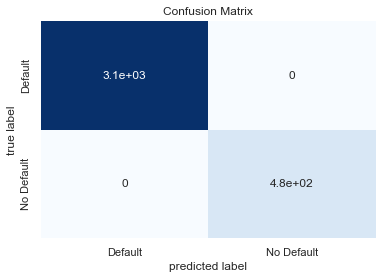


Recall Score
 1.0

Precision Score
 1.0

F1 Score
 1.0
Validation Acuracy Scores :
Accuracy:  0.984304932735426


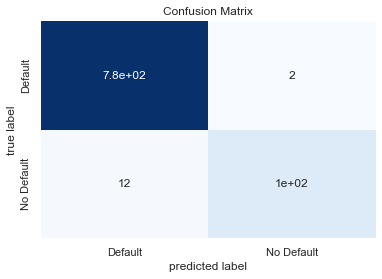


Recall Score
 0.8947368421052632

Precision Score
 0.9807692307692307

F1 Score
 0.9357798165137614


In [62]:
Dataset="Stemmed TF Vectors + Heuristic Features"
Model="Logistic Regression"
logit=LogisticRegression(C=19306.977288832535)
logit.fit(X_train,y_train)
y_pred_train=logit.predict(X_train)
y_pred_valid=logit.predict(X_valid)
print("Training Acuracy Scores :")
accuracy_scores(y_train,y_pred_train)
print("Validation Acuracy Scores :")
accuracy_scores(y_valid,y_pred_valid)
results_tuning.loc[len(results_tuning),]=[Dataset,Model,accuracy_score(y_valid,y_pred_valid),precision_score(y_valid,y_pred_valid),recall_score(y_valid,y_pred_valid),f1_score(y_valid,y_pred_valid)]

In [65]:
# Stemmed TF Vectors(Reduced) + Heuristic Features-Random Forest


In [63]:
DTM1=pd.read_csv("DTM_reduced with document count.csv")


In [66]:
X=pd.concat([DTM1,Heuristic_Features],axis=1)
Y=df.Labels

In [67]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
X_train,X_valid,y_train,y_valid=train_test_split(X_train,y_train,test_size=0.2)

Training Acuracy Scores :
Accuracy:  0.9988779803646564


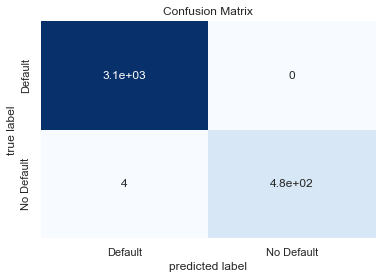


Recall Score
 0.9917695473251029

Precision Score
 1.0

F1 Score
 0.9958677685950413
Validation Acuracy Scores :
Accuracy:  0.9506726457399103


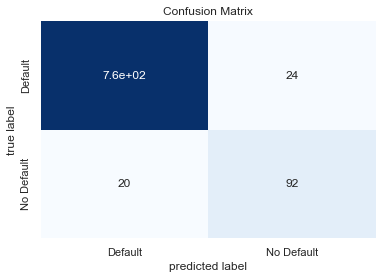


Recall Score
 0.8214285714285714

Precision Score
 0.7931034482758621

F1 Score
 0.8070175438596492


In [68]:
Dataset="Stemmed TF Vectors(Reduced) + Heuristic Features"
Model="DecisionTreeClassifier"
tree=DecisionTreeClassifier(criterion='entropy')
tree.fit(X_train,y_train)
y_pred_train=tree.predict(X_train)
y_pred_valid=tree.predict(X_valid)
print("Training Acuracy Scores :")
accuracy_scores(y_train,y_pred_train)
print("Validation Acuracy Scores :")
accuracy_scores(y_valid,y_pred_valid)
# results.loc[len(results),]=[Dataset,Model,accuracy_score(y_valid,y_pred_valid),precision_score(y_valid,y_pred_valid),recall_score(y_valid,y_pred_valid),f1_score(y_valid,y_pred_valid)]

In [70]:
tree.get_depth(),tree.get_n_leaves(),tree.get_params()

(38,
 175,
 {'ccp_alpha': 0.0,
  'class_weight': None,
  'criterion': 'entropy',
  'max_depth': None,
  'max_features': None,
  'max_leaf_nodes': None,
  'min_impurity_decrease': 0.0,
  'min_samples_leaf': 1,
  'min_samples_split': 2,
  'min_weight_fraction_leaf': 0.0,
  'random_state': None,
  'splitter': 'best'})

In [74]:
# Creating the hyperparameter grid

param_grid = { 
            "n_estimators"      : [100,200,300],
            "max_features"      : ["auto", "sqrt", "log2"],
            "min_samples_split" : [2,4,8],
            "bootstrap": [True, False],
            }
 
# Instantiating RF classifier
model = RandomForestClassifier()
 
# Instantiating the GridSearchCV object
model_cv = GridSearchCV(model, param_grid, cv = 3,scoring='f1')
 
model_cv.fit(X, Y)
 
# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(model_cv.best_params_))
print("Best score is {}".format(model_cv.best_score_))

Tuned Logistic Regression Parameters: {'bootstrap': False, 'max_features': 'log2', 'min_samples_split': 8, 'n_estimators': 200}
Best score is 0.920910248989148


In [76]:
# Stemmed TF Vectors	Logistic Regression
X=DTM
Y=df.Labels

In [77]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
X_train,X_valid,y_train,y_valid=train_test_split(X_train,y_train,test_size=0.2)

In [78]:
# Creating the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}
 
# Instantiating logistic regression classifier
logreg = LogisticRegression()
 
# Instantiating the GridSearchCV object
logreg_cv = GridSearchCV(logreg, param_grid, cv = 3,scoring='f1')
 
logreg_cv.fit(X_train, y_train)
 
# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_))
print("Best score is {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameters: {'C': 2275.845926074791}
Best score is 0.908376419857328


In [79]:
# Stemmed TF Vectors	Adaoost Classifier

In [80]:
# Creating the hyperparameter grid

param_grid = { 
            "n_estimators"      : [100,200,300]
            }
 
# Instantiating logistic regression classifier
model = AdaBoostClassifier()
 
# Instantiating the GridSearchCV object
model_cv = GridSearchCV(model, param_grid, cv = 3,scoring='f1')
 
model_cv.fit(X_train, y_train)
 
# Print the tuned parameters and score
print("Tuned Adaboost Parameters: {}".format(model_cv.best_params_))
print("Best score is {}".format(model_cv.best_score_))

Tuned Adaboost Parameters: {'n_estimators': 200}
Best score is 0.8906114811687568


In [81]:
# Stemmed TF Vectors(Reduced) + Heuristic Features	Bagging Random Forest


In [82]:
DTM1=pd.read_csv("DTM_reduced with document count.csv")


In [83]:
X=pd.concat([DTM1,Heuristic_Features],axis=1)
Y=df.Labels

In [84]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
X_train,X_valid,y_train,y_valid=train_test_split(X_train,y_train,test_size=0.2)

In [86]:
param_grid = {
'bootstrap': [True, False],
'bootstrap_features': [True, False],    
'n_estimators': [5, 10, 15]
}

 
# Instantiating Bagging classifier
model = BaggingClassifier(base_estimator=RandomForestClassifier(n_estimators=200,bootstrap=False,max_features='log2',min_samples_split=8))
 
# Instantiating the GridSearchCV object
model_cv = GridSearchCV(model, param_grid, cv = 3,scoring='f1')
 
model_cv.fit(X_train, y_train)
 
# Print the tuned parameters and score
print("Tuned Bagging Classifier Parameters: {}".format(model_cv.best_params_))
print("Best score is {}".format(model_cv.best_score_))

Tuned Bagging Classifier Parameters: {'bootstrap': False, 'bootstrap_features': True, 'n_estimators': 5}
Best score is 0.9154223683393002


## Best Model after hyper parameter tuning
Stemmed TF Vectors + Heuristic Features	Logistic Regression

Using the model on test data

In [87]:
X=pd.concat([DTM,Heuristic_Features],axis=1)
Y=df.Labels

In [88]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
X_train,X_valid,y_train,y_valid=train_test_split(X_train,y_train,test_size=0.2)

Training Acuracy Scores :
Accuracy:  1.0


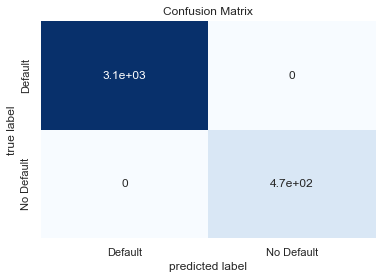


Recall Score
 1.0

Precision Score
 1.0

F1 Score
 1.0
Validation Acuracy Scores :
Accuracy:  0.9831838565022422


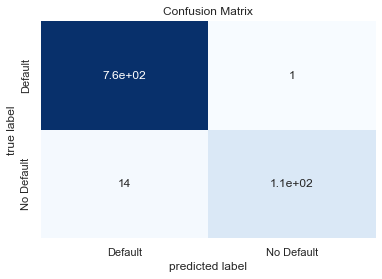


Recall Score
 0.8888888888888888

Precision Score
 0.9911504424778761

F1 Score
 0.9372384937238493
Test Acuracy Scores :
Accuracy:  0.9856502242152466


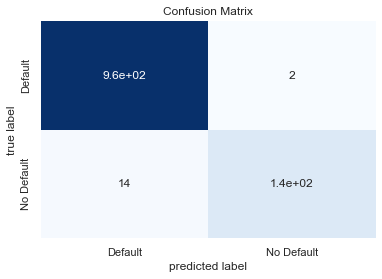


Recall Score
 0.9060402684563759

Precision Score
 0.9854014598540146

F1 Score
 0.944055944055944


In [89]:
Dataset="Stemmed TF Vectors + Heuristic Features"
Model="Logistic Regression"
logit=LogisticRegression(C=19306.977288832535)
logit.fit(X_train,y_train)
y_pred_train=logit.predict(X_train)
y_pred_valid=logit.predict(X_valid)
print("Training Acuracy Scores :")
accuracy_scores(y_train,y_pred_train)
print("Validation Acuracy Scores :")
accuracy_scores(y_valid,y_pred_valid)
y_pred_test=logit.predict(X_test)
print("Test Acuracy Scores :")
accuracy_scores(y_test,y_pred_test)

## Test results and conclusions


Conlusions:

These are the 8 different cominations of vectorizations and Heuristic features which have been used for fitting classfier models.

1. a)  Stemmed TF Vectors
   
   b)  Stemmed TFIDF Vectors
   
   c)  Stemmed Doc2Vec embeddings
   
   d)  Stemmed Doc2Vec embeddings + Heuristic features
   
   e)  Heuristic Features
   
   f)  Stemmed TF Vectors + Heuristic Features
   
   g)  Stemmed TF Vectors(Reduced) + Heuristic Features
   
   h)  Stemmed TF Vectors(Highly Reduced) + Heuristic Features


 The models used are :


1) DecisionTreeClassifier

2) Logistic Regression

3) Random Forest

4) Bagging Random Forest

5) Adaoost Classifier

6) Gradeient Boosting Classifier

7) KNN Classifier

8) SVM Classifier

A total of 64 Models have been tried in total.

It was surprising to see that the 5 Heuristic features itself gave a f1 score on validation of 0.86 with Random forest Bagging Classifier.

Comparision of Data Vectorization and features
Out of the Top 10 models,3 had Stemmed TF Vectors,4 had Reduced Stemmed TF Vectors ,2 had Doc2Vec embeddings and 1 with Highly reduced Stemmed TF vectors. The Reduced TF vectors had 161 componenets and highly reduced TF vectors had 33 components
Out of the top 10, 7 had Hueristic Features in combination. 

We also noticed that TFIDF did not even come up in the Top 10 models with any of the classifiers. The top F1 score achieved with TFIDF vectors was 0.87 on validation data at rank 24 out of the 64 models which were checked.

The worst model out of the 64 was given by TFIDF with 5NN classifier with a F1 score of 0.28 on validation.

Comparision of Model Classifiers
The top 10 models had majorly tree based classifiers and logistic regression model.
The bottom 10 models were 5NN and SVM Classifiers.




The best model after hyperparameter tuning turned out be Logitic Regression model on Stemmed TF Vectors + Heuristic Features. 


The test Result is as follows:

1. F1 score of 0.944

2. Precision score of 0.985

3. Recall score of 0.906

4. Accuracy score of 0.985

The Test results are in the same range as that observed in Validation and Training - which indicates that there is no overfitting.


In [90]:
df

Labels                                                SMS  \
0          0  Go until jurong point, crazy.. Available only ...   
1          0                      Ok lar... Joking wif u oni...   
2          1  Free entry in 2 a wkly comp to win FA Cup fina...   
3          0  U dun say so early hor... U c already then say...   
4          0  Nah I don't think he goes to usf, he lives aro...   
...      ...                                                ...   
5567       1  This is the 2nd time we have tried 2 contact u...   
5568       0               Will ü b going to esplanade fr home?   
5569       0  Pity, * was in mood for that. So...any other s...   
5570       0  The guy did some bitching but I acted like i'd...   
5571       0                         Rofl. Its true to its name   

      FirstWord_upper  Phone_num  suspicious_words  percent_stopWords  \
0                   0          0                 0          20.000000   
1                   0          0                 0           0.000000   
2                   0          1                 0          17.857143   
3                   1          0                 0          18.181818   
4                   0          0                 0          38.461538   
...               ...        ...               ...                ...   
5567                0          1                 1          26.666667   
5568                0          0                 0          12.500000   
5569                0          0                 0          40.000000   
5570                0          0                 0          38.461538   
5571                0          0                 0          33.333333   

      Length_of_SMS  
0                20  
1                 6  
2                28  
3                11  
4                13  
...             ...  
5567             30  
5568              8  
5569             10  
5570             26  
5571              6  

[5572 rows x 7 columns]